In [1]:
card_type = "Spades"
model = "lstm"

In [2]:
# Parameters
card_type = "Spades"
model = "lstm"


In [3]:
import pandas as pd
import numpy as np
from chance_utils import compute_statistics
from matplotlib import pyplot as plt

In [4]:
possible_result = ["7","8","9","10","J","Q","K","A"]
n_outputs = 8
n_features = 8
sample_length = 240*5

In [5]:
dummies = pd.get_dummies(possible_result).T
dummies = dummies.reindex(index=possible_result,fill_value=0)
dummies = dummies.reset_index()
dummies

,index,0,1,2,3,4,5,6,7
0,7,1,0,0,0,0,0,0,0
1,8,0,1,0,0,0,0,0,0
2,9,0,0,1,0,0,0,0,0
3,10,0,0,0,1,0,0,0,0
4,J,0,0,0,0,1,0,0,0
5,Q,0,0,0,0,0,1,0,0
6,K,0,0,0,0,0,0,1,0
7,A,0,0,0,0,0,0,0,1


In [6]:
test_chance = pd.read_csv("test_chance.csv",index_col=[0])
test_chance.Date = pd.to_datetime(test_chance.Date)

train_chance = pd.read_csv('train_chance.csv',index_col=[0])
train_chance.Date = pd.to_datetime(train_chance.Date)

In [7]:
spades_test_chance = test_chance[['Date',card_type]]
spades_test_chance = pd.merge(dummies,spades_test_chance,left_on='index',right_on='Spades',how="right").drop(columns="index")

spades_train_chance = train_chance[['Date',card_type]]
spades_train_chance = pd.merge(dummies,spades_train_chance,left_on='index',right_on='Spades',how="right").drop(columns="index")
spades_train_chance.head()

,0,1,2,3,4,5,6,7,Date,Spades
0,0,0,0,0,0,0,0,1,2001-01-01 00:00:00.006820,A
1,0,0,0,1,0,0,0,0,2001-01-01 00:00:00.006821,10
2,0,0,0,0,1,0,0,0,2001-01-01 00:00:00.006822,J
3,0,0,0,0,1,0,0,0,2001-01-01 00:00:00.006823,J
4,0,0,0,0,0,0,1,0,2001-02-01 00:00:00.006824,K


In [8]:
# make the samples ready to tsfresh
spades_test_chance = spades_test_chance.sort_values(by="Date").reset_index(drop=True)
spades_test_chance['id'] = 1

spades_train_chance = spades_train_chance.sort_values(by="Date").reset_index(drop=True)
spades_train_chance['id'] = 1

spades_train_chance.tail()

,0,1,2,3,4,5,6,7,Date,Spades,id
29119,0,0,1,0,0,0,0,0,2017-12-07 00:00:00.035924,9,1
29120,0,1,0,0,0,0,0,0,2017-12-07 00:00:00.035925,8,1
29121,0,1,0,0,0,0,0,0,2017-12-07 00:00:00.035926,8,1
29122,0,0,0,1,0,0,0,0,2017-12-07 00:00:00.035927,10,1
29123,0,0,1,0,0,0,0,0,2017-12-07 00:00:00.035928,9,1


In [9]:
from tsfresh.utilities.dataframe_functions import roll_time_series

df_test_rolled = roll_time_series(spades_test_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled = roll_time_series(spades_train_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled.tail()

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:02<01:48,  2.79s/it]

Rolling:   5%|▌         | 2/40 [00:02<00:46,  1.23s/it]

Rolling:  15%|█▌        | 6/40 [00:04<00:17,  1.99it/s]

Rolling:  18%|█▊        | 7/40 [00:04<00:15,  2.13it/s]

Rolling:  20%|██        | 8/40 [00:04<00:13,  2.35it/s]

Rolling:  22%|██▎       | 9/40 [00:05<00:12,  2.53it/s]

Rolling:  25%|██▌       | 10/40 [00:05<00:11,  2.66it/s]

Rolling:  28%|██▊       | 11/40 [00:05<00:10,  2.68it/s]

Rolling:  30%|███       | 12/40 [00:06<00:10,  2.69it/s]

Rolling:  32%|███▎      | 13/40 [00:06<00:08,  3.17it/s]

Rolling:  35%|███▌      | 14/40 [00:06<00:08,  2.91it/s]

Rolling:  38%|███▊      | 15/40 [00:06<00:07,  3.30it/s]

Rolling:  40%|████      | 16/40 [00:07<00:06,  3.69it/s]

Rolling:  42%|████▎     | 17/40 [00:07<00:07,  2.88it/s]

Rolling:  45%|████▌     | 18/40 [00:07<00:06,  3.29it/s]

Rolling:  48%|████▊     | 19/40 [00:07<00:05,  3.73it/s]

Rolling:  50%|█████     | 20/40 [00:08<00:06,  2.87it/s]

Rolling:  52%|█████▎    | 21/40 [00:08<00:05,  3.37it/s]

Rolling:  55%|█████▌    | 22/40 [00:08<00:04,  3.78it/s]

Rolling:  57%|█████▊    | 23/40 [00:09<00:06,  2.72it/s]

Rolling:  60%|██████    | 24/40 [00:09<00:04,  3.21it/s]

Rolling:  62%|██████▎   | 25/40 [00:09<00:04,  3.70it/s]

Rolling:  65%|██████▌   | 26/40 [00:10<00:03,  4.12it/s]

Rolling:  68%|██████▊   | 27/40 [00:10<00:02,  4.47it/s]

Rolling:  70%|███████   | 28/40 [00:10<00:04,  2.71it/s]

Rolling:  72%|███████▎  | 29/40 [00:11<00:03,  3.21it/s]

Rolling:  75%|███████▌  | 30/40 [00:11<00:02,  3.68it/s]

Rolling:  78%|███████▊  | 31/40 [00:11<00:02,  4.11it/s]

Rolling:  80%|████████  | 32/40 [00:11<00:01,  4.21it/s]

Rolling:  82%|████████▎ | 33/40 [00:11<00:01,  4.41it/s]

Rolling:  85%|████████▌ | 34/40 [00:12<00:02,  2.59it/s]

Rolling:  88%|████████▊ | 35/40 [00:12<00:01,  3.11it/s]

Rolling:  90%|█████████ | 36/40 [00:12<00:01,  3.66it/s]

Rolling:  92%|█████████▎| 37/40 [00:13<00:00,  4.17it/s]

Rolling:  95%|█████████▌| 38/40 [00:13<00:00,  4.61it/s]

Rolling:  98%|█████████▊| 39/40 [00:13<00:00,  5.03it/s]

Rolling: 100%|██████████| 40/40 [00:13<00:00,  5.66it/s]

Rolling: 100%|██████████| 40/40 [00:13<00:00,  2.95it/s]

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:04<03:07,  4.80s/it]

Rolling:   5%|▌         | 2/40 [00:05<01:39,  2.62s/it]

Rolling:   8%|▊         | 3/40 [00:07<01:24,  2.29s/it]

Rolling:  10%|█         | 4/40 [00:08<00:57,  1.61s/it]

Rolling:  12%|█▎        | 5/40 [00:09<00:56,  1.62s/it]

Rolling:  15%|█▌        | 6/40 [00:10<00:42,  1.26s/it]

Rolling:  18%|█▊        | 7/40 [00:11<00:34,  1.04s/it]

Rolling:  20%|██        | 8/40 [00:12<00:39,  1.23s/it]

Rolling:  22%|██▎       | 9/40 [00:13<00:31,  1.02s/it]

Rolling:  25%|██▌       | 10/40 [00:13<00:26,  1.14it/s]

Rolling:  28%|██▊       | 11/40 [00:14<00:23,  1.25it/s]

Rolling:  30%|███       | 12/40 [00:15<00:21,  1.31it/s]

Rolling:  32%|███▎      | 13/40 [00:17<00:31,  1.16s/it]

Rolling:  35%|███▌      | 14/40 [00:17<00:25,  1.02it/s]

Rolling:  38%|███▊      | 15/40 [00:18<00:21,  1.16it/s]

Rolling:  40%|████      | 16/40 [00:19<00:18,  1.29it/s]

Rolling:  42%|████▎     | 17/40 [00:19<00:16,  1.39it/s]

Rolling:  45%|████▌     | 18/40 [00:21<00:26,  1.22s/it]

Rolling:  48%|████▊     | 19/40 [00:22<00:21,  1.03s/it]

Rolling:  50%|█████     | 20/40 [00:23<00:17,  1.12it/s]

Rolling:  52%|█████▎    | 21/40 [00:23<00:14,  1.27it/s]

Rolling:  55%|█████▌    | 22/40 [00:24<00:12,  1.40it/s]

Rolling:  57%|█████▊    | 23/40 [00:24<00:11,  1.46it/s]

Rolling:  60%|██████    | 24/40 [00:25<00:10,  1.51it/s]

Rolling:  62%|██████▎   | 25/40 [00:28<00:20,  1.37s/it]

Rolling:  65%|██████▌   | 26/40 [00:29<00:15,  1.13s/it]

Rolling:  68%|██████▊   | 27/40 [00:29<00:12,  1.03it/s]

Rolling:  70%|███████   | 28/40 [00:30<00:10,  1.17it/s]

Rolling:  72%|███████▎  | 29/40 [00:30<00:08,  1.29it/s]

Rolling:  75%|███████▌  | 30/40 [00:31<00:07,  1.37it/s]

Rolling:  78%|███████▊  | 31/40 [00:32<00:06,  1.41it/s]

Rolling:  80%|████████  | 32/40 [00:32<00:05,  1.40it/s]

Rolling:  82%|████████▎ | 33/40 [00:36<00:10,  1.50s/it]

Rolling:  85%|████████▌ | 34/40 [00:36<00:07,  1.21s/it]

Rolling:  88%|████████▊ | 35/40 [00:37<00:05,  1.00s/it]

Rolling:  90%|█████████ | 36/40 [00:37<00:03,  1.18it/s]

Rolling:  92%|█████████▎| 37/40 [00:38<00:02,  1.35it/s]

Rolling:  95%|█████████▌| 38/40 [00:38<00:01,  1.49it/s]

Rolling:  98%|█████████▊| 39/40 [00:39<00:00,  1.56it/s]

Rolling: 100%|██████████| 40/40 [00:39<00:00,  1.54it/s]

Rolling: 100%|██████████| 40/40 [00:39<00:00,  1.00it/s]

,0,1,2,3,4,5,6,7,Date,Spades,id
33509995,0,0,1,0,0,0,0,0,2017-12-07 00:00:00.035924,9,"(1, 2017-12-07 00:00:00.035928)"
33509996,0,1,0,0,0,0,0,0,2017-12-07 00:00:00.035925,8,"(1, 2017-12-07 00:00:00.035928)"
33509997,0,1,0,0,0,0,0,0,2017-12-07 00:00:00.035926,8,"(1, 2017-12-07 00:00:00.035928)"
33509998,0,0,0,1,0,0,0,0,2017-12-07 00:00:00.035927,10,"(1, 2017-12-07 00:00:00.035928)"
33509999,0,0,1,0,0,0,0,0,2017-12-07 00:00:00.035928,9,"(1, 2017-12-07 00:00:00.035928)"


In [10]:
test_labeling_df = test_chance[['lottoryNumber',card_type]]
train_labeling_df = train_chance[['lottoryNumber',card_type]]

labeling_df = pd.concat([test_labeling_df,train_labeling_df])
labeling_df.head()

,lottoryNumber,Spades
29124,35944,J
29125,35945,Q
29126,35946,K
29127,35947,9
29128,35948,K


In [11]:
def make_a_sample(current_sample,labeling_df):
    
    current_id = current_sample['id'].values[0]
    final_label = None
    
    assert current_sample.shape[0] == sample_length, f"{current_id} is not shape of {sample_length}"

    lottey_num_predicting = (current_id[1].microsecond + 1)
    label = labeling_df[labeling_df.lottoryNumber == lottey_num_predicting][card_type]
    
    if len(label) == 1:
        final_label = label.values[0]

    sample = current_sample.drop(columns=['id','Date',card_type]).values

    return lottey_num_predicting,final_label,sample

In [12]:
train = df_train_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

train = sorted(train.values,key=lambda x:x[0])
_,train_y,train_x = map(list, zip(*train))

In [13]:
test = df_test_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

test = sorted(test.values,key=lambda x:x[0])
_,test_y,test_x = map(list, zip(*test))

In [14]:
test_x = np.stack(test_x)
test_y = pd.merge(dummies,pd.Series(test_y,name='label'),left_on='index',right_on="label",how="right").drop(columns=["index","label"]).values

train_x = np.stack(train_x)
train_y = pd.merge(dummies,pd.Series(train_y,name='label'),left_on='index',right_on="label",how="right").drop(columns=["index","label"]).values

In [15]:
assert test_x.shape[0] == test_y.shape[0] and train_x.shape[0] == train_y.shape[0]

In [16]:
last_sample = test_x[-1]
test_x = test_x[:-1]
test_y = test_y[:-1]

In [17]:
print(f"Test shape {test_x.shape}")
print(f"Train shape {train_x.shape}")

Test shape (8509, 1200, 8)
Train shape (27925, 1200, 8)


In [18]:
import tensorflow as tf

if model == "lstm":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(100, input_shape=(sample_length,n_features)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
elif model == "nn":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(sample_length,8)))
    model.add(tf.keras.layers.Dense(350, activation='relu'))
    model.add(tf.keras.layers.Dense(250, activation='relu'))
    model.add(tf.keras.layers.Dense(150, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='softmax'))
    model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])
    
model.summary()

Model: "sequential"


2022-08-12 19:56:12.919896: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 lstm (LSTM)                 (None, 100)               43600     


 dropout (Dropout)           (None, 100)               0         


 dense (Dense)               (None, 100)               10100     


 dense_1 (Dense)             (None, 8)                 808       


Total params: 54,508


Trainable params: 54,508


Non-trainable params: 0


_________________________________________________________________


In [19]:
assert not np.isnan(train_x).any()
assert not np.isnan(train_y).any()
assert not np.isnan(test_x).any()
assert not np.isnan(test_y).any()

In [20]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)
# 
history = model.fit(train_x,train_y,validation_data=(test_x,test_y),batch_size=64,epochs=300,callbacks=[es])

Epoch 1/300


  1/437 [..............................] - ETA: 14:25 - loss: 2.0919 - accuracy: 0.0938

  2/437 [..............................] - ETA: 3:30 - loss: 2.0875 - accuracy: 0.0859 

  3/437 [..............................] - ETA: 3:33 - loss: 2.0864 - accuracy: 0.0781

  4/437 [..............................] - ETA: 3:53 - loss: 2.0830 - accuracy: 0.1055

  5/437 [..............................] - ETA: 3:54 - loss: 2.0810 - accuracy: 0.1094

  6/437 [..............................] - ETA: 3:49 - loss: 2.0799 - accuracy: 0.1068

  7/437 [..............................] - ETA: 3:46 - loss: 2.0804 - accuracy: 0.1094

  8/437 [..............................] - ETA: 3:45 - loss: 2.0802 - accuracy: 0.1133

  9/437 [..............................] - ETA: 3:45 - loss: 2.0796 - accuracy: 0.1111

 10/437 [..............................] - ETA: 3:44 - loss: 2.0792 - accuracy: 0.1109

 11/437 [..............................] - ETA: 3:42 - loss: 2.0792 - accuracy: 0.1151

 12/437 [..............................] - ETA: 3:43 - loss: 2.0798 - accuracy: 0.1159

 13/437 [..............................] - ETA: 3:41 - loss: 2.0807 - accuracy: 0.1130

 14/437 [..............................] - ETA: 3:40 - loss: 2.0799 - accuracy: 0.1150

 15/437 [>.............................] - ETA: 3:38 - loss: 2.0801 - accuracy: 0.1177

 16/437 [>.............................] - ETA: 3:37 - loss: 2.0798 - accuracy: 0.1172

 17/437 [>.............................] - ETA: 3:35 - loss: 2.0799 - accuracy: 0.1158

 18/437 [>.............................] - ETA: 3:34 - loss: 2.0802 - accuracy: 0.1163

 19/437 [>.............................] - ETA: 3:35 - loss: 2.0800 - accuracy: 0.1176

 20/437 [>.............................] - ETA: 3:34 - loss: 2.0793 - accuracy: 0.1203

 21/437 [>.............................] - ETA: 3:33 - loss: 2.0800 - accuracy: 0.1213

 22/437 [>.............................] - ETA: 3:32 - loss: 2.0797 - accuracy: 0.1250

 23/437 [>.............................] - ETA: 3:31 - loss: 2.0799 - accuracy: 0.1223

 24/437 [>.............................] - ETA: 3:30 - loss: 2.0798 - accuracy: 0.1211

 25/437 [>.............................] - ETA: 3:30 - loss: 2.0795 - accuracy: 0.1256

 26/437 [>.............................] - ETA: 3:29 - loss: 2.0796 - accuracy: 0.1250

 27/437 [>.............................] - ETA: 3:28 - loss: 2.0797 - accuracy: 0.1244

 28/437 [>.............................] - ETA: 3:27 - loss: 2.0797 - accuracy: 0.1239

 29/437 [>.............................] - ETA: 3:27 - loss: 2.0794 - accuracy: 0.1234

 30/437 [=>............................] - ETA: 3:26 - loss: 2.0799 - accuracy: 0.1208

 31/437 [=>............................] - ETA: 3:25 - loss: 2.0800 - accuracy: 0.1215

 32/437 [=>............................] - ETA: 3:24 - loss: 2.0804 - accuracy: 0.1216

 33/437 [=>............................] - ETA: 3:23 - loss: 2.0807 - accuracy: 0.1207

 34/437 [=>............................] - ETA: 3:23 - loss: 2.0808 - accuracy: 0.1199

 35/437 [=>............................] - ETA: 3:22 - loss: 2.0807 - accuracy: 0.1183

 36/437 [=>............................] - ETA: 3:21 - loss: 2.0805 - accuracy: 0.1181

 37/437 [=>............................] - ETA: 3:21 - loss: 2.0805 - accuracy: 0.1191

 38/437 [=>............................] - ETA: 3:20 - loss: 2.0810 - accuracy: 0.1188

 39/437 [=>............................] - ETA: 3:19 - loss: 2.0811 - accuracy: 0.1198

 40/437 [=>............................] - ETA: 3:19 - loss: 2.0813 - accuracy: 0.1184

 41/437 [=>............................] - ETA: 3:19 - loss: 2.0814 - accuracy: 0.1189

 42/437 [=>............................] - ETA: 3:18 - loss: 2.0813 - accuracy: 0.1187

 43/437 [=>............................] - ETA: 3:17 - loss: 2.0814 - accuracy: 0.1185

 44/437 [==>...........................] - ETA: 3:17 - loss: 2.0814 - accuracy: 0.1193

 45/437 [==>...........................] - ETA: 3:16 - loss: 2.0816 - accuracy: 0.1198

 46/437 [==>...........................] - ETA: 3:16 - loss: 2.0814 - accuracy: 0.1209

 47/437 [==>...........................] - ETA: 3:15 - loss: 2.0814 - accuracy: 0.1210

 48/437 [==>...........................] - ETA: 3:15 - loss: 2.0813 - accuracy: 0.1214

 49/437 [==>...........................] - ETA: 3:15 - loss: 2.0813 - accuracy: 0.1215

 50/437 [==>...........................] - ETA: 3:14 - loss: 2.0812 - accuracy: 0.1222

 51/437 [==>...........................] - ETA: 3:14 - loss: 2.0811 - accuracy: 0.1222

 52/437 [==>...........................] - ETA: 3:13 - loss: 2.0810 - accuracy: 0.1223

 53/437 [==>...........................] - ETA: 3:13 - loss: 2.0810 - accuracy: 0.1238

 54/437 [==>...........................] - ETA: 3:12 - loss: 2.0809 - accuracy: 0.1241

 55/437 [==>...........................] - ETA: 3:11 - loss: 2.0808 - accuracy: 0.1233

 56/437 [==>...........................] - ETA: 3:11 - loss: 2.0807 - accuracy: 0.1236

 57/437 [==>...........................] - ETA: 3:10 - loss: 2.0806 - accuracy: 0.1242

 58/437 [==>...........................] - ETA: 3:10 - loss: 2.0805 - accuracy: 0.1228

 59/437 [===>..........................] - ETA: 3:09 - loss: 2.0806 - accuracy: 0.1229

 60/437 [===>..........................] - ETA: 3:09 - loss: 2.0807 - accuracy: 0.1219

 61/437 [===>..........................] - ETA: 3:09 - loss: 2.0808 - accuracy: 0.1209

 62/437 [===>..........................] - ETA: 3:08 - loss: 2.0806 - accuracy: 0.1210

 63/437 [===>..........................] - ETA: 3:08 - loss: 2.0808 - accuracy: 0.1203

 64/437 [===>..........................] - ETA: 3:07 - loss: 2.0808 - accuracy: 0.1199

 65/437 [===>..........................] - ETA: 3:07 - loss: 2.0808 - accuracy: 0.1190

 66/437 [===>..........................] - ETA: 3:06 - loss: 2.0809 - accuracy: 0.1186

 67/437 [===>..........................] - ETA: 3:06 - loss: 2.0810 - accuracy: 0.1175

 68/437 [===>..........................] - ETA: 3:05 - loss: 2.0810 - accuracy: 0.1181

 69/437 [===>..........................] - ETA: 3:05 - loss: 2.0808 - accuracy: 0.1184

 70/437 [===>..........................] - ETA: 3:04 - loss: 2.0808 - accuracy: 0.1181

 71/437 [===>..........................] - ETA: 3:04 - loss: 2.0808 - accuracy: 0.1180

 72/437 [===>..........................] - ETA: 3:03 - loss: 2.0809 - accuracy: 0.1174

 73/437 [====>.........................] - ETA: 3:03 - loss: 2.0810 - accuracy: 0.1162

 74/437 [====>.........................] - ETA: 3:02 - loss: 2.0809 - accuracy: 0.1161

 75/437 [====>.........................] - ETA: 3:02 - loss: 2.0811 - accuracy: 0.1160

 76/437 [====>.........................] - ETA: 3:01 - loss: 2.0812 - accuracy: 0.1162

 77/437 [====>.........................] - ETA: 3:01 - loss: 2.0812 - accuracy: 0.1165

 78/437 [====>.........................] - ETA: 3:01 - loss: 2.0811 - accuracy: 0.1172

 79/437 [====>.........................] - ETA: 3:00 - loss: 2.0814 - accuracy: 0.1165

 80/437 [====>.........................] - ETA: 3:00 - loss: 2.0814 - accuracy: 0.1158

 81/437 [====>.........................] - ETA: 2:59 - loss: 2.0815 - accuracy: 0.1154

 82/437 [====>.........................] - ETA: 2:59 - loss: 2.0814 - accuracy: 0.1159

 83/437 [====>.........................] - ETA: 2:58 - loss: 2.0814 - accuracy: 0.1156

 84/437 [====>.........................] - ETA: 2:58 - loss: 2.0816 - accuracy: 0.1153

 85/437 [====>.........................] - ETA: 2:57 - loss: 2.0815 - accuracy: 0.1162

 86/437 [====>.........................] - ETA: 2:57 - loss: 2.0816 - accuracy: 0.1157

 87/437 [====>.........................] - ETA: 2:56 - loss: 2.0815 - accuracy: 0.1169

 88/437 [=====>........................] - ETA: 2:56 - loss: 2.0814 - accuracy: 0.1168

 89/437 [=====>........................] - ETA: 2:55 - loss: 2.0814 - accuracy: 0.1169

 90/437 [=====>........................] - ETA: 2:55 - loss: 2.0813 - accuracy: 0.1179

 91/437 [=====>........................] - ETA: 2:55 - loss: 2.0813 - accuracy: 0.1176

 92/437 [=====>........................] - ETA: 2:54 - loss: 2.0812 - accuracy: 0.1177

 93/437 [=====>........................] - ETA: 2:53 - loss: 2.0813 - accuracy: 0.1174

 94/437 [=====>........................] - ETA: 2:53 - loss: 2.0813 - accuracy: 0.1174

 95/437 [=====>........................] - ETA: 2:52 - loss: 2.0813 - accuracy: 0.1174

 96/437 [=====>........................] - ETA: 2:52 - loss: 2.0813 - accuracy: 0.1170

 97/437 [=====>........................] - ETA: 2:52 - loss: 2.0812 - accuracy: 0.1171

 98/437 [=====>........................] - ETA: 2:51 - loss: 2.0812 - accuracy: 0.1175

 99/437 [=====>........................] - ETA: 2:51 - loss: 2.0811 - accuracy: 0.1176

100/437 [=====>........................] - ETA: 2:50 - loss: 2.0812 - accuracy: 0.1175

101/437 [=====>........................] - ETA: 2:50 - loss: 2.0812 - accuracy: 0.1171

102/437 [======>.......................] - ETA: 2:49 - loss: 2.0812 - accuracy: 0.1166

103/437 [======>.......................] - ETA: 2:49 - loss: 2.0811 - accuracy: 0.1167

104/437 [======>.......................] - ETA: 2:49 - loss: 2.0811 - accuracy: 0.1172

105/437 [======>.......................] - ETA: 2:48 - loss: 2.0812 - accuracy: 0.1170

106/437 [======>.......................] - ETA: 2:48 - loss: 2.0812 - accuracy: 0.1173

107/437 [======>.......................] - ETA: 2:47 - loss: 2.0812 - accuracy: 0.1176

108/437 [======>.......................] - ETA: 2:47 - loss: 2.0813 - accuracy: 0.1172

109/437 [======>.......................] - ETA: 2:47 - loss: 2.0813 - accuracy: 0.1173

110/437 [======>.......................] - ETA: 2:47 - loss: 2.0813 - accuracy: 0.1179

111/437 [======>.......................] - ETA: 2:46 - loss: 2.0812 - accuracy: 0.1185

112/437 [======>.......................] - ETA: 2:46 - loss: 2.0813 - accuracy: 0.1183

113/437 [======>.......................] - ETA: 2:46 - loss: 2.0813 - accuracy: 0.1184

114/437 [======>.......................] - ETA: 2:45 - loss: 2.0813 - accuracy: 0.1187

115/437 [======>.......................] - ETA: 2:45 - loss: 2.0813 - accuracy: 0.1185

116/437 [======>.......................] - ETA: 2:45 - loss: 2.0813 - accuracy: 0.1185

117/437 [=======>......................] - ETA: 2:44 - loss: 2.0814 - accuracy: 0.1182

118/437 [=======>......................] - ETA: 2:44 - loss: 2.0813 - accuracy: 0.1182

119/437 [=======>......................] - ETA: 2:43 - loss: 2.0812 - accuracy: 0.1191

120/437 [=======>......................] - ETA: 2:43 - loss: 2.0812 - accuracy: 0.1190

121/437 [=======>......................] - ETA: 2:43 - loss: 2.0812 - accuracy: 0.1192

122/437 [=======>......................] - ETA: 2:42 - loss: 2.0812 - accuracy: 0.1190

123/437 [=======>......................] - ETA: 2:42 - loss: 2.0812 - accuracy: 0.1189

124/437 [=======>......................] - ETA: 2:41 - loss: 2.0812 - accuracy: 0.1186

125/437 [=======>......................] - ETA: 2:41 - loss: 2.0812 - accuracy: 0.1185

126/437 [=======>......................] - ETA: 2:40 - loss: 2.0812 - accuracy: 0.1183

127/437 [=======>......................] - ETA: 2:40 - loss: 2.0812 - accuracy: 0.1182

128/437 [=======>......................] - ETA: 2:40 - loss: 2.0812 - accuracy: 0.1184

129/437 [=======>......................] - ETA: 2:39 - loss: 2.0811 - accuracy: 0.1183

130/437 [=======>......................] - ETA: 2:39 - loss: 2.0811 - accuracy: 0.1184

131/437 [=======>......................] - ETA: 2:38 - loss: 2.0812 - accuracy: 0.1180

132/437 [========>.....................] - ETA: 2:38 - loss: 2.0812 - accuracy: 0.1179

133/437 [========>.....................] - ETA: 2:37 - loss: 2.0812 - accuracy: 0.1184

134/437 [========>.....................] - ETA: 2:37 - loss: 2.0812 - accuracy: 0.1185

135/437 [========>.....................] - ETA: 2:36 - loss: 2.0811 - accuracy: 0.1185

136/437 [========>.....................] - ETA: 2:36 - loss: 2.0811 - accuracy: 0.1182

137/437 [========>.....................] - ETA: 2:35 - loss: 2.0812 - accuracy: 0.1180

138/437 [========>.....................] - ETA: 2:35 - loss: 2.0812 - accuracy: 0.1176

139/437 [========>.....................] - ETA: 2:35 - loss: 2.0812 - accuracy: 0.1175

140/437 [========>.....................] - ETA: 2:34 - loss: 2.0812 - accuracy: 0.1171

141/437 [========>.....................] - ETA: 2:34 - loss: 2.0812 - accuracy: 0.1172

142/437 [========>.....................] - ETA: 2:33 - loss: 2.0812 - accuracy: 0.1173

143/437 [========>.....................] - ETA: 2:33 - loss: 2.0812 - accuracy: 0.1171

144/437 [========>.....................] - ETA: 2:32 - loss: 2.0813 - accuracy: 0.1175

145/437 [========>.....................] - ETA: 2:32 - loss: 2.0813 - accuracy: 0.1177

146/437 [=========>....................] - ETA: 2:31 - loss: 2.0812 - accuracy: 0.1188

147/437 [=========>....................] - ETA: 2:31 - loss: 2.0812 - accuracy: 0.1187

148/437 [=========>....................] - ETA: 2:30 - loss: 2.0812 - accuracy: 0.1189

149/437 [=========>....................] - ETA: 2:30 - loss: 2.0811 - accuracy: 0.1189

150/437 [=========>....................] - ETA: 2:29 - loss: 2.0811 - accuracy: 0.1191

151/437 [=========>....................] - ETA: 2:29 - loss: 2.0811 - accuracy: 0.1190

152/437 [=========>....................] - ETA: 2:28 - loss: 2.0812 - accuracy: 0.1192

153/437 [=========>....................] - ETA: 2:28 - loss: 2.0811 - accuracy: 0.1192

154/437 [=========>....................] - ETA: 2:28 - loss: 2.0811 - accuracy: 0.1188

155/437 [=========>....................] - ETA: 2:27 - loss: 2.0811 - accuracy: 0.1189

156/437 [=========>....................] - ETA: 2:27 - loss: 2.0811 - accuracy: 0.1190

157/437 [=========>....................] - ETA: 2:26 - loss: 2.0811 - accuracy: 0.1186

158/437 [=========>....................] - ETA: 2:26 - loss: 2.0812 - accuracy: 0.1186

159/437 [=========>....................] - ETA: 2:25 - loss: 2.0811 - accuracy: 0.1185

160/437 [=========>....................] - ETA: 2:25 - loss: 2.0812 - accuracy: 0.1185

161/437 [==========>...................] - ETA: 2:24 - loss: 2.0812 - accuracy: 0.1183

162/437 [==========>...................] - ETA: 2:24 - loss: 2.0812 - accuracy: 0.1189

163/437 [==========>...................] - ETA: 2:23 - loss: 2.0811 - accuracy: 0.1192

164/437 [==========>...................] - ETA: 2:23 - loss: 2.0812 - accuracy: 0.1188

165/437 [==========>...................] - ETA: 2:22 - loss: 2.0811 - accuracy: 0.1188

166/437 [==========>...................] - ETA: 2:22 - loss: 2.0811 - accuracy: 0.1190

167/437 [==========>...................] - ETA: 2:21 - loss: 2.0812 - accuracy: 0.1185

168/437 [==========>...................] - ETA: 2:21 - loss: 2.0811 - accuracy: 0.1187

169/437 [==========>...................] - ETA: 2:20 - loss: 2.0811 - accuracy: 0.1189

170/437 [==========>...................] - ETA: 2:20 - loss: 2.0811 - accuracy: 0.1187

171/437 [==========>...................] - ETA: 2:19 - loss: 2.0811 - accuracy: 0.1188

172/437 [==========>...................] - ETA: 2:19 - loss: 2.0811 - accuracy: 0.1193

173/437 [==========>...................] - ETA: 2:18 - loss: 2.0811 - accuracy: 0.1193

174/437 [==========>...................] - ETA: 2:18 - loss: 2.0811 - accuracy: 0.1195

175/437 [===========>..................] - ETA: 2:17 - loss: 2.0811 - accuracy: 0.1195

176/437 [===========>..................] - ETA: 2:17 - loss: 2.0811 - accuracy: 0.1197

177/437 [===========>..................] - ETA: 2:16 - loss: 2.0810 - accuracy: 0.1201

178/437 [===========>..................] - ETA: 2:16 - loss: 2.0810 - accuracy: 0.1202

179/437 [===========>..................] - ETA: 2:15 - loss: 2.0810 - accuracy: 0.1201

180/437 [===========>..................] - ETA: 2:15 - loss: 2.0810 - accuracy: 0.1205

181/437 [===========>..................] - ETA: 2:14 - loss: 2.0811 - accuracy: 0.1205

182/437 [===========>..................] - ETA: 2:14 - loss: 2.0811 - accuracy: 0.1209

183/437 [===========>..................] - ETA: 2:14 - loss: 2.0810 - accuracy: 0.1211

184/437 [===========>..................] - ETA: 2:13 - loss: 2.0810 - accuracy: 0.1213

185/437 [===========>..................] - ETA: 2:13 - loss: 2.0810 - accuracy: 0.1212

186/437 [===========>..................] - ETA: 2:12 - loss: 2.0810 - accuracy: 0.1213

187/437 [===========>..................] - ETA: 2:12 - loss: 2.0810 - accuracy: 0.1213

188/437 [===========>..................] - ETA: 2:11 - loss: 2.0810 - accuracy: 0.1214

189/437 [===========>..................] - ETA: 2:11 - loss: 2.0810 - accuracy: 0.1214

190/437 [============>.................] - ETA: 2:10 - loss: 2.0809 - accuracy: 0.1220

191/437 [============>.................] - ETA: 2:10 - loss: 2.0809 - accuracy: 0.1222

192/437 [============>.................] - ETA: 2:09 - loss: 2.0810 - accuracy: 0.1222

193/437 [============>.................] - ETA: 2:09 - loss: 2.0809 - accuracy: 0.1221

194/437 [============>.................] - ETA: 2:09 - loss: 2.0810 - accuracy: 0.1219

195/437 [============>.................] - ETA: 2:08 - loss: 2.0810 - accuracy: 0.1216

196/437 [============>.................] - ETA: 2:08 - loss: 2.0810 - accuracy: 0.1217

197/437 [============>.................] - ETA: 2:07 - loss: 2.0810 - accuracy: 0.1217

198/437 [============>.................] - ETA: 2:07 - loss: 2.0809 - accuracy: 0.1216

199/437 [============>.................] - ETA: 2:07 - loss: 2.0809 - accuracy: 0.1217

200/437 [============>.................] - ETA: 2:06 - loss: 2.0809 - accuracy: 0.1213

201/437 [============>.................] - ETA: 2:06 - loss: 2.0809 - accuracy: 0.1211

202/437 [============>.................] - ETA: 2:05 - loss: 2.0809 - accuracy: 0.1211

203/437 [============>.................] - ETA: 2:05 - loss: 2.0809 - accuracy: 0.1213

204/437 [=============>................] - ETA: 2:05 - loss: 2.0809 - accuracy: 0.1213

205/437 [=============>................] - ETA: 2:04 - loss: 2.0809 - accuracy: 0.1216

206/437 [=============>................] - ETA: 2:04 - loss: 2.0809 - accuracy: 0.1214

207/437 [=============>................] - ETA: 2:03 - loss: 2.0809 - accuracy: 0.1214

208/437 [=============>................] - ETA: 2:03 - loss: 2.0809 - accuracy: 0.1215

209/437 [=============>................] - ETA: 2:02 - loss: 2.0809 - accuracy: 0.1216

210/437 [=============>................] - ETA: 2:02 - loss: 2.0809 - accuracy: 0.1214

211/437 [=============>................] - ETA: 2:02 - loss: 2.0809 - accuracy: 0.1214

212/437 [=============>................] - ETA: 2:01 - loss: 2.0809 - accuracy: 0.1217

213/437 [=============>................] - ETA: 2:01 - loss: 2.0808 - accuracy: 0.1221

214/437 [=============>................] - ETA: 2:00 - loss: 2.0809 - accuracy: 0.1219

215/437 [=============>................] - ETA: 2:00 - loss: 2.0809 - accuracy: 0.1217

216/437 [=============>................] - ETA: 1:59 - loss: 2.0808 - accuracy: 0.1217

217/437 [=============>................] - ETA: 1:59 - loss: 2.0808 - accuracy: 0.1220

218/437 [=============>................] - ETA: 1:59 - loss: 2.0808 - accuracy: 0.1219

219/437 [==============>...............] - ETA: 1:58 - loss: 2.0808 - accuracy: 0.1219

220/437 [==============>...............] - ETA: 1:58 - loss: 2.0808 - accuracy: 0.1218

221/437 [==============>...............] - ETA: 1:57 - loss: 2.0808 - accuracy: 0.1217

222/437 [==============>...............] - ETA: 1:57 - loss: 2.0808 - accuracy: 0.1218

223/437 [==============>...............] - ETA: 1:56 - loss: 2.0808 - accuracy: 0.1222

224/437 [==============>...............] - ETA: 1:56 - loss: 2.0808 - accuracy: 0.1223

225/437 [==============>...............] - ETA: 1:55 - loss: 2.0808 - accuracy: 0.1221

226/437 [==============>...............] - ETA: 1:55 - loss: 2.0808 - accuracy: 0.1222

227/437 [==============>...............] - ETA: 1:55 - loss: 2.0807 - accuracy: 0.1225

228/437 [==============>...............] - ETA: 1:54 - loss: 2.0807 - accuracy: 0.1226

229/437 [==============>...............] - ETA: 1:54 - loss: 2.0807 - accuracy: 0.1225

230/437 [==============>...............] - ETA: 1:53 - loss: 2.0807 - accuracy: 0.1226

231/437 [==============>...............] - ETA: 1:53 - loss: 2.0808 - accuracy: 0.1226

232/437 [==============>...............] - ETA: 1:52 - loss: 2.0808 - accuracy: 0.1224

233/437 [==============>...............] - ETA: 1:52 - loss: 2.0808 - accuracy: 0.1228

234/437 [===============>..............] - ETA: 1:51 - loss: 2.0808 - accuracy: 0.1227

235/437 [===============>..............] - ETA: 1:51 - loss: 2.0808 - accuracy: 0.1230

236/437 [===============>..............] - ETA: 1:50 - loss: 2.0808 - accuracy: 0.1226

237/437 [===============>..............] - ETA: 1:50 - loss: 2.0808 - accuracy: 0.1226

238/437 [===============>..............] - ETA: 1:49 - loss: 2.0808 - accuracy: 0.1228

239/437 [===============>..............] - ETA: 1:49 - loss: 2.0809 - accuracy: 0.1228

240/437 [===============>..............] - ETA: 1:48 - loss: 2.0808 - accuracy: 0.1228

241/437 [===============>..............] - ETA: 1:48 - loss: 2.0808 - accuracy: 0.1229

242/437 [===============>..............] - ETA: 1:47 - loss: 2.0809 - accuracy: 0.1229

243/437 [===============>..............] - ETA: 1:47 - loss: 2.0809 - accuracy: 0.1229

244/437 [===============>..............] - ETA: 1:46 - loss: 2.0809 - accuracy: 0.1228

245/437 [===============>..............] - ETA: 1:46 - loss: 2.0809 - accuracy: 0.1225

246/437 [===============>..............] - ETA: 1:45 - loss: 2.0809 - accuracy: 0.1225

247/437 [===============>..............] - ETA: 1:45 - loss: 2.0809 - accuracy: 0.1223

248/437 [================>.............] - ETA: 1:44 - loss: 2.0809 - accuracy: 0.1225

249/437 [================>.............] - ETA: 1:44 - loss: 2.0809 - accuracy: 0.1222

250/437 [================>.............] - ETA: 1:43 - loss: 2.0809 - accuracy: 0.1222

251/437 [================>.............] - ETA: 1:43 - loss: 2.0808 - accuracy: 0.1223

252/437 [================>.............] - ETA: 1:42 - loss: 2.0808 - accuracy: 0.1223

253/437 [================>.............] - ETA: 1:42 - loss: 2.0808 - accuracy: 0.1225

254/437 [================>.............] - ETA: 1:41 - loss: 2.0808 - accuracy: 0.1221

255/437 [================>.............] - ETA: 1:41 - loss: 2.0808 - accuracy: 0.1222

256/437 [================>.............] - ETA: 1:40 - loss: 2.0808 - accuracy: 0.1223

257/437 [================>.............] - ETA: 1:39 - loss: 2.0808 - accuracy: 0.1220

258/437 [================>.............] - ETA: 1:39 - loss: 2.0808 - accuracy: 0.1221

259/437 [================>.............] - ETA: 1:38 - loss: 2.0808 - accuracy: 0.1221

260/437 [================>.............] - ETA: 1:38 - loss: 2.0808 - accuracy: 0.1221

261/437 [================>.............] - ETA: 1:37 - loss: 2.0809 - accuracy: 0.1218

262/437 [================>.............] - ETA: 1:37 - loss: 2.0808 - accuracy: 0.1218

263/437 [=================>............] - ETA: 1:36 - loss: 2.0808 - accuracy: 0.1218

264/437 [=================>............] - ETA: 1:36 - loss: 2.0808 - accuracy: 0.1219

265/437 [=================>............] - ETA: 1:35 - loss: 2.0808 - accuracy: 0.1217

266/437 [=================>............] - ETA: 1:35 - loss: 2.0808 - accuracy: 0.1217

267/437 [=================>............] - ETA: 1:34 - loss: 2.0808 - accuracy: 0.1218

268/437 [=================>............] - ETA: 1:34 - loss: 2.0808 - accuracy: 0.1221

269/437 [=================>............] - ETA: 1:33 - loss: 2.0808 - accuracy: 0.1223

270/437 [=================>............] - ETA: 1:33 - loss: 2.0808 - accuracy: 0.1223

271/437 [=================>............] - ETA: 1:32 - loss: 2.0808 - accuracy: 0.1222

272/437 [=================>............] - ETA: 1:31 - loss: 2.0808 - accuracy: 0.1222

273/437 [=================>............] - ETA: 1:31 - loss: 2.0808 - accuracy: 0.1223

274/437 [=================>............] - ETA: 1:30 - loss: 2.0808 - accuracy: 0.1222

275/437 [=================>............] - ETA: 1:30 - loss: 2.0808 - accuracy: 0.1222

276/437 [=================>............] - ETA: 1:29 - loss: 2.0808 - accuracy: 0.1223

277/437 [==================>...........] - ETA: 1:29 - loss: 2.0808 - accuracy: 0.1222

278/437 [==================>...........] - ETA: 1:28 - loss: 2.0808 - accuracy: 0.1222

279/437 [==================>...........] - ETA: 1:28 - loss: 2.0808 - accuracy: 0.1221

280/437 [==================>...........] - ETA: 1:27 - loss: 2.0808 - accuracy: 0.1219

281/437 [==================>...........] - ETA: 1:27 - loss: 2.0808 - accuracy: 0.1218

282/437 [==================>...........] - ETA: 1:26 - loss: 2.0808 - accuracy: 0.1218

283/437 [==================>...........] - ETA: 1:26 - loss: 2.0808 - accuracy: 0.1218

284/437 [==================>...........] - ETA: 1:25 - loss: 2.0808 - accuracy: 0.1217

285/437 [==================>...........] - ETA: 1:24 - loss: 2.0808 - accuracy: 0.1218

286/437 [==================>...........] - ETA: 1:24 - loss: 2.0808 - accuracy: 0.1217

287/437 [==================>...........] - ETA: 1:23 - loss: 2.0807 - accuracy: 0.1216

288/437 [==================>...........] - ETA: 1:23 - loss: 2.0808 - accuracy: 0.1214

289/437 [==================>...........] - ETA: 1:22 - loss: 2.0808 - accuracy: 0.1211

290/437 [==================>...........] - ETA: 1:22 - loss: 2.0808 - accuracy: 0.1212

291/437 [==================>...........] - ETA: 1:21 - loss: 2.0808 - accuracy: 0.1210

292/437 [===================>..........] - ETA: 1:21 - loss: 2.0808 - accuracy: 0.1209

293/437 [===================>..........] - ETA: 1:20 - loss: 2.0808 - accuracy: 0.1208

294/437 [===================>..........] - ETA: 1:20 - loss: 2.0809 - accuracy: 0.1208

295/437 [===================>..........] - ETA: 1:19 - loss: 2.0809 - accuracy: 0.1207

296/437 [===================>..........] - ETA: 1:18 - loss: 2.0808 - accuracy: 0.1209

297/437 [===================>..........] - ETA: 1:18 - loss: 2.0808 - accuracy: 0.1209

298/437 [===================>..........] - ETA: 1:17 - loss: 2.0809 - accuracy: 0.1209

299/437 [===================>..........] - ETA: 1:17 - loss: 2.0809 - accuracy: 0.1209

300/437 [===================>..........] - ETA: 1:16 - loss: 2.0809 - accuracy: 0.1208

301/437 [===================>..........] - ETA: 1:16 - loss: 2.0809 - accuracy: 0.1207

302/437 [===================>..........] - ETA: 1:15 - loss: 2.0809 - accuracy: 0.1208

303/437 [===================>..........] - ETA: 1:15 - loss: 2.0809 - accuracy: 0.1205

304/437 [===================>..........] - ETA: 1:14 - loss: 2.0809 - accuracy: 0.1207

305/437 [===================>..........] - ETA: 1:14 - loss: 2.0809 - accuracy: 0.1207

306/437 [====================>.........] - ETA: 1:13 - loss: 2.0809 - accuracy: 0.1207

307/437 [====================>.........] - ETA: 1:12 - loss: 2.0809 - accuracy: 0.1207

308/437 [====================>.........] - ETA: 1:12 - loss: 2.0809 - accuracy: 0.1208

309/437 [====================>.........] - ETA: 1:11 - loss: 2.0809 - accuracy: 0.1208

310/437 [====================>.........] - ETA: 1:11 - loss: 2.0809 - accuracy: 0.1207

311/437 [====================>.........] - ETA: 1:10 - loss: 2.0809 - accuracy: 0.1206

312/437 [====================>.........] - ETA: 1:10 - loss: 2.0809 - accuracy: 0.1207

313/437 [====================>.........] - ETA: 1:09 - loss: 2.0809 - accuracy: 0.1205

314/437 [====================>.........] - ETA: 1:09 - loss: 2.0809 - accuracy: 0.1206

315/437 [====================>.........] - ETA: 1:08 - loss: 2.0809 - accuracy: 0.1206

316/437 [====================>.........] - ETA: 1:07 - loss: 2.0808 - accuracy: 0.1208

317/437 [====================>.........] - ETA: 1:07 - loss: 2.0808 - accuracy: 0.1207

318/437 [====================>.........] - ETA: 1:06 - loss: 2.0808 - accuracy: 0.1207

319/437 [====================>.........] - ETA: 1:06 - loss: 2.0808 - accuracy: 0.1205

320/437 [====================>.........] - ETA: 1:05 - loss: 2.0808 - accuracy: 0.1206

321/437 [=====================>........] - ETA: 1:05 - loss: 2.0808 - accuracy: 0.1206

322/437 [=====================>........] - ETA: 1:04 - loss: 2.0808 - accuracy: 0.1207

323/437 [=====================>........] - ETA: 1:04 - loss: 2.0808 - accuracy: 0.1207

324/437 [=====================>........] - ETA: 1:03 - loss: 2.0808 - accuracy: 0.1208

325/437 [=====================>........] - ETA: 1:03 - loss: 2.0808 - accuracy: 0.1209

326/437 [=====================>........] - ETA: 1:02 - loss: 2.0808 - accuracy: 0.1210

327/437 [=====================>........] - ETA: 1:02 - loss: 2.0808 - accuracy: 0.1214

328/437 [=====================>........] - ETA: 1:01 - loss: 2.0807 - accuracy: 0.1216

329/437 [=====================>........] - ETA: 1:00 - loss: 2.0808 - accuracy: 0.1216

330/437 [=====================>........] - ETA: 1:00 - loss: 2.0807 - accuracy: 0.1217

331/437 [=====================>........] - ETA: 59s - loss: 2.0807 - accuracy: 0.1219 

332/437 [=====================>........] - ETA: 59s - loss: 2.0808 - accuracy: 0.1221

333/437 [=====================>........] - ETA: 58s - loss: 2.0808 - accuracy: 0.1220

334/437 [=====================>........] - ETA: 58s - loss: 2.0808 - accuracy: 0.1218

335/437 [=====================>........] - ETA: 57s - loss: 2.0808 - accuracy: 0.1217

336/437 [======================>.......] - ETA: 57s - loss: 2.0808 - accuracy: 0.1217

337/437 [======================>.......] - ETA: 56s - loss: 2.0807 - accuracy: 0.1219

338/437 [======================>.......] - ETA: 55s - loss: 2.0807 - accuracy: 0.1222

339/437 [======================>.......] - ETA: 55s - loss: 2.0807 - accuracy: 0.1222

340/437 [======================>.......] - ETA: 54s - loss: 2.0807 - accuracy: 0.1223

341/437 [======================>.......] - ETA: 54s - loss: 2.0807 - accuracy: 0.1224

342/437 [======================>.......] - ETA: 53s - loss: 2.0807 - accuracy: 0.1224

343/437 [======================>.......] - ETA: 53s - loss: 2.0806 - accuracy: 0.1224

344/437 [======================>.......] - ETA: 52s - loss: 2.0807 - accuracy: 0.1225

345/437 [======================>.......] - ETA: 52s - loss: 2.0807 - accuracy: 0.1226

346/437 [======================>.......] - ETA: 51s - loss: 2.0807 - accuracy: 0.1227

347/437 [======================>.......] - ETA: 50s - loss: 2.0807 - accuracy: 0.1227

348/437 [======================>.......] - ETA: 50s - loss: 2.0807 - accuracy: 0.1227

349/437 [======================>.......] - ETA: 49s - loss: 2.0807 - accuracy: 0.1227

350/437 [=======================>......] - ETA: 49s - loss: 2.0807 - accuracy: 0.1229

351/437 [=======================>......] - ETA: 48s - loss: 2.0807 - accuracy: 0.1228

352/437 [=======================>......] - ETA: 48s - loss: 2.0807 - accuracy: 0.1228

353/437 [=======================>......] - ETA: 47s - loss: 2.0807 - accuracy: 0.1227

354/437 [=======================>......] - ETA: 47s - loss: 2.0807 - accuracy: 0.1227

355/437 [=======================>......] - ETA: 46s - loss: 2.0807 - accuracy: 0.1227

356/437 [=======================>......] - ETA: 45s - loss: 2.0807 - accuracy: 0.1226

357/437 [=======================>......] - ETA: 45s - loss: 2.0807 - accuracy: 0.1225

358/437 [=======================>......] - ETA: 44s - loss: 2.0807 - accuracy: 0.1226

359/437 [=======================>......] - ETA: 44s - loss: 2.0808 - accuracy: 0.1226

360/437 [=======================>......] - ETA: 43s - loss: 2.0808 - accuracy: 0.1226

361/437 [=======================>......] - ETA: 43s - loss: 2.0808 - accuracy: 0.1224

362/437 [=======================>......] - ETA: 42s - loss: 2.0808 - accuracy: 0.1225

363/437 [=======================>......] - ETA: 41s - loss: 2.0808 - accuracy: 0.1226

364/437 [=======================>......] - ETA: 41s - loss: 2.0808 - accuracy: 0.1227

365/437 [========================>.....] - ETA: 40s - loss: 2.0808 - accuracy: 0.1227

366/437 [========================>.....] - ETA: 40s - loss: 2.0808 - accuracy: 0.1227

367/437 [========================>.....] - ETA: 39s - loss: 2.0808 - accuracy: 0.1227

368/437 [========================>.....] - ETA: 39s - loss: 2.0808 - accuracy: 0.1226

369/437 [========================>.....] - ETA: 38s - loss: 2.0808 - accuracy: 0.1226

370/437 [========================>.....] - ETA: 38s - loss: 2.0808 - accuracy: 0.1227

371/437 [========================>.....] - ETA: 37s - loss: 2.0808 - accuracy: 0.1228

372/437 [========================>.....] - ETA: 36s - loss: 2.0808 - accuracy: 0.1229

373/437 [========================>.....] - ETA: 36s - loss: 2.0808 - accuracy: 0.1229

374/437 [========================>.....] - ETA: 35s - loss: 2.0808 - accuracy: 0.1229

375/437 [========================>.....] - ETA: 35s - loss: 2.0808 - accuracy: 0.1229

376/437 [========================>.....] - ETA: 34s - loss: 2.0808 - accuracy: 0.1231

377/437 [========================>.....] - ETA: 34s - loss: 2.0808 - accuracy: 0.1229

378/437 [========================>.....] - ETA: 33s - loss: 2.0808 - accuracy: 0.1228

379/437 [=========================>....] - ETA: 32s - loss: 2.0808 - accuracy: 0.1228

380/437 [=========================>....] - ETA: 32s - loss: 2.0808 - accuracy: 0.1228

381/437 [=========================>....] - ETA: 31s - loss: 2.0808 - accuracy: 0.1227

382/437 [=========================>....] - ETA: 31s - loss: 2.0808 - accuracy: 0.1229

383/437 [=========================>....] - ETA: 30s - loss: 2.0808 - accuracy: 0.1229

384/437 [=========================>....] - ETA: 30s - loss: 2.0808 - accuracy: 0.1230

385/437 [=========================>....] - ETA: 29s - loss: 2.0808 - accuracy: 0.1229

386/437 [=========================>....] - ETA: 29s - loss: 2.0807 - accuracy: 0.1230

387/437 [=========================>....] - ETA: 28s - loss: 2.0808 - accuracy: 0.1230

388/437 [=========================>....] - ETA: 27s - loss: 2.0808 - accuracy: 0.1229

389/437 [=========================>....] - ETA: 27s - loss: 2.0808 - accuracy: 0.1229

390/437 [=========================>....] - ETA: 26s - loss: 2.0808 - accuracy: 0.1229

391/437 [=========================>....] - ETA: 26s - loss: 2.0808 - accuracy: 0.1228

392/437 [=========================>....] - ETA: 25s - loss: 2.0808 - accuracy: 0.1228

393/437 [=========================>....] - ETA: 25s - loss: 2.0808 - accuracy: 0.1227

394/437 [==========================>...] - ETA: 24s - loss: 2.0808 - accuracy: 0.1227

395/437 [==========================>...] - ETA: 23s - loss: 2.0808 - accuracy: 0.1227

396/437 [==========================>...] - ETA: 23s - loss: 2.0808 - accuracy: 0.1228

397/437 [==========================>...] - ETA: 22s - loss: 2.0808 - accuracy: 0.1230

398/437 [==========================>...] - ETA: 22s - loss: 2.0808 - accuracy: 0.1229

399/437 [==========================>...] - ETA: 21s - loss: 2.0808 - accuracy: 0.1229

400/437 [==========================>...] - ETA: 21s - loss: 2.0808 - accuracy: 0.1228

401/437 [==========================>...] - ETA: 20s - loss: 2.0808 - accuracy: 0.1227

402/437 [==========================>...] - ETA: 19s - loss: 2.0808 - accuracy: 0.1227

403/437 [==========================>...] - ETA: 19s - loss: 2.0808 - accuracy: 0.1228

404/437 [==========================>...] - ETA: 18s - loss: 2.0808 - accuracy: 0.1228

405/437 [==========================>...] - ETA: 18s - loss: 2.0808 - accuracy: 0.1228

406/437 [==========================>...] - ETA: 17s - loss: 2.0808 - accuracy: 0.1228

407/437 [==========================>...] - ETA: 17s - loss: 2.0808 - accuracy: 0.1229

408/437 [===========================>..] - ETA: 16s - loss: 2.0808 - accuracy: 0.1227

409/437 [===========================>..] - ETA: 16s - loss: 2.0808 - accuracy: 0.1225

410/437 [===========================>..] - ETA: 15s - loss: 2.0808 - accuracy: 0.1225

411/437 [===========================>..] - ETA: 14s - loss: 2.0808 - accuracy: 0.1224

412/437 [===========================>..] - ETA: 14s - loss: 2.0808 - accuracy: 0.1223

413/437 [===========================>..] - ETA: 13s - loss: 2.0808 - accuracy: 0.1224

414/437 [===========================>..] - ETA: 13s - loss: 2.0808 - accuracy: 0.1224

415/437 [===========================>..] - ETA: 12s - loss: 2.0808 - accuracy: 0.1224

416/437 [===========================>..] - ETA: 12s - loss: 2.0808 - accuracy: 0.1223

417/437 [===========================>..] - ETA: 11s - loss: 2.0808 - accuracy: 0.1223

418/437 [===========================>..] - ETA: 10s - loss: 2.0808 - accuracy: 0.1226

419/437 [===========================>..] - ETA: 10s - loss: 2.0808 - accuracy: 0.1227

420/437 [===========================>..] - ETA: 9s - loss: 2.0808 - accuracy: 0.1225 

421/437 [===========================>..] - ETA: 9s - loss: 2.0808 - accuracy: 0.1226

422/437 [===========================>..] - ETA: 8s - loss: 2.0808 - accuracy: 0.1226

423/437 [============================>.] - ETA: 8s - loss: 2.0808 - accuracy: 0.1227

424/437 [============================>.] - ETA: 7s - loss: 2.0808 - accuracy: 0.1226

425/437 [============================>.] - ETA: 6s - loss: 2.0808 - accuracy: 0.1226

426/437 [============================>.] - ETA: 6s - loss: 2.0808 - accuracy: 0.1225

427/437 [============================>.] - ETA: 5s - loss: 2.0808 - accuracy: 0.1225

428/437 [============================>.] - ETA: 5s - loss: 2.0808 - accuracy: 0.1224

429/437 [============================>.] - ETA: 4s - loss: 2.0808 - accuracy: 0.1224

430/437 [============================>.] - ETA: 4s - loss: 2.0808 - accuracy: 0.1224

431/437 [============================>.] - ETA: 3s - loss: 2.0808 - accuracy: 0.1224

432/437 [============================>.] - ETA: 2s - loss: 2.0808 - accuracy: 0.1223

433/437 [============================>.] - ETA: 2s - loss: 2.0808 - accuracy: 0.1222

434/437 [============================>.] - ETA: 1s - loss: 2.0808 - accuracy: 0.1221

435/437 [============================>.] - ETA: 1s - loss: 2.0808 - accuracy: 0.1221

436/437 [============================>.] - ETA: 0s - loss: 2.0809 - accuracy: 0.1220

437/437 [==============================] - ETA: 0s - loss: 2.0809 - accuracy: 0.1220

437/437 [==============================] - 280s 638ms/step - loss: 2.0809 - accuracy: 0.1220 - val_loss: 2.0793 - val_accuracy: 0.1280


Epoch 2/300


  1/437 [..............................] - ETA: 4:27 - loss: 2.0815 - accuracy: 0.0938

  2/437 [..............................] - ETA: 4:24 - loss: 2.0813 - accuracy: 0.0781

  3/437 [..............................] - ETA: 4:23 - loss: 2.0811 - accuracy: 0.1354

  4/437 [..............................] - ETA: 4:20 - loss: 2.0802 - accuracy: 0.1211

  5/437 [..............................] - ETA: 4:19 - loss: 2.0798 - accuracy: 0.1281

  6/437 [..............................] - ETA: 4:19 - loss: 2.0782 - accuracy: 0.1406

  7/437 [..............................] - ETA: 4:18 - loss: 2.0777 - accuracy: 0.1451

  8/437 [..............................] - ETA: 4:18 - loss: 2.0787 - accuracy: 0.1328

  9/437 [..............................] - ETA: 4:16 - loss: 2.0781 - accuracy: 0.1354

 10/437 [..............................] - ETA: 4:15 - loss: 2.0785 - accuracy: 0.1328

 11/437 [..............................] - ETA: 4:14 - loss: 2.0784 - accuracy: 0.1378

 12/437 [..............................] - ETA: 4:12 - loss: 2.0778 - accuracy: 0.1432

 13/437 [..............................] - ETA: 4:12 - loss: 2.0775 - accuracy: 0.1454

 14/437 [..............................] - ETA: 4:11 - loss: 2.0774 - accuracy: 0.1462

 15/437 [>.............................] - ETA: 4:10 - loss: 2.0773 - accuracy: 0.1437

 16/437 [>.............................] - ETA: 4:09 - loss: 2.0776 - accuracy: 0.1426

 17/437 [>.............................] - ETA: 4:08 - loss: 2.0782 - accuracy: 0.1406

 18/437 [>.............................] - ETA: 4:08 - loss: 2.0781 - accuracy: 0.1406

 19/437 [>.............................] - ETA: 4:07 - loss: 2.0783 - accuracy: 0.1414

 20/437 [>.............................] - ETA: 4:06 - loss: 2.0786 - accuracy: 0.1406

 21/437 [>.............................] - ETA: 4:05 - loss: 2.0787 - accuracy: 0.1399

 22/437 [>.............................] - ETA: 4:05 - loss: 2.0792 - accuracy: 0.1385

 23/437 [>.............................] - ETA: 4:04 - loss: 2.0792 - accuracy: 0.1372

 24/437 [>.............................] - ETA: 4:04 - loss: 2.0792 - accuracy: 0.1374

 25/437 [>.............................] - ETA: 4:03 - loss: 2.0791 - accuracy: 0.1400

 26/437 [>.............................] - ETA: 4:02 - loss: 2.0791 - accuracy: 0.1388

 27/437 [>.............................] - ETA: 4:02 - loss: 2.0790 - accuracy: 0.1383

 28/437 [>.............................] - ETA: 4:01 - loss: 2.0787 - accuracy: 0.1384

 29/437 [>.............................] - ETA: 4:01 - loss: 2.0787 - accuracy: 0.1390

 30/437 [=>............................] - ETA: 4:00 - loss: 2.0788 - accuracy: 0.1385

 31/437 [=>............................] - ETA: 3:59 - loss: 2.0791 - accuracy: 0.1366

 32/437 [=>............................] - ETA: 3:59 - loss: 2.0792 - accuracy: 0.1348

 33/437 [=>............................] - ETA: 3:59 - loss: 2.0792 - accuracy: 0.1335

 34/437 [=>............................] - ETA: 3:58 - loss: 2.0792 - accuracy: 0.1328

 35/437 [=>............................] - ETA: 3:57 - loss: 2.0790 - accuracy: 0.1321

 36/437 [=>............................] - ETA: 3:56 - loss: 2.0792 - accuracy: 0.1319

 37/437 [=>............................] - ETA: 3:56 - loss: 2.0793 - accuracy: 0.1305

 38/437 [=>............................] - ETA: 3:55 - loss: 2.0791 - accuracy: 0.1320

 39/437 [=>............................] - ETA: 3:54 - loss: 2.0791 - accuracy: 0.1302

 40/437 [=>............................] - ETA: 3:54 - loss: 2.0790 - accuracy: 0.1301

 41/437 [=>............................] - ETA: 3:54 - loss: 2.0790 - accuracy: 0.1296

 42/437 [=>............................] - ETA: 3:54 - loss: 2.0791 - accuracy: 0.1283

 43/437 [=>............................] - ETA: 3:53 - loss: 2.0794 - accuracy: 0.1275

 44/437 [==>...........................] - ETA: 3:53 - loss: 2.0793 - accuracy: 0.1268

 45/437 [==>...........................] - ETA: 3:53 - loss: 2.0793 - accuracy: 0.1257

 46/437 [==>...........................] - ETA: 3:52 - loss: 2.0796 - accuracy: 0.1236

 47/437 [==>...........................] - ETA: 3:51 - loss: 2.0796 - accuracy: 0.1223

 48/437 [==>...........................] - ETA: 3:51 - loss: 2.0795 - accuracy: 0.1227

 49/437 [==>...........................] - ETA: 3:50 - loss: 2.0795 - accuracy: 0.1228

 50/437 [==>...........................] - ETA: 3:49 - loss: 2.0795 - accuracy: 0.1225

 51/437 [==>...........................] - ETA: 3:49 - loss: 2.0796 - accuracy: 0.1225

 52/437 [==>...........................] - ETA: 3:48 - loss: 2.0794 - accuracy: 0.1226

 53/437 [==>...........................] - ETA: 3:47 - loss: 2.0795 - accuracy: 0.1209

 54/437 [==>...........................] - ETA: 3:47 - loss: 2.0794 - accuracy: 0.1204

 55/437 [==>...........................] - ETA: 3:47 - loss: 2.0794 - accuracy: 0.1199

 56/437 [==>...........................] - ETA: 3:46 - loss: 2.0794 - accuracy: 0.1194

 57/437 [==>...........................] - ETA: 3:46 - loss: 2.0794 - accuracy: 0.1209

 58/437 [==>...........................] - ETA: 3:45 - loss: 2.0794 - accuracy: 0.1215

 59/437 [===>..........................] - ETA: 3:45 - loss: 2.0795 - accuracy: 0.1221

 60/437 [===>..........................] - ETA: 3:45 - loss: 2.0794 - accuracy: 0.1227

 61/437 [===>..........................] - ETA: 3:44 - loss: 2.0794 - accuracy: 0.1227

 62/437 [===>..........................] - ETA: 3:44 - loss: 2.0793 - accuracy: 0.1227

 63/437 [===>..........................] - ETA: 3:43 - loss: 2.0793 - accuracy: 0.1230

 64/437 [===>..........................] - ETA: 3:43 - loss: 2.0791 - accuracy: 0.1248

 65/437 [===>..........................] - ETA: 3:42 - loss: 2.0792 - accuracy: 0.1252

 66/437 [===>..........................] - ETA: 3:42 - loss: 2.0791 - accuracy: 0.1255

 67/437 [===>..........................] - ETA: 3:41 - loss: 2.0790 - accuracy: 0.1252

 68/437 [===>..........................] - ETA: 3:41 - loss: 2.0791 - accuracy: 0.1243

 69/437 [===>..........................] - ETA: 3:40 - loss: 2.0791 - accuracy: 0.1243

 70/437 [===>..........................] - ETA: 3:39 - loss: 2.0790 - accuracy: 0.1239

 71/437 [===>..........................] - ETA: 3:39 - loss: 2.0792 - accuracy: 0.1235

 72/437 [===>..........................] - ETA: 3:38 - loss: 2.0793 - accuracy: 0.1237

 73/437 [====>.........................] - ETA: 3:38 - loss: 2.0793 - accuracy: 0.1244

 74/437 [====>.........................] - ETA: 3:37 - loss: 2.0793 - accuracy: 0.1239

 75/437 [====>.........................] - ETA: 3:37 - loss: 2.0794 - accuracy: 0.1235

 76/437 [====>.........................] - ETA: 3:36 - loss: 2.0793 - accuracy: 0.1229

 77/437 [====>.........................] - ETA: 3:36 - loss: 2.0794 - accuracy: 0.1228

 78/437 [====>.........................] - ETA: 3:35 - loss: 2.0794 - accuracy: 0.1226

 79/437 [====>.........................] - ETA: 3:35 - loss: 2.0794 - accuracy: 0.1226

 80/437 [====>.........................] - ETA: 3:34 - loss: 2.0794 - accuracy: 0.1232

 81/437 [====>.........................] - ETA: 3:33 - loss: 2.0794 - accuracy: 0.1238

 82/437 [====>.........................] - ETA: 3:33 - loss: 2.0792 - accuracy: 0.1240

 83/437 [====>.........................] - ETA: 3:32 - loss: 2.0793 - accuracy: 0.1239

 84/437 [====>.........................] - ETA: 3:32 - loss: 2.0793 - accuracy: 0.1246

 85/437 [====>.........................] - ETA: 3:31 - loss: 2.0793 - accuracy: 0.1252

 86/437 [====>.........................] - ETA: 3:30 - loss: 2.0792 - accuracy: 0.1257

 87/437 [====>.........................] - ETA: 3:30 - loss: 2.0791 - accuracy: 0.1263

 88/437 [=====>........................] - ETA: 3:29 - loss: 2.0791 - accuracy: 0.1262

 89/437 [=====>........................] - ETA: 3:28 - loss: 2.0791 - accuracy: 0.1261

 90/437 [=====>........................] - ETA: 3:28 - loss: 2.0791 - accuracy: 0.1264

 91/437 [=====>........................] - ETA: 3:27 - loss: 2.0791 - accuracy: 0.1260

 92/437 [=====>........................] - ETA: 3:27 - loss: 2.0792 - accuracy: 0.1267

 93/437 [=====>........................] - ETA: 3:26 - loss: 2.0792 - accuracy: 0.1265

 94/437 [=====>........................] - ETA: 3:25 - loss: 2.0792 - accuracy: 0.1265

 95/437 [=====>........................] - ETA: 3:25 - loss: 2.0793 - accuracy: 0.1270

 96/437 [=====>........................] - ETA: 3:24 - loss: 2.0791 - accuracy: 0.1281

 97/437 [=====>........................] - ETA: 3:23 - loss: 2.0791 - accuracy: 0.1281

 98/437 [=====>........................] - ETA: 3:22 - loss: 2.0792 - accuracy: 0.1282

 99/437 [=====>........................] - ETA: 3:22 - loss: 2.0793 - accuracy: 0.1278

100/437 [=====>........................] - ETA: 3:21 - loss: 2.0793 - accuracy: 0.1275

101/437 [=====>........................] - ETA: 3:20 - loss: 2.0793 - accuracy: 0.1272

102/437 [======>.......................] - ETA: 3:19 - loss: 2.0793 - accuracy: 0.1271

103/437 [======>.......................] - ETA: 3:19 - loss: 2.0792 - accuracy: 0.1270

104/437 [======>.......................] - ETA: 3:18 - loss: 2.0793 - accuracy: 0.1270

105/437 [======>.......................] - ETA: 3:17 - loss: 2.0792 - accuracy: 0.1272

106/437 [======>.......................] - ETA: 3:17 - loss: 2.0793 - accuracy: 0.1279

107/437 [======>.......................] - ETA: 3:16 - loss: 2.0793 - accuracy: 0.1279

108/437 [======>.......................] - ETA: 3:15 - loss: 2.0793 - accuracy: 0.1277

109/437 [======>.......................] - ETA: 3:15 - loss: 2.0793 - accuracy: 0.1280

110/437 [======>.......................] - ETA: 3:14 - loss: 2.0792 - accuracy: 0.1281

111/437 [======>.......................] - ETA: 3:14 - loss: 2.0793 - accuracy: 0.1280

112/437 [======>.......................] - ETA: 3:13 - loss: 2.0794 - accuracy: 0.1277

113/437 [======>.......................] - ETA: 3:12 - loss: 2.0793 - accuracy: 0.1274

114/437 [======>.......................] - ETA: 3:12 - loss: 2.0793 - accuracy: 0.1273

115/437 [======>.......................] - ETA: 3:11 - loss: 2.0794 - accuracy: 0.1277

116/437 [======>.......................] - ETA: 3:10 - loss: 2.0794 - accuracy: 0.1277

117/437 [=======>......................] - ETA: 3:10 - loss: 2.0795 - accuracy: 0.1275

118/437 [=======>......................] - ETA: 3:09 - loss: 2.0794 - accuracy: 0.1276

119/437 [=======>......................] - ETA: 3:08 - loss: 2.0794 - accuracy: 0.1280

120/437 [=======>......................] - ETA: 3:08 - loss: 2.0794 - accuracy: 0.1285

121/437 [=======>......................] - ETA: 3:07 - loss: 2.0793 - accuracy: 0.1289

122/437 [=======>......................] - ETA: 3:06 - loss: 2.0793 - accuracy: 0.1291

123/437 [=======>......................] - ETA: 3:06 - loss: 2.0793 - accuracy: 0.1289

124/437 [=======>......................] - ETA: 3:05 - loss: 2.0793 - accuracy: 0.1290

125/437 [=======>......................] - ETA: 3:04 - loss: 2.0793 - accuracy: 0.1293

126/437 [=======>......................] - ETA: 3:04 - loss: 2.0794 - accuracy: 0.1288

127/437 [=======>......................] - ETA: 3:03 - loss: 2.0794 - accuracy: 0.1288

128/437 [=======>......................] - ETA: 3:02 - loss: 2.0794 - accuracy: 0.1289

129/437 [=======>......................] - ETA: 3:02 - loss: 2.0794 - accuracy: 0.1286

130/437 [=======>......................] - ETA: 3:01 - loss: 2.0794 - accuracy: 0.1287

131/437 [=======>......................] - ETA: 3:00 - loss: 2.0795 - accuracy: 0.1286

132/437 [========>.....................] - ETA: 3:00 - loss: 2.0795 - accuracy: 0.1284

133/437 [========>.....................] - ETA: 2:59 - loss: 2.0795 - accuracy: 0.1288

134/437 [========>.....................] - ETA: 2:58 - loss: 2.0794 - accuracy: 0.1290

135/437 [========>.....................] - ETA: 2:58 - loss: 2.0794 - accuracy: 0.1288

136/437 [========>.....................] - ETA: 2:57 - loss: 2.0795 - accuracy: 0.1282

137/437 [========>.....................] - ETA: 2:56 - loss: 2.0795 - accuracy: 0.1285

138/437 [========>.....................] - ETA: 2:56 - loss: 2.0795 - accuracy: 0.1284

139/437 [========>.....................] - ETA: 2:55 - loss: 2.0795 - accuracy: 0.1283

140/437 [========>.....................] - ETA: 2:55 - loss: 2.0795 - accuracy: 0.1286

141/437 [========>.....................] - ETA: 2:54 - loss: 2.0794 - accuracy: 0.1289

142/437 [========>.....................] - ETA: 2:53 - loss: 2.0795 - accuracy: 0.1289

143/437 [========>.....................] - ETA: 2:53 - loss: 2.0795 - accuracy: 0.1283

144/437 [========>.....................] - ETA: 2:52 - loss: 2.0795 - accuracy: 0.1283

145/437 [========>.....................] - ETA: 2:52 - loss: 2.0795 - accuracy: 0.1283

146/437 [=========>....................] - ETA: 2:51 - loss: 2.0795 - accuracy: 0.1285

147/437 [=========>....................] - ETA: 2:51 - loss: 2.0794 - accuracy: 0.1284

148/437 [=========>....................] - ETA: 2:50 - loss: 2.0794 - accuracy: 0.1287

149/437 [=========>....................] - ETA: 2:49 - loss: 2.0794 - accuracy: 0.1290

150/437 [=========>....................] - ETA: 2:49 - loss: 2.0794 - accuracy: 0.1285

151/437 [=========>....................] - ETA: 2:48 - loss: 2.0794 - accuracy: 0.1289

152/437 [=========>....................] - ETA: 2:48 - loss: 2.0794 - accuracy: 0.1292

153/437 [=========>....................] - ETA: 2:47 - loss: 2.0793 - accuracy: 0.1291

154/437 [=========>....................] - ETA: 2:46 - loss: 2.0793 - accuracy: 0.1291

155/437 [=========>....................] - ETA: 2:46 - loss: 2.0793 - accuracy: 0.1289

156/437 [=========>....................] - ETA: 2:45 - loss: 2.0793 - accuracy: 0.1286

157/437 [=========>....................] - ETA: 2:45 - loss: 2.0793 - accuracy: 0.1285

158/437 [=========>....................] - ETA: 2:44 - loss: 2.0794 - accuracy: 0.1281

159/437 [=========>....................] - ETA: 2:44 - loss: 2.0794 - accuracy: 0.1280

160/437 [=========>....................] - ETA: 2:43 - loss: 2.0794 - accuracy: 0.1283

161/437 [==========>...................] - ETA: 2:42 - loss: 2.0794 - accuracy: 0.1282

162/437 [==========>...................] - ETA: 2:42 - loss: 2.0794 - accuracy: 0.1283

163/437 [==========>...................] - ETA: 2:41 - loss: 2.0794 - accuracy: 0.1285

164/437 [==========>...................] - ETA: 2:41 - loss: 2.0794 - accuracy: 0.1284

165/437 [==========>...................] - ETA: 2:40 - loss: 2.0793 - accuracy: 0.1286

166/437 [==========>...................] - ETA: 2:40 - loss: 2.0793 - accuracy: 0.1284

167/437 [==========>...................] - ETA: 2:39 - loss: 2.0793 - accuracy: 0.1285

168/437 [==========>...................] - ETA: 2:38 - loss: 2.0793 - accuracy: 0.1285

169/437 [==========>...................] - ETA: 2:38 - loss: 2.0792 - accuracy: 0.1286

170/437 [==========>...................] - ETA: 2:37 - loss: 2.0792 - accuracy: 0.1284

171/437 [==========>...................] - ETA: 2:37 - loss: 2.0792 - accuracy: 0.1282

172/437 [==========>...................] - ETA: 2:36 - loss: 2.0792 - accuracy: 0.1284

173/437 [==========>...................] - ETA: 2:35 - loss: 2.0791 - accuracy: 0.1285

174/437 [==========>...................] - ETA: 2:35 - loss: 2.0792 - accuracy: 0.1282

175/437 [===========>..................] - ETA: 2:34 - loss: 2.0792 - accuracy: 0.1283

176/437 [===========>..................] - ETA: 2:34 - loss: 2.0792 - accuracy: 0.1283

177/437 [===========>..................] - ETA: 2:33 - loss: 2.0793 - accuracy: 0.1283

178/437 [===========>..................] - ETA: 2:32 - loss: 2.0792 - accuracy: 0.1285

179/437 [===========>..................] - ETA: 2:32 - loss: 2.0792 - accuracy: 0.1289

180/437 [===========>..................] - ETA: 2:31 - loss: 2.0791 - accuracy: 0.1295

181/437 [===========>..................] - ETA: 2:31 - loss: 2.0791 - accuracy: 0.1293

182/437 [===========>..................] - ETA: 2:30 - loss: 2.0791 - accuracy: 0.1295

183/437 [===========>..................] - ETA: 2:29 - loss: 2.0790 - accuracy: 0.1295

184/437 [===========>..................] - ETA: 2:29 - loss: 2.0790 - accuracy: 0.1300

185/437 [===========>..................] - ETA: 2:28 - loss: 2.0789 - accuracy: 0.1302

186/437 [===========>..................] - ETA: 2:28 - loss: 2.0790 - accuracy: 0.1305

187/437 [===========>..................] - ETA: 2:27 - loss: 2.0790 - accuracy: 0.1306

188/437 [===========>..................] - ETA: 2:27 - loss: 2.0789 - accuracy: 0.1308

189/437 [===========>..................] - ETA: 2:26 - loss: 2.0790 - accuracy: 0.1310

190/437 [============>.................] - ETA: 2:25 - loss: 2.0790 - accuracy: 0.1306

191/437 [============>.................] - ETA: 2:25 - loss: 2.0790 - accuracy: 0.1306

192/437 [============>.................] - ETA: 2:24 - loss: 2.0790 - accuracy: 0.1307

193/437 [============>.................] - ETA: 2:24 - loss: 2.0790 - accuracy: 0.1308

194/437 [============>.................] - ETA: 2:23 - loss: 2.0790 - accuracy: 0.1307

195/437 [============>.................] - ETA: 2:23 - loss: 2.0790 - accuracy: 0.1307

196/437 [============>.................] - ETA: 2:22 - loss: 2.0790 - accuracy: 0.1306

197/437 [============>.................] - ETA: 2:22 - loss: 2.0791 - accuracy: 0.1305

198/437 [============>.................] - ETA: 2:21 - loss: 2.0790 - accuracy: 0.1309

199/437 [============>.................] - ETA: 2:21 - loss: 2.0791 - accuracy: 0.1309

200/437 [============>.................] - ETA: 2:20 - loss: 2.0791 - accuracy: 0.1309

201/437 [============>.................] - ETA: 2:19 - loss: 2.0792 - accuracy: 0.1305

202/437 [============>.................] - ETA: 2:19 - loss: 2.0792 - accuracy: 0.1303

203/437 [============>.................] - ETA: 2:18 - loss: 2.0792 - accuracy: 0.1302

204/437 [=============>................] - ETA: 2:18 - loss: 2.0792 - accuracy: 0.1301

205/437 [=============>................] - ETA: 2:17 - loss: 2.0793 - accuracy: 0.1300

206/437 [=============>................] - ETA: 2:17 - loss: 2.0792 - accuracy: 0.1301

207/437 [=============>................] - ETA: 2:16 - loss: 2.0793 - accuracy: 0.1298

208/437 [=============>................] - ETA: 2:16 - loss: 2.0793 - accuracy: 0.1297

209/437 [=============>................] - ETA: 2:15 - loss: 2.0793 - accuracy: 0.1296

210/437 [=============>................] - ETA: 2:14 - loss: 2.0793 - accuracy: 0.1295

211/437 [=============>................] - ETA: 2:14 - loss: 2.0793 - accuracy: 0.1296

212/437 [=============>................] - ETA: 2:13 - loss: 2.0793 - accuracy: 0.1297

213/437 [=============>................] - ETA: 2:13 - loss: 2.0793 - accuracy: 0.1296

214/437 [=============>................] - ETA: 2:12 - loss: 2.0793 - accuracy: 0.1297

215/437 [=============>................] - ETA: 2:11 - loss: 2.0793 - accuracy: 0.1297

216/437 [=============>................] - ETA: 2:11 - loss: 2.0793 - accuracy: 0.1298

217/437 [=============>................] - ETA: 2:10 - loss: 2.0794 - accuracy: 0.1293

218/437 [=============>................] - ETA: 2:10 - loss: 2.0793 - accuracy: 0.1294

219/437 [==============>...............] - ETA: 2:09 - loss: 2.0794 - accuracy: 0.1291

220/437 [==============>...............] - ETA: 2:08 - loss: 2.0793 - accuracy: 0.1290

221/437 [==============>...............] - ETA: 2:08 - loss: 2.0793 - accuracy: 0.1293

222/437 [==============>...............] - ETA: 2:07 - loss: 2.0793 - accuracy: 0.1293

223/437 [==============>...............] - ETA: 2:07 - loss: 2.0793 - accuracy: 0.1296

224/437 [==============>...............] - ETA: 2:06 - loss: 2.0793 - accuracy: 0.1296

225/437 [==============>...............] - ETA: 2:06 - loss: 2.0793 - accuracy: 0.1297

226/437 [==============>...............] - ETA: 2:05 - loss: 2.0793 - accuracy: 0.1299

227/437 [==============>...............] - ETA: 2:04 - loss: 2.0792 - accuracy: 0.1300

228/437 [==============>...............] - ETA: 2:04 - loss: 2.0793 - accuracy: 0.1299

229/437 [==============>...............] - ETA: 2:03 - loss: 2.0793 - accuracy: 0.1300

230/437 [==============>...............] - ETA: 2:03 - loss: 2.0793 - accuracy: 0.1300

231/437 [==============>...............] - ETA: 2:02 - loss: 2.0793 - accuracy: 0.1299

232/437 [==============>...............] - ETA: 2:01 - loss: 2.0793 - accuracy: 0.1300

233/437 [==============>...............] - ETA: 2:01 - loss: 2.0793 - accuracy: 0.1302

234/437 [===============>..............] - ETA: 2:00 - loss: 2.0794 - accuracy: 0.1300

235/437 [===============>..............] - ETA: 2:00 - loss: 2.0793 - accuracy: 0.1302

236/437 [===============>..............] - ETA: 1:59 - loss: 2.0793 - accuracy: 0.1301

237/437 [===============>..............] - ETA: 1:59 - loss: 2.0793 - accuracy: 0.1299

238/437 [===============>..............] - ETA: 1:58 - loss: 2.0794 - accuracy: 0.1299

239/437 [===============>..............] - ETA: 1:57 - loss: 2.0794 - accuracy: 0.1298

240/437 [===============>..............] - ETA: 1:57 - loss: 2.0794 - accuracy: 0.1298

241/437 [===============>..............] - ETA: 1:56 - loss: 2.0794 - accuracy: 0.1297

242/437 [===============>..............] - ETA: 1:56 - loss: 2.0795 - accuracy: 0.1294

243/437 [===============>..............] - ETA: 1:55 - loss: 2.0795 - accuracy: 0.1294

244/437 [===============>..............] - ETA: 1:55 - loss: 2.0795 - accuracy: 0.1293

245/437 [===============>..............] - ETA: 1:54 - loss: 2.0795 - accuracy: 0.1291

246/437 [===============>..............] - ETA: 1:53 - loss: 2.0795 - accuracy: 0.1291

247/437 [===============>..............] - ETA: 1:53 - loss: 2.0795 - accuracy: 0.1291

248/437 [================>.............] - ETA: 1:52 - loss: 2.0795 - accuracy: 0.1292

249/437 [================>.............] - ETA: 1:52 - loss: 2.0796 - accuracy: 0.1292

250/437 [================>.............] - ETA: 1:51 - loss: 2.0796 - accuracy: 0.1291

251/437 [================>.............] - ETA: 1:51 - loss: 2.0795 - accuracy: 0.1291

252/437 [================>.............] - ETA: 1:50 - loss: 2.0795 - accuracy: 0.1292

253/437 [================>.............] - ETA: 1:49 - loss: 2.0796 - accuracy: 0.1293

254/437 [================>.............] - ETA: 1:49 - loss: 2.0795 - accuracy: 0.1292

255/437 [================>.............] - ETA: 1:48 - loss: 2.0795 - accuracy: 0.1294

256/437 [================>.............] - ETA: 1:48 - loss: 2.0796 - accuracy: 0.1293

257/437 [================>.............] - ETA: 1:47 - loss: 2.0796 - accuracy: 0.1290

258/437 [================>.............] - ETA: 1:47 - loss: 2.0796 - accuracy: 0.1289

259/437 [================>.............] - ETA: 1:46 - loss: 2.0796 - accuracy: 0.1289

260/437 [================>.............] - ETA: 1:45 - loss: 2.0797 - accuracy: 0.1287

261/437 [================>.............] - ETA: 1:45 - loss: 2.0796 - accuracy: 0.1290

262/437 [================>.............] - ETA: 1:44 - loss: 2.0796 - accuracy: 0.1293

263/437 [=================>............] - ETA: 1:44 - loss: 2.0796 - accuracy: 0.1290

264/437 [=================>............] - ETA: 1:43 - loss: 2.0796 - accuracy: 0.1289

265/437 [=================>............] - ETA: 1:43 - loss: 2.0797 - accuracy: 0.1289

266/437 [=================>............] - ETA: 1:42 - loss: 2.0796 - accuracy: 0.1291

267/437 [=================>............] - ETA: 1:41 - loss: 2.0797 - accuracy: 0.1291

268/437 [=================>............] - ETA: 1:41 - loss: 2.0796 - accuracy: 0.1295

269/437 [=================>............] - ETA: 1:40 - loss: 2.0796 - accuracy: 0.1294

270/437 [=================>............] - ETA: 1:40 - loss: 2.0796 - accuracy: 0.1293

271/437 [=================>............] - ETA: 1:39 - loss: 2.0796 - accuracy: 0.1294

272/437 [=================>............] - ETA: 1:38 - loss: 2.0796 - accuracy: 0.1291

273/437 [=================>............] - ETA: 1:38 - loss: 2.0797 - accuracy: 0.1289

274/437 [=================>............] - ETA: 1:37 - loss: 2.0797 - accuracy: 0.1291

275/437 [=================>............] - ETA: 1:37 - loss: 2.0797 - accuracy: 0.1288

276/437 [=================>............] - ETA: 1:36 - loss: 2.0796 - accuracy: 0.1291

277/437 [==================>...........] - ETA: 1:36 - loss: 2.0796 - accuracy: 0.1292

278/437 [==================>...........] - ETA: 1:35 - loss: 2.0796 - accuracy: 0.1293

279/437 [==================>...........] - ETA: 1:34 - loss: 2.0796 - accuracy: 0.1295

280/437 [==================>...........] - ETA: 1:34 - loss: 2.0796 - accuracy: 0.1295

281/437 [==================>...........] - ETA: 1:33 - loss: 2.0796 - accuracy: 0.1294

282/437 [==================>...........] - ETA: 1:33 - loss: 2.0796 - accuracy: 0.1294

283/437 [==================>...........] - ETA: 1:32 - loss: 2.0796 - accuracy: 0.1293

284/437 [==================>...........] - ETA: 1:31 - loss: 2.0797 - accuracy: 0.1292

285/437 [==================>...........] - ETA: 1:31 - loss: 2.0797 - accuracy: 0.1292

286/437 [==================>...........] - ETA: 1:30 - loss: 2.0797 - accuracy: 0.1293

287/437 [==================>...........] - ETA: 1:30 - loss: 2.0797 - accuracy: 0.1291

288/437 [==================>...........] - ETA: 1:29 - loss: 2.0797 - accuracy: 0.1290

289/437 [==================>...........] - ETA: 1:28 - loss: 2.0797 - accuracy: 0.1289

290/437 [==================>...........] - ETA: 1:28 - loss: 2.0797 - accuracy: 0.1287

291/437 [==================>...........] - ETA: 1:27 - loss: 2.0797 - accuracy: 0.1286

292/437 [===================>..........] - ETA: 1:27 - loss: 2.0797 - accuracy: 0.1285

293/437 [===================>..........] - ETA: 1:26 - loss: 2.0797 - accuracy: 0.1285

294/437 [===================>..........] - ETA: 1:25 - loss: 2.0797 - accuracy: 0.1287

295/437 [===================>..........] - ETA: 1:25 - loss: 2.0797 - accuracy: 0.1286

296/437 [===================>..........] - ETA: 1:24 - loss: 2.0797 - accuracy: 0.1287

297/437 [===================>..........] - ETA: 1:24 - loss: 2.0797 - accuracy: 0.1286

298/437 [===================>..........] - ETA: 1:23 - loss: 2.0797 - accuracy: 0.1286

299/437 [===================>..........] - ETA: 1:22 - loss: 2.0797 - accuracy: 0.1284

300/437 [===================>..........] - ETA: 1:22 - loss: 2.0797 - accuracy: 0.1283

301/437 [===================>..........] - ETA: 1:21 - loss: 2.0797 - accuracy: 0.1284

302/437 [===================>..........] - ETA: 1:21 - loss: 2.0797 - accuracy: 0.1285

303/437 [===================>..........] - ETA: 1:20 - loss: 2.0797 - accuracy: 0.1287

304/437 [===================>..........] - ETA: 1:19 - loss: 2.0797 - accuracy: 0.1288

305/437 [===================>..........] - ETA: 1:19 - loss: 2.0797 - accuracy: 0.1290

306/437 [====================>.........] - ETA: 1:18 - loss: 2.0797 - accuracy: 0.1289

307/437 [====================>.........] - ETA: 1:18 - loss: 2.0797 - accuracy: 0.1288

308/437 [====================>.........] - ETA: 1:17 - loss: 2.0797 - accuracy: 0.1290

309/437 [====================>.........] - ETA: 1:16 - loss: 2.0797 - accuracy: 0.1288

310/437 [====================>.........] - ETA: 1:16 - loss: 2.0797 - accuracy: 0.1289

311/437 [====================>.........] - ETA: 1:15 - loss: 2.0797 - accuracy: 0.1288

312/437 [====================>.........] - ETA: 1:15 - loss: 2.0797 - accuracy: 0.1289

313/437 [====================>.........] - ETA: 1:14 - loss: 2.0798 - accuracy: 0.1287

314/437 [====================>.........] - ETA: 1:13 - loss: 2.0797 - accuracy: 0.1288

315/437 [====================>.........] - ETA: 1:13 - loss: 2.0797 - accuracy: 0.1287

316/437 [====================>.........] - ETA: 1:12 - loss: 2.0797 - accuracy: 0.1287

317/437 [====================>.........] - ETA: 1:12 - loss: 2.0797 - accuracy: 0.1287

318/437 [====================>.........] - ETA: 1:11 - loss: 2.0797 - accuracy: 0.1287

319/437 [====================>.........] - ETA: 1:10 - loss: 2.0798 - accuracy: 0.1286

320/437 [====================>.........] - ETA: 1:10 - loss: 2.0798 - accuracy: 0.1286

321/437 [=====================>........] - ETA: 1:09 - loss: 2.0798 - accuracy: 0.1286

322/437 [=====================>........] - ETA: 1:08 - loss: 2.0798 - accuracy: 0.1284

323/437 [=====================>........] - ETA: 1:08 - loss: 2.0798 - accuracy: 0.1283

324/437 [=====================>........] - ETA: 1:07 - loss: 2.0798 - accuracy: 0.1283

325/437 [=====================>........] - ETA: 1:07 - loss: 2.0798 - accuracy: 0.1283

326/437 [=====================>........] - ETA: 1:06 - loss: 2.0797 - accuracy: 0.1285

327/437 [=====================>........] - ETA: 1:05 - loss: 2.0797 - accuracy: 0.1284

328/437 [=====================>........] - ETA: 1:05 - loss: 2.0797 - accuracy: 0.1284

329/437 [=====================>........] - ETA: 1:04 - loss: 2.0797 - accuracy: 0.1285

330/437 [=====================>........] - ETA: 1:04 - loss: 2.0797 - accuracy: 0.1284

331/437 [=====================>........] - ETA: 1:03 - loss: 2.0797 - accuracy: 0.1284

332/437 [=====================>........] - ETA: 1:02 - loss: 2.0797 - accuracy: 0.1283

333/437 [=====================>........] - ETA: 1:02 - loss: 2.0797 - accuracy: 0.1285

334/437 [=====================>........] - ETA: 1:01 - loss: 2.0797 - accuracy: 0.1285

335/437 [=====================>........] - ETA: 1:01 - loss: 2.0797 - accuracy: 0.1285

336/437 [======================>.......] - ETA: 1:00 - loss: 2.0797 - accuracy: 0.1284

337/437 [======================>.......] - ETA: 59s - loss: 2.0797 - accuracy: 0.1283 

338/437 [======================>.......] - ETA: 59s - loss: 2.0797 - accuracy: 0.1281

339/437 [======================>.......] - ETA: 58s - loss: 2.0797 - accuracy: 0.1282

340/437 [======================>.......] - ETA: 58s - loss: 2.0797 - accuracy: 0.1283

341/437 [======================>.......] - ETA: 57s - loss: 2.0797 - accuracy: 0.1283

342/437 [======================>.......] - ETA: 56s - loss: 2.0797 - accuracy: 0.1283

343/437 [======================>.......] - ETA: 56s - loss: 2.0797 - accuracy: 0.1285

344/437 [======================>.......] - ETA: 55s - loss: 2.0797 - accuracy: 0.1281

345/437 [======================>.......] - ETA: 55s - loss: 2.0797 - accuracy: 0.1279

346/437 [======================>.......] - ETA: 54s - loss: 2.0797 - accuracy: 0.1281

347/437 [======================>.......] - ETA: 53s - loss: 2.0798 - accuracy: 0.1281

348/437 [======================>.......] - ETA: 53s - loss: 2.0798 - accuracy: 0.1279

349/437 [======================>.......] - ETA: 52s - loss: 2.0798 - accuracy: 0.1280

350/437 [=======================>......] - ETA: 52s - loss: 2.0798 - accuracy: 0.1279

351/437 [=======================>......] - ETA: 51s - loss: 2.0798 - accuracy: 0.1279

352/437 [=======================>......] - ETA: 50s - loss: 2.0798 - accuracy: 0.1280

353/437 [=======================>......] - ETA: 50s - loss: 2.0798 - accuracy: 0.1281

354/437 [=======================>......] - ETA: 49s - loss: 2.0797 - accuracy: 0.1281

355/437 [=======================>......] - ETA: 49s - loss: 2.0797 - accuracy: 0.1281

356/437 [=======================>......] - ETA: 48s - loss: 2.0797 - accuracy: 0.1281

357/437 [=======================>......] - ETA: 47s - loss: 2.0797 - accuracy: 0.1281

358/437 [=======================>......] - ETA: 47s - loss: 2.0797 - accuracy: 0.1281

359/437 [=======================>......] - ETA: 46s - loss: 2.0797 - accuracy: 0.1282

360/437 [=======================>......] - ETA: 46s - loss: 2.0798 - accuracy: 0.1281

361/437 [=======================>......] - ETA: 45s - loss: 2.0798 - accuracy: 0.1281

362/437 [=======================>......] - ETA: 44s - loss: 2.0797 - accuracy: 0.1282

363/437 [=======================>......] - ETA: 44s - loss: 2.0797 - accuracy: 0.1281

364/437 [=======================>......] - ETA: 43s - loss: 2.0798 - accuracy: 0.1279

365/437 [========================>.....] - ETA: 43s - loss: 2.0798 - accuracy: 0.1279

366/437 [========================>.....] - ETA: 42s - loss: 2.0798 - accuracy: 0.1278

367/437 [========================>.....] - ETA: 41s - loss: 2.0798 - accuracy: 0.1277

368/437 [========================>.....] - ETA: 41s - loss: 2.0798 - accuracy: 0.1275

369/437 [========================>.....] - ETA: 40s - loss: 2.0798 - accuracy: 0.1274

370/437 [========================>.....] - ETA: 40s - loss: 2.0798 - accuracy: 0.1272

371/437 [========================>.....] - ETA: 39s - loss: 2.0798 - accuracy: 0.1272

372/437 [========================>.....] - ETA: 38s - loss: 2.0798 - accuracy: 0.1273

373/437 [========================>.....] - ETA: 38s - loss: 2.0798 - accuracy: 0.1274

374/437 [========================>.....] - ETA: 37s - loss: 2.0798 - accuracy: 0.1273

375/437 [========================>.....] - ETA: 37s - loss: 2.0798 - accuracy: 0.1272

376/437 [========================>.....] - ETA: 36s - loss: 2.0798 - accuracy: 0.1272

377/437 [========================>.....] - ETA: 35s - loss: 2.0798 - accuracy: 0.1272

378/437 [========================>.....] - ETA: 35s - loss: 2.0798 - accuracy: 0.1275

379/437 [=========================>....] - ETA: 34s - loss: 2.0798 - accuracy: 0.1274

380/437 [=========================>....] - ETA: 34s - loss: 2.0798 - accuracy: 0.1277

381/437 [=========================>....] - ETA: 33s - loss: 2.0797 - accuracy: 0.1277

382/437 [=========================>....] - ETA: 32s - loss: 2.0797 - accuracy: 0.1277

383/437 [=========================>....] - ETA: 32s - loss: 2.0798 - accuracy: 0.1275

384/437 [=========================>....] - ETA: 31s - loss: 2.0797 - accuracy: 0.1276

385/437 [=========================>....] - ETA: 31s - loss: 2.0797 - accuracy: 0.1276

386/437 [=========================>....] - ETA: 30s - loss: 2.0797 - accuracy: 0.1277

387/437 [=========================>....] - ETA: 29s - loss: 2.0797 - accuracy: 0.1277

388/437 [=========================>....] - ETA: 29s - loss: 2.0797 - accuracy: 0.1276

389/437 [=========================>....] - ETA: 28s - loss: 2.0798 - accuracy: 0.1277

390/437 [=========================>....] - ETA: 28s - loss: 2.0797 - accuracy: 0.1277

391/437 [=========================>....] - ETA: 27s - loss: 2.0797 - accuracy: 0.1278

392/437 [=========================>....] - ETA: 26s - loss: 2.0797 - accuracy: 0.1278

393/437 [=========================>....] - ETA: 26s - loss: 2.0797 - accuracy: 0.1280

394/437 [==========================>...] - ETA: 25s - loss: 2.0797 - accuracy: 0.1282

395/437 [==========================>...] - ETA: 25s - loss: 2.0797 - accuracy: 0.1282

396/437 [==========================>...] - ETA: 24s - loss: 2.0797 - accuracy: 0.1282

397/437 [==========================>...] - ETA: 23s - loss: 2.0797 - accuracy: 0.1281

398/437 [==========================>...] - ETA: 23s - loss: 2.0797 - accuracy: 0.1283

399/437 [==========================>...] - ETA: 22s - loss: 2.0797 - accuracy: 0.1280

400/437 [==========================>...] - ETA: 22s - loss: 2.0797 - accuracy: 0.1280

401/437 [==========================>...] - ETA: 21s - loss: 2.0798 - accuracy: 0.1278

402/437 [==========================>...] - ETA: 20s - loss: 2.0798 - accuracy: 0.1280

403/437 [==========================>...] - ETA: 20s - loss: 2.0798 - accuracy: 0.1280

404/437 [==========================>...] - ETA: 19s - loss: 2.0798 - accuracy: 0.1280

405/437 [==========================>...] - ETA: 19s - loss: 2.0798 - accuracy: 0.1279

406/437 [==========================>...] - ETA: 18s - loss: 2.0798 - accuracy: 0.1276

407/437 [==========================>...] - ETA: 17s - loss: 2.0798 - accuracy: 0.1278

408/437 [===========================>..] - ETA: 17s - loss: 2.0798 - accuracy: 0.1277

409/437 [===========================>..] - ETA: 16s - loss: 2.0798 - accuracy: 0.1276

410/437 [===========================>..] - ETA: 16s - loss: 2.0798 - accuracy: 0.1277

411/437 [===========================>..] - ETA: 15s - loss: 2.0798 - accuracy: 0.1278

412/437 [===========================>..] - ETA: 14s - loss: 2.0798 - accuracy: 0.1276

413/437 [===========================>..] - ETA: 14s - loss: 2.0798 - accuracy: 0.1275

414/437 [===========================>..] - ETA: 13s - loss: 2.0798 - accuracy: 0.1276

415/437 [===========================>..] - ETA: 13s - loss: 2.0797 - accuracy: 0.1277

416/437 [===========================>..] - ETA: 12s - loss: 2.0797 - accuracy: 0.1279

417/437 [===========================>..] - ETA: 11s - loss: 2.0797 - accuracy: 0.1278

418/437 [===========================>..] - ETA: 11s - loss: 2.0797 - accuracy: 0.1279

419/437 [===========================>..] - ETA: 10s - loss: 2.0797 - accuracy: 0.1278

420/437 [===========================>..] - ETA: 10s - loss: 2.0798 - accuracy: 0.1276

421/437 [===========================>..] - ETA: 9s - loss: 2.0798 - accuracy: 0.1276 

422/437 [===========================>..] - ETA: 8s - loss: 2.0798 - accuracy: 0.1275

423/437 [============================>.] - ETA: 8s - loss: 2.0798 - accuracy: 0.1275

424/437 [============================>.] - ETA: 7s - loss: 2.0798 - accuracy: 0.1274

425/437 [============================>.] - ETA: 7s - loss: 2.0798 - accuracy: 0.1273

426/437 [============================>.] - ETA: 6s - loss: 2.0799 - accuracy: 0.1272

427/437 [============================>.] - ETA: 5s - loss: 2.0798 - accuracy: 0.1273

428/437 [============================>.] - ETA: 5s - loss: 2.0799 - accuracy: 0.1273

429/437 [============================>.] - ETA: 4s - loss: 2.0799 - accuracy: 0.1274

430/437 [============================>.] - ETA: 4s - loss: 2.0799 - accuracy: 0.1274

431/437 [============================>.] - ETA: 3s - loss: 2.0799 - accuracy: 0.1273

432/437 [============================>.] - ETA: 2s - loss: 2.0799 - accuracy: 0.1272

433/437 [============================>.] - ETA: 2s - loss: 2.0799 - accuracy: 0.1271

434/437 [============================>.] - ETA: 1s - loss: 2.0799 - accuracy: 0.1271

435/437 [============================>.] - ETA: 1s - loss: 2.0799 - accuracy: 0.1270

436/437 [============================>.] - ETA: 0s - loss: 2.0799 - accuracy: 0.1271

437/437 [==============================] - ETA: 0s - loss: 2.0799 - accuracy: 0.1271

437/437 [==============================] - 290s 663ms/step - loss: 2.0799 - accuracy: 0.1271 - val_loss: 2.0797 - val_accuracy: 0.1242


Epoch 3/300


  1/437 [..............................] - ETA: 4:19 - loss: 2.0800 - accuracy: 0.1094

  2/437 [..............................] - ETA: 4:02 - loss: 2.0827 - accuracy: 0.1094

  3/437 [..............................] - ETA: 4:03 - loss: 2.0821 - accuracy: 0.1094

  4/437 [..............................] - ETA: 4:02 - loss: 2.0817 - accuracy: 0.1172

  5/437 [..............................] - ETA: 4:04 - loss: 2.0810 - accuracy: 0.1219

  6/437 [..............................] - ETA: 4:04 - loss: 2.0802 - accuracy: 0.1406

  7/437 [..............................] - ETA: 4:04 - loss: 2.0797 - accuracy: 0.1429

  8/437 [..............................] - ETA: 4:03 - loss: 2.0800 - accuracy: 0.1426

  9/437 [..............................] - ETA: 4:03 - loss: 2.0797 - accuracy: 0.1354

 10/437 [..............................] - ETA: 4:03 - loss: 2.0796 - accuracy: 0.1375

 11/437 [..............................] - ETA: 4:03 - loss: 2.0802 - accuracy: 0.1321

 12/437 [..............................] - ETA: 4:04 - loss: 2.0795 - accuracy: 0.1341

 13/437 [..............................] - ETA: 4:04 - loss: 2.0795 - accuracy: 0.1370

 14/437 [..............................] - ETA: 4:04 - loss: 2.0794 - accuracy: 0.1384

 15/437 [>.............................] - ETA: 4:03 - loss: 2.0794 - accuracy: 0.1375

 16/437 [>.............................] - ETA: 4:03 - loss: 2.0797 - accuracy: 0.1357

 17/437 [>.............................] - ETA: 4:03 - loss: 2.0792 - accuracy: 0.1379

 18/437 [>.............................] - ETA: 4:02 - loss: 2.0791 - accuracy: 0.1389

 19/437 [>.............................] - ETA: 4:02 - loss: 2.0792 - accuracy: 0.1398

 20/437 [>.............................] - ETA: 4:01 - loss: 2.0795 - accuracy: 0.1367

 21/437 [>.............................] - ETA: 4:01 - loss: 2.0795 - accuracy: 0.1362

 22/437 [>.............................] - ETA: 4:01 - loss: 2.0797 - accuracy: 0.1357

 23/437 [>.............................] - ETA: 4:00 - loss: 2.0794 - accuracy: 0.1352

 24/437 [>.............................] - ETA: 4:00 - loss: 2.0793 - accuracy: 0.1341

 25/437 [>.............................] - ETA: 4:00 - loss: 2.0794 - accuracy: 0.1312

 26/437 [>.............................] - ETA: 3:59 - loss: 2.0795 - accuracy: 0.1316

 27/437 [>.............................] - ETA: 4:00 - loss: 2.0795 - accuracy: 0.1314

 28/437 [>.............................] - ETA: 4:00 - loss: 2.0794 - accuracy: 0.1311

 29/437 [>.............................] - ETA: 3:59 - loss: 2.0795 - accuracy: 0.1331

 30/437 [=>............................] - ETA: 3:58 - loss: 2.0790 - accuracy: 0.1349

 31/437 [=>............................] - ETA: 3:58 - loss: 2.0790 - accuracy: 0.1341

 32/437 [=>............................] - ETA: 3:57 - loss: 2.0790 - accuracy: 0.1353

 33/437 [=>............................] - ETA: 3:57 - loss: 2.0791 - accuracy: 0.1335

 34/437 [=>............................] - ETA: 3:56 - loss: 2.0794 - accuracy: 0.1319

 35/437 [=>............................] - ETA: 3:55 - loss: 2.0791 - accuracy: 0.1335

 36/437 [=>............................] - ETA: 3:55 - loss: 2.0792 - accuracy: 0.1337

 37/437 [=>............................] - ETA: 3:54 - loss: 2.0794 - accuracy: 0.1330

 38/437 [=>............................] - ETA: 3:54 - loss: 2.0791 - accuracy: 0.1345

 39/437 [=>............................] - ETA: 3:54 - loss: 2.0793 - accuracy: 0.1346

 40/437 [=>............................] - ETA: 3:54 - loss: 2.0793 - accuracy: 0.1352

 41/437 [=>............................] - ETA: 3:54 - loss: 2.0792 - accuracy: 0.1345

 42/437 [=>............................] - ETA: 3:53 - loss: 2.0790 - accuracy: 0.1350

 43/437 [=>............................] - ETA: 3:52 - loss: 2.0793 - accuracy: 0.1337

 44/437 [==>...........................] - ETA: 3:52 - loss: 2.0792 - accuracy: 0.1332

 45/437 [==>...........................] - ETA: 3:51 - loss: 2.0792 - accuracy: 0.1319

 46/437 [==>...........................] - ETA: 3:51 - loss: 2.0791 - accuracy: 0.1328

 47/437 [==>...........................] - ETA: 3:50 - loss: 2.0791 - accuracy: 0.1323

 48/437 [==>...........................] - ETA: 3:49 - loss: 2.0791 - accuracy: 0.1331

 49/437 [==>...........................] - ETA: 3:49 - loss: 2.0791 - accuracy: 0.1314

 50/437 [==>...........................] - ETA: 3:48 - loss: 2.0792 - accuracy: 0.1319

 51/437 [==>...........................] - ETA: 3:47 - loss: 2.0793 - accuracy: 0.1311

 52/437 [==>...........................] - ETA: 3:47 - loss: 2.0794 - accuracy: 0.1310

 53/437 [==>...........................] - ETA: 3:46 - loss: 2.0793 - accuracy: 0.1303

 54/437 [==>...........................] - ETA: 3:46 - loss: 2.0794 - accuracy: 0.1305

 55/437 [==>...........................] - ETA: 3:45 - loss: 2.0794 - accuracy: 0.1304

 56/437 [==>...........................] - ETA: 3:44 - loss: 2.0793 - accuracy: 0.1289

 57/437 [==>...........................] - ETA: 3:44 - loss: 2.0792 - accuracy: 0.1297

 58/437 [==>...........................] - ETA: 3:43 - loss: 2.0791 - accuracy: 0.1301

 59/437 [===>..........................] - ETA: 3:42 - loss: 2.0790 - accuracy: 0.1306

 60/437 [===>..........................] - ETA: 3:42 - loss: 2.0792 - accuracy: 0.1305

 61/437 [===>..........................] - ETA: 3:41 - loss: 2.0793 - accuracy: 0.1296

 62/437 [===>..........................] - ETA: 3:41 - loss: 2.0793 - accuracy: 0.1300

 63/437 [===>..........................] - ETA: 3:40 - loss: 2.0793 - accuracy: 0.1292

 64/437 [===>..........................] - ETA: 3:39 - loss: 2.0791 - accuracy: 0.1304

 65/437 [===>..........................] - ETA: 3:39 - loss: 2.0793 - accuracy: 0.1303

 66/437 [===>..........................] - ETA: 3:38 - loss: 2.0794 - accuracy: 0.1304

 67/437 [===>..........................] - ETA: 3:38 - loss: 2.0794 - accuracy: 0.1299

 68/437 [===>..........................] - ETA: 3:37 - loss: 2.0793 - accuracy: 0.1287

 69/437 [===>..........................] - ETA: 3:37 - loss: 2.0795 - accuracy: 0.1279

 70/437 [===>..........................] - ETA: 3:37 - loss: 2.0795 - accuracy: 0.1275

 71/437 [===>..........................] - ETA: 3:36 - loss: 2.0795 - accuracy: 0.1268

 72/437 [===>..........................] - ETA: 3:36 - loss: 2.0794 - accuracy: 0.1263

 73/437 [====>.........................] - ETA: 3:35 - loss: 2.0794 - accuracy: 0.1254

 74/437 [====>.........................] - ETA: 3:35 - loss: 2.0794 - accuracy: 0.1252

 75/437 [====>.........................] - ETA: 3:34 - loss: 2.0794 - accuracy: 0.1258

 76/437 [====>.........................] - ETA: 3:34 - loss: 2.0795 - accuracy: 0.1248

 77/437 [====>.........................] - ETA: 3:33 - loss: 2.0796 - accuracy: 0.1246

 78/437 [====>.........................] - ETA: 3:33 - loss: 2.0796 - accuracy: 0.1248

 79/437 [====>.........................] - ETA: 3:32 - loss: 2.0796 - accuracy: 0.1248

 80/437 [====>.........................] - ETA: 3:32 - loss: 2.0796 - accuracy: 0.1246

 81/437 [====>.........................] - ETA: 3:31 - loss: 2.0796 - accuracy: 0.1248

 82/437 [====>.........................] - ETA: 3:31 - loss: 2.0796 - accuracy: 0.1246

 83/437 [====>.........................] - ETA: 3:30 - loss: 2.0796 - accuracy: 0.1252

 84/437 [====>.........................] - ETA: 3:30 - loss: 2.0796 - accuracy: 0.1248

 85/437 [====>.........................] - ETA: 3:29 - loss: 2.0796 - accuracy: 0.1244

 86/437 [====>.........................] - ETA: 3:28 - loss: 2.0796 - accuracy: 0.1245

 87/437 [====>.........................] - ETA: 3:28 - loss: 2.0796 - accuracy: 0.1257

 88/437 [=====>........................] - ETA: 3:28 - loss: 2.0796 - accuracy: 0.1252

 89/437 [=====>........................] - ETA: 3:27 - loss: 2.0796 - accuracy: 0.1248

 90/437 [=====>........................] - ETA: 3:27 - loss: 2.0796 - accuracy: 0.1245

 91/437 [=====>........................] - ETA: 3:26 - loss: 2.0796 - accuracy: 0.1255

 92/437 [=====>........................] - ETA: 3:26 - loss: 2.0795 - accuracy: 0.1264

 93/437 [=====>........................] - ETA: 3:26 - loss: 2.0795 - accuracy: 0.1262

 94/437 [=====>........................] - ETA: 3:25 - loss: 2.0795 - accuracy: 0.1267

 95/437 [=====>........................] - ETA: 3:25 - loss: 2.0794 - accuracy: 0.1266

 96/437 [=====>........................] - ETA: 3:24 - loss: 2.0794 - accuracy: 0.1270

 97/437 [=====>........................] - ETA: 3:23 - loss: 2.0795 - accuracy: 0.1274

 98/437 [=====>........................] - ETA: 3:23 - loss: 2.0794 - accuracy: 0.1269

 99/437 [=====>........................] - ETA: 3:22 - loss: 2.0794 - accuracy: 0.1271

100/437 [=====>........................] - ETA: 3:22 - loss: 2.0794 - accuracy: 0.1280

101/437 [=====>........................] - ETA: 3:21 - loss: 2.0795 - accuracy: 0.1279

102/437 [======>.......................] - ETA: 3:21 - loss: 2.0795 - accuracy: 0.1275

103/437 [======>.......................] - ETA: 3:20 - loss: 2.0794 - accuracy: 0.1280

104/437 [======>.......................] - ETA: 3:19 - loss: 2.0794 - accuracy: 0.1277

105/437 [======>.......................] - ETA: 3:19 - loss: 2.0795 - accuracy: 0.1275

106/437 [======>.......................] - ETA: 3:18 - loss: 2.0794 - accuracy: 0.1274

107/437 [======>.......................] - ETA: 3:18 - loss: 2.0794 - accuracy: 0.1272

108/437 [======>.......................] - ETA: 3:17 - loss: 2.0794 - accuracy: 0.1275

109/437 [======>.......................] - ETA: 3:16 - loss: 2.0795 - accuracy: 0.1273

110/437 [======>.......................] - ETA: 3:16 - loss: 2.0794 - accuracy: 0.1274

111/437 [======>.......................] - ETA: 3:15 - loss: 2.0793 - accuracy: 0.1275

112/437 [======>.......................] - ETA: 3:15 - loss: 2.0793 - accuracy: 0.1281

113/437 [======>.......................] - ETA: 3:14 - loss: 2.0793 - accuracy: 0.1283

114/437 [======>.......................] - ETA: 3:14 - loss: 2.0793 - accuracy: 0.1280

115/437 [======>.......................] - ETA: 3:13 - loss: 2.0794 - accuracy: 0.1283

116/437 [======>.......................] - ETA: 3:12 - loss: 2.0794 - accuracy: 0.1285

117/437 [=======>......................] - ETA: 3:12 - loss: 2.0794 - accuracy: 0.1285

118/437 [=======>......................] - ETA: 3:11 - loss: 2.0794 - accuracy: 0.1286

119/437 [=======>......................] - ETA: 3:10 - loss: 2.0794 - accuracy: 0.1285

120/437 [=======>......................] - ETA: 3:10 - loss: 2.0793 - accuracy: 0.1290

121/437 [=======>......................] - ETA: 3:09 - loss: 2.0794 - accuracy: 0.1287

122/437 [=======>......................] - ETA: 3:09 - loss: 2.0794 - accuracy: 0.1287

123/437 [=======>......................] - ETA: 3:08 - loss: 2.0794 - accuracy: 0.1286

124/437 [=======>......................] - ETA: 3:07 - loss: 2.0794 - accuracy: 0.1283

125/437 [=======>......................] - ETA: 3:07 - loss: 2.0793 - accuracy: 0.1291

126/437 [=======>......................] - ETA: 3:06 - loss: 2.0793 - accuracy: 0.1287

127/437 [=======>......................] - ETA: 3:05 - loss: 2.0793 - accuracy: 0.1282

128/437 [=======>......................] - ETA: 3:05 - loss: 2.0793 - accuracy: 0.1285

129/437 [=======>......................] - ETA: 3:04 - loss: 2.0793 - accuracy: 0.1283

130/437 [=======>......................] - ETA: 3:03 - loss: 2.0793 - accuracy: 0.1282

131/437 [=======>......................] - ETA: 3:03 - loss: 2.0793 - accuracy: 0.1286

132/437 [========>.....................] - ETA: 3:02 - loss: 2.0793 - accuracy: 0.1287

133/437 [========>.....................] - ETA: 3:01 - loss: 2.0794 - accuracy: 0.1279

134/437 [========>.....................] - ETA: 3:00 - loss: 2.0794 - accuracy: 0.1279

135/437 [========>.....................] - ETA: 3:00 - loss: 2.0795 - accuracy: 0.1279

136/437 [========>.....................] - ETA: 2:59 - loss: 2.0795 - accuracy: 0.1280

137/437 [========>.....................] - ETA: 2:59 - loss: 2.0795 - accuracy: 0.1276

138/437 [========>.....................] - ETA: 2:58 - loss: 2.0795 - accuracy: 0.1273

139/437 [========>.....................] - ETA: 2:57 - loss: 2.0795 - accuracy: 0.1274

140/437 [========>.....................] - ETA: 2:57 - loss: 2.0795 - accuracy: 0.1277

141/437 [========>.....................] - ETA: 2:56 - loss: 2.0795 - accuracy: 0.1275

142/437 [========>.....................] - ETA: 2:55 - loss: 2.0795 - accuracy: 0.1279

143/437 [========>.....................] - ETA: 2:55 - loss: 2.0795 - accuracy: 0.1285

144/437 [========>.....................] - ETA: 2:54 - loss: 2.0794 - accuracy: 0.1290

145/437 [========>.....................] - ETA: 2:53 - loss: 2.0794 - accuracy: 0.1289

146/437 [=========>....................] - ETA: 2:53 - loss: 2.0794 - accuracy: 0.1293

147/437 [=========>....................] - ETA: 2:52 - loss: 2.0794 - accuracy: 0.1293

148/437 [=========>....................] - ETA: 2:51 - loss: 2.0794 - accuracy: 0.1289

149/437 [=========>....................] - ETA: 2:51 - loss: 2.0794 - accuracy: 0.1284

150/437 [=========>....................] - ETA: 2:50 - loss: 2.0794 - accuracy: 0.1283

151/437 [=========>....................] - ETA: 2:49 - loss: 2.0794 - accuracy: 0.1284

152/437 [=========>....................] - ETA: 2:49 - loss: 2.0794 - accuracy: 0.1282

153/437 [=========>....................] - ETA: 2:48 - loss: 2.0794 - accuracy: 0.1284

154/437 [=========>....................] - ETA: 2:47 - loss: 2.0793 - accuracy: 0.1287

155/437 [=========>....................] - ETA: 2:47 - loss: 2.0794 - accuracy: 0.1282

156/437 [=========>....................] - ETA: 2:46 - loss: 2.0794 - accuracy: 0.1282

157/437 [=========>....................] - ETA: 2:45 - loss: 2.0794 - accuracy: 0.1283

158/437 [=========>....................] - ETA: 2:45 - loss: 2.0793 - accuracy: 0.1286

159/437 [=========>....................] - ETA: 2:44 - loss: 2.0792 - accuracy: 0.1282

160/437 [=========>....................] - ETA: 2:44 - loss: 2.0792 - accuracy: 0.1282

161/437 [==========>...................] - ETA: 2:43 - loss: 2.0793 - accuracy: 0.1280

162/437 [==========>...................] - ETA: 2:42 - loss: 2.0793 - accuracy: 0.1277

163/437 [==========>...................] - ETA: 2:42 - loss: 2.0793 - accuracy: 0.1281

164/437 [==========>...................] - ETA: 2:41 - loss: 2.0792 - accuracy: 0.1286

165/437 [==========>...................] - ETA: 2:41 - loss: 2.0792 - accuracy: 0.1287

166/437 [==========>...................] - ETA: 2:40 - loss: 2.0792 - accuracy: 0.1287

167/437 [==========>...................] - ETA: 2:39 - loss: 2.0793 - accuracy: 0.1286

168/437 [==========>...................] - ETA: 2:39 - loss: 2.0793 - accuracy: 0.1284

169/437 [==========>...................] - ETA: 2:38 - loss: 2.0793 - accuracy: 0.1284

170/437 [==========>...................] - ETA: 2:38 - loss: 2.0792 - accuracy: 0.1286

171/437 [==========>...................] - ETA: 2:37 - loss: 2.0792 - accuracy: 0.1287

172/437 [==========>...................] - ETA: 2:37 - loss: 2.0792 - accuracy: 0.1288

173/437 [==========>...................] - ETA: 2:36 - loss: 2.0793 - accuracy: 0.1285

174/437 [==========>...................] - ETA: 2:36 - loss: 2.0793 - accuracy: 0.1286

175/437 [===========>..................] - ETA: 2:35 - loss: 2.0792 - accuracy: 0.1287

176/437 [===========>..................] - ETA: 2:35 - loss: 2.0792 - accuracy: 0.1288

177/437 [===========>..................] - ETA: 2:34 - loss: 2.0792 - accuracy: 0.1287

178/437 [===========>..................] - ETA: 2:33 - loss: 2.0792 - accuracy: 0.1286

179/437 [===========>..................] - ETA: 2:33 - loss: 2.0792 - accuracy: 0.1287

180/437 [===========>..................] - ETA: 2:32 - loss: 2.0792 - accuracy: 0.1284

181/437 [===========>..................] - ETA: 2:32 - loss: 2.0792 - accuracy: 0.1282

182/437 [===========>..................] - ETA: 2:31 - loss: 2.0792 - accuracy: 0.1284

183/437 [===========>..................] - ETA: 2:31 - loss: 2.0792 - accuracy: 0.1282

184/437 [===========>..................] - ETA: 2:30 - loss: 2.0792 - accuracy: 0.1283

185/437 [===========>..................] - ETA: 2:30 - loss: 2.0792 - accuracy: 0.1282

186/437 [===========>..................] - ETA: 2:29 - loss: 2.0792 - accuracy: 0.1282

187/437 [===========>..................] - ETA: 2:29 - loss: 2.0792 - accuracy: 0.1286

188/437 [===========>..................] - ETA: 2:28 - loss: 2.0791 - accuracy: 0.1290

189/437 [===========>..................] - ETA: 2:28 - loss: 2.0791 - accuracy: 0.1291

190/437 [============>.................] - ETA: 2:27 - loss: 2.0791 - accuracy: 0.1294

191/437 [============>.................] - ETA: 2:26 - loss: 2.0791 - accuracy: 0.1294

192/437 [============>.................] - ETA: 2:26 - loss: 2.0791 - accuracy: 0.1294

193/437 [============>.................] - ETA: 2:25 - loss: 2.0791 - accuracy: 0.1293

194/437 [============>.................] - ETA: 2:25 - loss: 2.0791 - accuracy: 0.1296

195/437 [============>.................] - ETA: 2:24 - loss: 2.0791 - accuracy: 0.1296

196/437 [============>.................] - ETA: 2:24 - loss: 2.0790 - accuracy: 0.1301

197/437 [============>.................] - ETA: 2:23 - loss: 2.0790 - accuracy: 0.1303

198/437 [============>.................] - ETA: 2:23 - loss: 2.0790 - accuracy: 0.1301

199/437 [============>.................] - ETA: 2:22 - loss: 2.0790 - accuracy: 0.1297

200/437 [============>.................] - ETA: 2:21 - loss: 2.0791 - accuracy: 0.1296

201/437 [============>.................] - ETA: 2:21 - loss: 2.0791 - accuracy: 0.1296

202/437 [============>.................] - ETA: 2:20 - loss: 2.0791 - accuracy: 0.1296

203/437 [============>.................] - ETA: 2:20 - loss: 2.0791 - accuracy: 0.1300

204/437 [=============>................] - ETA: 2:19 - loss: 2.0792 - accuracy: 0.1301

205/437 [=============>................] - ETA: 2:19 - loss: 2.0792 - accuracy: 0.1302

206/437 [=============>................] - ETA: 2:18 - loss: 2.0792 - accuracy: 0.1300

207/437 [=============>................] - ETA: 2:17 - loss: 2.0792 - accuracy: 0.1298

208/437 [=============>................] - ETA: 2:17 - loss: 2.0792 - accuracy: 0.1298

209/437 [=============>................] - ETA: 2:16 - loss: 2.0792 - accuracy: 0.1299

210/437 [=============>................] - ETA: 2:16 - loss: 2.0792 - accuracy: 0.1300

211/437 [=============>................] - ETA: 2:15 - loss: 2.0793 - accuracy: 0.1297

212/437 [=============>................] - ETA: 2:14 - loss: 2.0793 - accuracy: 0.1299

213/437 [=============>................] - ETA: 2:14 - loss: 2.0793 - accuracy: 0.1297

214/437 [=============>................] - ETA: 2:13 - loss: 2.0793 - accuracy: 0.1296

215/437 [=============>................] - ETA: 2:13 - loss: 2.0793 - accuracy: 0.1296

216/437 [=============>................] - ETA: 2:12 - loss: 2.0793 - accuracy: 0.1296

217/437 [=============>................] - ETA: 2:11 - loss: 2.0793 - accuracy: 0.1298

218/437 [=============>................] - ETA: 2:11 - loss: 2.0792 - accuracy: 0.1302

219/437 [==============>...............] - ETA: 2:10 - loss: 2.0793 - accuracy: 0.1301

220/437 [==============>...............] - ETA: 2:10 - loss: 2.0793 - accuracy: 0.1298

221/437 [==============>...............] - ETA: 2:09 - loss: 2.0793 - accuracy: 0.1297

222/437 [==============>...............] - ETA: 2:08 - loss: 2.0793 - accuracy: 0.1296

223/437 [==============>...............] - ETA: 2:08 - loss: 2.0792 - accuracy: 0.1296

224/437 [==============>...............] - ETA: 2:07 - loss: 2.0792 - accuracy: 0.1297

225/437 [==============>...............] - ETA: 2:07 - loss: 2.0792 - accuracy: 0.1297

226/437 [==============>...............] - ETA: 2:06 - loss: 2.0792 - accuracy: 0.1299

227/437 [==============>...............] - ETA: 2:05 - loss: 2.0792 - accuracy: 0.1297

228/437 [==============>...............] - ETA: 2:05 - loss: 2.0793 - accuracy: 0.1297

229/437 [==============>...............] - ETA: 2:04 - loss: 2.0793 - accuracy: 0.1296

230/437 [==============>...............] - ETA: 2:04 - loss: 2.0793 - accuracy: 0.1297

231/437 [==============>...............] - ETA: 2:03 - loss: 2.0792 - accuracy: 0.1298

232/437 [==============>...............] - ETA: 2:02 - loss: 2.0792 - accuracy: 0.1300

233/437 [==============>...............] - ETA: 2:02 - loss: 2.0792 - accuracy: 0.1299

234/437 [===============>..............] - ETA: 2:01 - loss: 2.0793 - accuracy: 0.1298

235/437 [===============>..............] - ETA: 2:01 - loss: 2.0792 - accuracy: 0.1298

236/437 [===============>..............] - ETA: 2:00 - loss: 2.0792 - accuracy: 0.1300

237/437 [===============>..............] - ETA: 1:59 - loss: 2.0792 - accuracy: 0.1299

238/437 [===============>..............] - ETA: 1:59 - loss: 2.0792 - accuracy: 0.1295

239/437 [===============>..............] - ETA: 1:58 - loss: 2.0793 - accuracy: 0.1295

240/437 [===============>..............] - ETA: 1:58 - loss: 2.0793 - accuracy: 0.1294

241/437 [===============>..............] - ETA: 1:57 - loss: 2.0793 - accuracy: 0.1295

242/437 [===============>..............] - ETA: 1:56 - loss: 2.0793 - accuracy: 0.1295

243/437 [===============>..............] - ETA: 1:56 - loss: 2.0793 - accuracy: 0.1293

244/437 [===============>..............] - ETA: 1:55 - loss: 2.0793 - accuracy: 0.1296

245/437 [===============>..............] - ETA: 1:55 - loss: 2.0792 - accuracy: 0.1299

246/437 [===============>..............] - ETA: 1:54 - loss: 2.0793 - accuracy: 0.1299

247/437 [===============>..............] - ETA: 1:54 - loss: 2.0792 - accuracy: 0.1300

248/437 [================>.............] - ETA: 1:53 - loss: 2.0792 - accuracy: 0.1299

249/437 [================>.............] - ETA: 1:52 - loss: 2.0791 - accuracy: 0.1299

250/437 [================>.............] - ETA: 1:52 - loss: 2.0792 - accuracy: 0.1296

251/437 [================>.............] - ETA: 1:51 - loss: 2.0792 - accuracy: 0.1295

252/437 [================>.............] - ETA: 1:51 - loss: 2.0792 - accuracy: 0.1296

253/437 [================>.............] - ETA: 1:50 - loss: 2.0792 - accuracy: 0.1295

254/437 [================>.............] - ETA: 1:50 - loss: 2.0793 - accuracy: 0.1294

255/437 [================>.............] - ETA: 1:49 - loss: 2.0793 - accuracy: 0.1293

256/437 [================>.............] - ETA: 1:48 - loss: 2.0793 - accuracy: 0.1292

257/437 [================>.............] - ETA: 1:48 - loss: 2.0793 - accuracy: 0.1291

258/437 [================>.............] - ETA: 1:47 - loss: 2.0793 - accuracy: 0.1290

259/437 [================>.............] - ETA: 1:47 - loss: 2.0793 - accuracy: 0.1290

260/437 [================>.............] - ETA: 1:46 - loss: 2.0793 - accuracy: 0.1288

261/437 [================>.............] - ETA: 1:45 - loss: 2.0793 - accuracy: 0.1286

262/437 [================>.............] - ETA: 1:45 - loss: 2.0794 - accuracy: 0.1285

263/437 [=================>............] - ETA: 1:44 - loss: 2.0794 - accuracy: 0.1288

264/437 [=================>............] - ETA: 1:44 - loss: 2.0794 - accuracy: 0.1287

265/437 [=================>............] - ETA: 1:43 - loss: 2.0794 - accuracy: 0.1285

266/437 [=================>............] - ETA: 1:43 - loss: 2.0794 - accuracy: 0.1284

267/437 [=================>............] - ETA: 1:42 - loss: 2.0793 - accuracy: 0.1283

268/437 [=================>............] - ETA: 1:41 - loss: 2.0793 - accuracy: 0.1285

269/437 [=================>............] - ETA: 1:41 - loss: 2.0793 - accuracy: 0.1285

270/437 [=================>............] - ETA: 1:40 - loss: 2.0793 - accuracy: 0.1284

271/437 [=================>............] - ETA: 1:40 - loss: 2.0793 - accuracy: 0.1283

272/437 [=================>............] - ETA: 1:39 - loss: 2.0793 - accuracy: 0.1283

273/437 [=================>............] - ETA: 1:39 - loss: 2.0794 - accuracy: 0.1281

274/437 [=================>............] - ETA: 1:38 - loss: 2.0793 - accuracy: 0.1284

275/437 [=================>............] - ETA: 1:37 - loss: 2.0794 - accuracy: 0.1283

276/437 [=================>............] - ETA: 1:37 - loss: 2.0793 - accuracy: 0.1284

277/437 [==================>...........] - ETA: 1:36 - loss: 2.0794 - accuracy: 0.1283

278/437 [==================>...........] - ETA: 1:36 - loss: 2.0794 - accuracy: 0.1283

279/437 [==================>...........] - ETA: 1:35 - loss: 2.0794 - accuracy: 0.1287

280/437 [==================>...........] - ETA: 1:35 - loss: 2.0794 - accuracy: 0.1287

281/437 [==================>...........] - ETA: 1:34 - loss: 2.0794 - accuracy: 0.1286

282/437 [==================>...........] - ETA: 1:33 - loss: 2.0794 - accuracy: 0.1284

283/437 [==================>...........] - ETA: 1:33 - loss: 2.0794 - accuracy: 0.1284

284/437 [==================>...........] - ETA: 1:32 - loss: 2.0794 - accuracy: 0.1285

285/437 [==================>...........] - ETA: 1:32 - loss: 2.0794 - accuracy: 0.1283

286/437 [==================>...........] - ETA: 1:31 - loss: 2.0794 - accuracy: 0.1285

287/437 [==================>...........] - ETA: 1:31 - loss: 2.0794 - accuracy: 0.1285

288/437 [==================>...........] - ETA: 1:30 - loss: 2.0794 - accuracy: 0.1286

289/437 [==================>...........] - ETA: 1:29 - loss: 2.0794 - accuracy: 0.1285

290/437 [==================>...........] - ETA: 1:29 - loss: 2.0794 - accuracy: 0.1284

291/437 [==================>...........] - ETA: 1:28 - loss: 2.0794 - accuracy: 0.1284

292/437 [===================>..........] - ETA: 1:28 - loss: 2.0794 - accuracy: 0.1284

293/437 [===================>..........] - ETA: 1:27 - loss: 2.0794 - accuracy: 0.1282

294/437 [===================>..........] - ETA: 1:27 - loss: 2.0794 - accuracy: 0.1281

295/437 [===================>..........] - ETA: 1:26 - loss: 2.0794 - accuracy: 0.1281

296/437 [===================>..........] - ETA: 1:25 - loss: 2.0794 - accuracy: 0.1281

297/437 [===================>..........] - ETA: 1:25 - loss: 2.0794 - accuracy: 0.1281

298/437 [===================>..........] - ETA: 1:24 - loss: 2.0794 - accuracy: 0.1280

299/437 [===================>..........] - ETA: 1:24 - loss: 2.0794 - accuracy: 0.1280

300/437 [===================>..........] - ETA: 1:23 - loss: 2.0794 - accuracy: 0.1281

301/437 [===================>..........] - ETA: 1:23 - loss: 2.0794 - accuracy: 0.1282

302/437 [===================>..........] - ETA: 1:22 - loss: 2.0794 - accuracy: 0.1285

303/437 [===================>..........] - ETA: 1:22 - loss: 2.0794 - accuracy: 0.1284

304/437 [===================>..........] - ETA: 1:21 - loss: 2.0794 - accuracy: 0.1285

305/437 [===================>..........] - ETA: 1:20 - loss: 2.0794 - accuracy: 0.1286

306/437 [====================>.........] - ETA: 1:20 - loss: 2.0794 - accuracy: 0.1285

307/437 [====================>.........] - ETA: 1:19 - loss: 2.0794 - accuracy: 0.1283

308/437 [====================>.........] - ETA: 1:19 - loss: 2.0794 - accuracy: 0.1281

309/437 [====================>.........] - ETA: 1:18 - loss: 2.0794 - accuracy: 0.1281

310/437 [====================>.........] - ETA: 1:18 - loss: 2.0794 - accuracy: 0.1282

311/437 [====================>.........] - ETA: 1:17 - loss: 2.0794 - accuracy: 0.1284

312/437 [====================>.........] - ETA: 1:17 - loss: 2.0794 - accuracy: 0.1282

313/437 [====================>.........] - ETA: 1:16 - loss: 2.0794 - accuracy: 0.1280

314/437 [====================>.........] - ETA: 1:16 - loss: 2.0794 - accuracy: 0.1283

315/437 [====================>.........] - ETA: 1:15 - loss: 2.0794 - accuracy: 0.1284

316/437 [====================>.........] - ETA: 1:15 - loss: 2.0794 - accuracy: 0.1284

317/437 [====================>.........] - ETA: 1:14 - loss: 2.0794 - accuracy: 0.1282

318/437 [====================>.........] - ETA: 1:13 - loss: 2.0794 - accuracy: 0.1282

319/437 [====================>.........] - ETA: 1:13 - loss: 2.0794 - accuracy: 0.1282

320/437 [====================>.........] - ETA: 1:12 - loss: 2.0794 - accuracy: 0.1283

321/437 [=====================>........] - ETA: 1:12 - loss: 2.0794 - accuracy: 0.1283

322/437 [=====================>........] - ETA: 1:11 - loss: 2.0794 - accuracy: 0.1282

323/437 [=====================>........] - ETA: 1:10 - loss: 2.0794 - accuracy: 0.1283

324/437 [=====================>........] - ETA: 1:10 - loss: 2.0794 - accuracy: 0.1284

325/437 [=====================>........] - ETA: 1:09 - loss: 2.0794 - accuracy: 0.1284

326/437 [=====================>........] - ETA: 1:08 - loss: 2.0794 - accuracy: 0.1284

327/437 [=====================>........] - ETA: 1:08 - loss: 2.0794 - accuracy: 0.1285

328/437 [=====================>........] - ETA: 1:07 - loss: 2.0794 - accuracy: 0.1285

329/437 [=====================>........] - ETA: 1:07 - loss: 2.0794 - accuracy: 0.1286

330/437 [=====================>........] - ETA: 1:06 - loss: 2.0794 - accuracy: 0.1286

331/437 [=====================>........] - ETA: 1:05 - loss: 2.0794 - accuracy: 0.1286

332/437 [=====================>........] - ETA: 1:05 - loss: 2.0794 - accuracy: 0.1285

333/437 [=====================>........] - ETA: 1:04 - loss: 2.0794 - accuracy: 0.1286

334/437 [=====================>........] - ETA: 1:04 - loss: 2.0794 - accuracy: 0.1286

335/437 [=====================>........] - ETA: 1:03 - loss: 2.0794 - accuracy: 0.1285

336/437 [======================>.......] - ETA: 1:02 - loss: 2.0794 - accuracy: 0.1285

337/437 [======================>.......] - ETA: 1:02 - loss: 2.0794 - accuracy: 0.1285

338/437 [======================>.......] - ETA: 1:01 - loss: 2.0794 - accuracy: 0.1284

339/437 [======================>.......] - ETA: 1:01 - loss: 2.0794 - accuracy: 0.1284

340/437 [======================>.......] - ETA: 1:00 - loss: 2.0794 - accuracy: 0.1285

341/437 [======================>.......] - ETA: 59s - loss: 2.0793 - accuracy: 0.1288 

342/437 [======================>.......] - ETA: 59s - loss: 2.0793 - accuracy: 0.1288

343/437 [======================>.......] - ETA: 58s - loss: 2.0793 - accuracy: 0.1290

344/437 [======================>.......] - ETA: 57s - loss: 2.0794 - accuracy: 0.1288

345/437 [======================>.......] - ETA: 57s - loss: 2.0794 - accuracy: 0.1290

346/437 [======================>.......] - ETA: 56s - loss: 2.0794 - accuracy: 0.1288

347/437 [======================>.......] - ETA: 56s - loss: 2.0794 - accuracy: 0.1289

348/437 [======================>.......] - ETA: 55s - loss: 2.0794 - accuracy: 0.1288

349/437 [======================>.......] - ETA: 54s - loss: 2.0794 - accuracy: 0.1288

350/437 [=======================>......] - ETA: 54s - loss: 2.0794 - accuracy: 0.1289

351/437 [=======================>......] - ETA: 53s - loss: 2.0794 - accuracy: 0.1286

352/437 [=======================>......] - ETA: 52s - loss: 2.0794 - accuracy: 0.1286

353/437 [=======================>......] - ETA: 52s - loss: 2.0794 - accuracy: 0.1288

354/437 [=======================>......] - ETA: 51s - loss: 2.0794 - accuracy: 0.1289

355/437 [=======================>......] - ETA: 51s - loss: 2.0794 - accuracy: 0.1287

356/437 [=======================>......] - ETA: 50s - loss: 2.0793 - accuracy: 0.1288

357/437 [=======================>......] - ETA: 49s - loss: 2.0794 - accuracy: 0.1288

358/437 [=======================>......] - ETA: 49s - loss: 2.0794 - accuracy: 0.1289

359/437 [=======================>......] - ETA: 48s - loss: 2.0794 - accuracy: 0.1289

360/437 [=======================>......] - ETA: 48s - loss: 2.0794 - accuracy: 0.1288

361/437 [=======================>......] - ETA: 47s - loss: 2.0794 - accuracy: 0.1288

362/437 [=======================>......] - ETA: 46s - loss: 2.0794 - accuracy: 0.1288

363/437 [=======================>......] - ETA: 46s - loss: 2.0794 - accuracy: 0.1288

364/437 [=======================>......] - ETA: 45s - loss: 2.0794 - accuracy: 0.1289

365/437 [========================>.....] - ETA: 44s - loss: 2.0794 - accuracy: 0.1288

366/437 [========================>.....] - ETA: 44s - loss: 2.0794 - accuracy: 0.1288

367/437 [========================>.....] - ETA: 43s - loss: 2.0794 - accuracy: 0.1290

368/437 [========================>.....] - ETA: 43s - loss: 2.0794 - accuracy: 0.1291

369/437 [========================>.....] - ETA: 42s - loss: 2.0794 - accuracy: 0.1291

370/437 [========================>.....] - ETA: 41s - loss: 2.0794 - accuracy: 0.1290

371/437 [========================>.....] - ETA: 41s - loss: 2.0794 - accuracy: 0.1292

372/437 [========================>.....] - ETA: 40s - loss: 2.0794 - accuracy: 0.1291

373/437 [========================>.....] - ETA: 39s - loss: 2.0794 - accuracy: 0.1291

374/437 [========================>.....] - ETA: 39s - loss: 2.0794 - accuracy: 0.1290

375/437 [========================>.....] - ETA: 38s - loss: 2.0794 - accuracy: 0.1290

376/437 [========================>.....] - ETA: 38s - loss: 2.0794 - accuracy: 0.1291

377/437 [========================>.....] - ETA: 37s - loss: 2.0794 - accuracy: 0.1290

378/437 [========================>.....] - ETA: 36s - loss: 2.0794 - accuracy: 0.1291

379/437 [=========================>....] - ETA: 36s - loss: 2.0795 - accuracy: 0.1290

380/437 [=========================>....] - ETA: 35s - loss: 2.0795 - accuracy: 0.1288

381/437 [=========================>....] - ETA: 34s - loss: 2.0795 - accuracy: 0.1289

382/437 [=========================>....] - ETA: 34s - loss: 2.0795 - accuracy: 0.1290

383/437 [=========================>....] - ETA: 33s - loss: 2.0795 - accuracy: 0.1290

384/437 [=========================>....] - ETA: 33s - loss: 2.0795 - accuracy: 0.1289

385/437 [=========================>....] - ETA: 32s - loss: 2.0794 - accuracy: 0.1290

386/437 [=========================>....] - ETA: 31s - loss: 2.0795 - accuracy: 0.1289

387/437 [=========================>....] - ETA: 31s - loss: 2.0795 - accuracy: 0.1288

388/437 [=========================>....] - ETA: 30s - loss: 2.0795 - accuracy: 0.1289

389/437 [=========================>....] - ETA: 29s - loss: 2.0795 - accuracy: 0.1289

390/437 [=========================>....] - ETA: 29s - loss: 2.0795 - accuracy: 0.1289

391/437 [=========================>....] - ETA: 28s - loss: 2.0795 - accuracy: 0.1289

392/437 [=========================>....] - ETA: 27s - loss: 2.0795 - accuracy: 0.1289

393/437 [=========================>....] - ETA: 27s - loss: 2.0795 - accuracy: 0.1292

394/437 [==========================>...] - ETA: 26s - loss: 2.0795 - accuracy: 0.1292

395/437 [==========================>...] - ETA: 26s - loss: 2.0795 - accuracy: 0.1293

396/437 [==========================>...] - ETA: 25s - loss: 2.0795 - accuracy: 0.1293

397/437 [==========================>...] - ETA: 24s - loss: 2.0794 - accuracy: 0.1293

398/437 [==========================>...] - ETA: 24s - loss: 2.0794 - accuracy: 0.1293

399/437 [==========================>...] - ETA: 23s - loss: 2.0794 - accuracy: 0.1294

400/437 [==========================>...] - ETA: 23s - loss: 2.0794 - accuracy: 0.1296

401/437 [==========================>...] - ETA: 22s - loss: 2.0794 - accuracy: 0.1295

402/437 [==========================>...] - ETA: 21s - loss: 2.0794 - accuracy: 0.1294

403/437 [==========================>...] - ETA: 21s - loss: 2.0794 - accuracy: 0.1294

404/437 [==========================>...] - ETA: 20s - loss: 2.0794 - accuracy: 0.1293

405/437 [==========================>...] - ETA: 19s - loss: 2.0795 - accuracy: 0.1292

406/437 [==========================>...] - ETA: 19s - loss: 2.0795 - accuracy: 0.1291

407/437 [==========================>...] - ETA: 18s - loss: 2.0795 - accuracy: 0.1293

408/437 [===========================>..] - ETA: 18s - loss: 2.0795 - accuracy: 0.1294

409/437 [===========================>..] - ETA: 17s - loss: 2.0795 - accuracy: 0.1294

410/437 [===========================>..] - ETA: 16s - loss: 2.0794 - accuracy: 0.1296

411/437 [===========================>..] - ETA: 16s - loss: 2.0794 - accuracy: 0.1299

412/437 [===========================>..] - ETA: 15s - loss: 2.0794 - accuracy: 0.1300

413/437 [===========================>..] - ETA: 14s - loss: 2.0794 - accuracy: 0.1300

414/437 [===========================>..] - ETA: 14s - loss: 2.0794 - accuracy: 0.1300

415/437 [===========================>..] - ETA: 13s - loss: 2.0794 - accuracy: 0.1300

416/437 [===========================>..] - ETA: 13s - loss: 2.0794 - accuracy: 0.1299

417/437 [===========================>..] - ETA: 12s - loss: 2.0794 - accuracy: 0.1300

418/437 [===========================>..] - ETA: 11s - loss: 2.0794 - accuracy: 0.1303

419/437 [===========================>..] - ETA: 11s - loss: 2.0794 - accuracy: 0.1303

420/437 [===========================>..] - ETA: 10s - loss: 2.0794 - accuracy: 0.1304

421/437 [===========================>..] - ETA: 9s - loss: 2.0794 - accuracy: 0.1302 

422/437 [===========================>..] - ETA: 9s - loss: 2.0794 - accuracy: 0.1302

423/437 [============================>.] - ETA: 8s - loss: 2.0794 - accuracy: 0.1302

424/437 [============================>.] - ETA: 8s - loss: 2.0794 - accuracy: 0.1303

425/437 [============================>.] - ETA: 7s - loss: 2.0794 - accuracy: 0.1302

426/437 [============================>.] - ETA: 6s - loss: 2.0794 - accuracy: 0.1301

427/437 [============================>.] - ETA: 6s - loss: 2.0794 - accuracy: 0.1300

428/437 [============================>.] - ETA: 5s - loss: 2.0794 - accuracy: 0.1298

429/437 [============================>.] - ETA: 4s - loss: 2.0794 - accuracy: 0.1298

430/437 [============================>.] - ETA: 4s - loss: 2.0794 - accuracy: 0.1299

431/437 [============================>.] - ETA: 3s - loss: 2.0794 - accuracy: 0.1299

432/437 [============================>.] - ETA: 3s - loss: 2.0794 - accuracy: 0.1300

433/437 [============================>.] - ETA: 2s - loss: 2.0794 - accuracy: 0.1301

434/437 [============================>.] - ETA: 1s - loss: 2.0795 - accuracy: 0.1300

435/437 [============================>.] - ETA: 1s - loss: 2.0795 - accuracy: 0.1299

436/437 [============================>.] - ETA: 0s - loss: 2.0795 - accuracy: 0.1299

437/437 [==============================] - ETA: 0s - loss: 2.0795 - accuracy: 0.1299

437/437 [==============================] - 300s 686ms/step - loss: 2.0795 - accuracy: 0.1299 - val_loss: 2.0799 - val_accuracy: 0.1246


Epoch 4/300


  1/437 [..............................] - ETA: 4:20 - loss: 2.0827 - accuracy: 0.1094

  2/437 [..............................] - ETA: 4:10 - loss: 2.0789 - accuracy: 0.1094

  3/437 [..............................] - ETA: 4:10 - loss: 2.0795 - accuracy: 0.1146

  4/437 [..............................] - ETA: 4:07 - loss: 2.0819 - accuracy: 0.0977

  5/437 [..............................] - ETA: 4:06 - loss: 2.0799 - accuracy: 0.1125

  6/437 [..............................] - ETA: 4:06 - loss: 2.0791 - accuracy: 0.1146

  7/437 [..............................] - ETA: 4:06 - loss: 2.0797 - accuracy: 0.1094

  8/437 [..............................] - ETA: 4:04 - loss: 2.0801 - accuracy: 0.1074

  9/437 [..............................] - ETA: 4:05 - loss: 2.0789 - accuracy: 0.1163

 10/437 [..............................] - ETA: 4:04 - loss: 2.0782 - accuracy: 0.1250

 11/437 [..............................] - ETA: 4:04 - loss: 2.0781 - accuracy: 0.1250

 12/437 [..............................] - ETA: 4:04 - loss: 2.0780 - accuracy: 0.1341

 13/437 [..............................] - ETA: 4:03 - loss: 2.0776 - accuracy: 0.1382

 14/437 [..............................] - ETA: 4:03 - loss: 2.0782 - accuracy: 0.1384

 15/437 [>.............................] - ETA: 4:02 - loss: 2.0787 - accuracy: 0.1417

 16/437 [>.............................] - ETA: 4:02 - loss: 2.0789 - accuracy: 0.1396

 17/437 [>.............................] - ETA: 4:02 - loss: 2.0793 - accuracy: 0.1342

 18/437 [>.............................] - ETA: 4:02 - loss: 2.0791 - accuracy: 0.1398

 19/437 [>.............................] - ETA: 4:02 - loss: 2.0791 - accuracy: 0.1365

 20/437 [>.............................] - ETA: 4:01 - loss: 2.0791 - accuracy: 0.1344

 21/437 [>.............................] - ETA: 4:01 - loss: 2.0791 - accuracy: 0.1347

 22/437 [>.............................] - ETA: 4:00 - loss: 2.0788 - accuracy: 0.1385

 23/437 [>.............................] - ETA: 4:00 - loss: 2.0786 - accuracy: 0.1393

 24/437 [>.............................] - ETA: 4:00 - loss: 2.0784 - accuracy: 0.1413

 25/437 [>.............................] - ETA: 3:59 - loss: 2.0783 - accuracy: 0.1456

 26/437 [>.............................] - ETA: 3:59 - loss: 2.0784 - accuracy: 0.1430

 27/437 [>.............................] - ETA: 3:58 - loss: 2.0784 - accuracy: 0.1429

 28/437 [>.............................] - ETA: 3:58 - loss: 2.0782 - accuracy: 0.1440

 29/437 [>.............................] - ETA: 3:58 - loss: 2.0783 - accuracy: 0.1428

 30/437 [=>............................] - ETA: 3:57 - loss: 2.0783 - accuracy: 0.1427

 31/437 [=>............................] - ETA: 3:56 - loss: 2.0783 - accuracy: 0.1426

 32/437 [=>............................] - ETA: 3:56 - loss: 2.0785 - accuracy: 0.1411

 33/437 [=>............................] - ETA: 3:55 - loss: 2.0783 - accuracy: 0.1416

 34/437 [=>............................] - ETA: 3:55 - loss: 2.0784 - accuracy: 0.1406

 35/437 [=>............................] - ETA: 3:54 - loss: 2.0786 - accuracy: 0.1406

 36/437 [=>............................] - ETA: 3:54 - loss: 2.0785 - accuracy: 0.1406

 37/437 [=>............................] - ETA: 3:53 - loss: 2.0783 - accuracy: 0.1406

 38/437 [=>............................] - ETA: 3:53 - loss: 2.0785 - accuracy: 0.1398

 39/437 [=>............................] - ETA: 3:52 - loss: 2.0787 - accuracy: 0.1394

 40/437 [=>............................] - ETA: 3:52 - loss: 2.0786 - accuracy: 0.1410

 41/437 [=>............................] - ETA: 3:51 - loss: 2.0786 - accuracy: 0.1395

 42/437 [=>............................] - ETA: 3:51 - loss: 2.0784 - accuracy: 0.1388

 43/437 [=>............................] - ETA: 3:51 - loss: 2.0784 - accuracy: 0.1377

 44/437 [==>...........................] - ETA: 3:50 - loss: 2.0783 - accuracy: 0.1378

 45/437 [==>...........................] - ETA: 3:50 - loss: 2.0785 - accuracy: 0.1375

 46/437 [==>...........................] - ETA: 3:50 - loss: 2.0788 - accuracy: 0.1359

 47/437 [==>...........................] - ETA: 3:49 - loss: 2.0789 - accuracy: 0.1366

 48/437 [==>...........................] - ETA: 3:49 - loss: 2.0786 - accuracy: 0.1367

 49/437 [==>...........................] - ETA: 3:49 - loss: 2.0787 - accuracy: 0.1358

 50/437 [==>...........................] - ETA: 3:48 - loss: 2.0786 - accuracy: 0.1363

 51/437 [==>...........................] - ETA: 3:48 - loss: 2.0786 - accuracy: 0.1360

 52/437 [==>...........................] - ETA: 3:47 - loss: 2.0787 - accuracy: 0.1355

 53/437 [==>...........................] - ETA: 3:47 - loss: 2.0786 - accuracy: 0.1353

 54/437 [==>...........................] - ETA: 3:47 - loss: 2.0785 - accuracy: 0.1351

 55/437 [==>...........................] - ETA: 3:46 - loss: 2.0785 - accuracy: 0.1352

 56/437 [==>...........................] - ETA: 3:46 - loss: 2.0783 - accuracy: 0.1356

 57/437 [==>...........................] - ETA: 3:46 - loss: 2.0784 - accuracy: 0.1351

 58/437 [==>...........................] - ETA: 3:45 - loss: 2.0784 - accuracy: 0.1358

 59/437 [===>..........................] - ETA: 3:45 - loss: 2.0784 - accuracy: 0.1372

 60/437 [===>..........................] - ETA: 3:45 - loss: 2.0785 - accuracy: 0.1367

 61/437 [===>..........................] - ETA: 3:44 - loss: 2.0783 - accuracy: 0.1368

 62/437 [===>..........................] - ETA: 3:44 - loss: 2.0784 - accuracy: 0.1373

 63/437 [===>..........................] - ETA: 3:44 - loss: 2.0784 - accuracy: 0.1372

 64/437 [===>..........................] - ETA: 3:43 - loss: 2.0783 - accuracy: 0.1370

 65/437 [===>..........................] - ETA: 3:43 - loss: 2.0783 - accuracy: 0.1370

 66/437 [===>..........................] - ETA: 3:42 - loss: 2.0782 - accuracy: 0.1378

 67/437 [===>..........................] - ETA: 3:42 - loss: 2.0782 - accuracy: 0.1383

 68/437 [===>..........................] - ETA: 3:42 - loss: 2.0783 - accuracy: 0.1379

 69/437 [===>..........................] - ETA: 3:41 - loss: 2.0785 - accuracy: 0.1375

 70/437 [===>..........................] - ETA: 3:40 - loss: 2.0785 - accuracy: 0.1379

 71/437 [===>..........................] - ETA: 3:40 - loss: 2.0784 - accuracy: 0.1380

 72/437 [===>..........................] - ETA: 3:39 - loss: 2.0784 - accuracy: 0.1385

 73/437 [====>.........................] - ETA: 3:39 - loss: 2.0785 - accuracy: 0.1374

 74/437 [====>.........................] - ETA: 3:38 - loss: 2.0785 - accuracy: 0.1370

 75/437 [====>.........................] - ETA: 3:38 - loss: 2.0784 - accuracy: 0.1367

 76/437 [====>.........................] - ETA: 3:37 - loss: 2.0784 - accuracy: 0.1369

 77/437 [====>.........................] - ETA: 3:36 - loss: 2.0784 - accuracy: 0.1372

 78/437 [====>.........................] - ETA: 3:36 - loss: 2.0785 - accuracy: 0.1370

 79/437 [====>.........................] - ETA: 3:35 - loss: 2.0787 - accuracy: 0.1363

 80/437 [====>.........................] - ETA: 3:35 - loss: 2.0787 - accuracy: 0.1361

 81/437 [====>.........................] - ETA: 3:34 - loss: 2.0787 - accuracy: 0.1358

 82/437 [====>.........................] - ETA: 3:33 - loss: 2.0787 - accuracy: 0.1366

 83/437 [====>.........................] - ETA: 3:33 - loss: 2.0788 - accuracy: 0.1357

 84/437 [====>.........................] - ETA: 3:32 - loss: 2.0788 - accuracy: 0.1354

 85/437 [====>.........................] - ETA: 3:31 - loss: 2.0788 - accuracy: 0.1351

 86/437 [====>.........................] - ETA: 3:31 - loss: 2.0788 - accuracy: 0.1350

 87/437 [====>.........................] - ETA: 3:30 - loss: 2.0788 - accuracy: 0.1352

 88/437 [=====>........................] - ETA: 3:29 - loss: 2.0788 - accuracy: 0.1349

 89/437 [=====>........................] - ETA: 3:29 - loss: 2.0789 - accuracy: 0.1345

 90/437 [=====>........................] - ETA: 3:28 - loss: 2.0789 - accuracy: 0.1342

 91/437 [=====>........................] - ETA: 3:28 - loss: 2.0788 - accuracy: 0.1346

 92/437 [=====>........................] - ETA: 3:27 - loss: 2.0788 - accuracy: 0.1343

 93/437 [=====>........................] - ETA: 3:26 - loss: 2.0789 - accuracy: 0.1339

 94/437 [=====>........................] - ETA: 3:26 - loss: 2.0789 - accuracy: 0.1340

 95/437 [=====>........................] - ETA: 3:25 - loss: 2.0789 - accuracy: 0.1337

 96/437 [=====>........................] - ETA: 3:25 - loss: 2.0789 - accuracy: 0.1343

 97/437 [=====>........................] - ETA: 3:24 - loss: 2.0789 - accuracy: 0.1345

 98/437 [=====>........................] - ETA: 3:24 - loss: 2.0788 - accuracy: 0.1347

 99/437 [=====>........................] - ETA: 3:23 - loss: 2.0788 - accuracy: 0.1349

100/437 [=====>........................] - ETA: 3:22 - loss: 2.0788 - accuracy: 0.1352

101/437 [=====>........................] - ETA: 3:22 - loss: 2.0787 - accuracy: 0.1347

102/437 [======>.......................] - ETA: 3:21 - loss: 2.0787 - accuracy: 0.1340

103/437 [======>.......................] - ETA: 3:21 - loss: 2.0788 - accuracy: 0.1343

104/437 [======>.......................] - ETA: 3:20 - loss: 2.0788 - accuracy: 0.1342

105/437 [======>.......................] - ETA: 3:19 - loss: 2.0786 - accuracy: 0.1353

106/437 [======>.......................] - ETA: 3:19 - loss: 2.0786 - accuracy: 0.1349

107/437 [======>.......................] - ETA: 3:18 - loss: 2.0786 - accuracy: 0.1349

108/437 [======>.......................] - ETA: 3:18 - loss: 2.0785 - accuracy: 0.1353

109/437 [======>.......................] - ETA: 3:17 - loss: 2.0785 - accuracy: 0.1355

110/437 [======>.......................] - ETA: 3:16 - loss: 2.0786 - accuracy: 0.1347

111/437 [======>.......................] - ETA: 3:16 - loss: 2.0784 - accuracy: 0.1350

112/437 [======>.......................] - ETA: 3:15 - loss: 2.0784 - accuracy: 0.1355

113/437 [======>.......................] - ETA: 3:14 - loss: 2.0784 - accuracy: 0.1352

114/437 [======>.......................] - ETA: 3:14 - loss: 2.0784 - accuracy: 0.1350

115/437 [======>.......................] - ETA: 3:13 - loss: 2.0783 - accuracy: 0.1349

116/437 [======>.......................] - ETA: 3:13 - loss: 2.0783 - accuracy: 0.1347

117/437 [=======>......................] - ETA: 3:12 - loss: 2.0782 - accuracy: 0.1351

118/437 [=======>......................] - ETA: 3:11 - loss: 2.0782 - accuracy: 0.1355

119/437 [=======>......................] - ETA: 3:11 - loss: 2.0781 - accuracy: 0.1359

120/437 [=======>......................] - ETA: 3:10 - loss: 2.0782 - accuracy: 0.1355

121/437 [=======>......................] - ETA: 3:09 - loss: 2.0783 - accuracy: 0.1353

122/437 [=======>......................] - ETA: 3:09 - loss: 2.0783 - accuracy: 0.1352

123/437 [=======>......................] - ETA: 3:08 - loss: 2.0783 - accuracy: 0.1355

124/437 [=======>......................] - ETA: 3:07 - loss: 2.0783 - accuracy: 0.1362

125/437 [=======>......................] - ETA: 3:07 - loss: 2.0782 - accuracy: 0.1365

126/437 [=======>......................] - ETA: 3:06 - loss: 2.0782 - accuracy: 0.1365

127/437 [=======>......................] - ETA: 3:05 - loss: 2.0782 - accuracy: 0.1364

128/437 [=======>......................] - ETA: 3:05 - loss: 2.0782 - accuracy: 0.1367

129/437 [=======>......................] - ETA: 3:04 - loss: 2.0782 - accuracy: 0.1363

130/437 [=======>......................] - ETA: 3:04 - loss: 2.0783 - accuracy: 0.1361

131/437 [=======>......................] - ETA: 3:03 - loss: 2.0782 - accuracy: 0.1359

132/437 [========>.....................] - ETA: 3:02 - loss: 2.0783 - accuracy: 0.1357

133/437 [========>.....................] - ETA: 3:02 - loss: 2.0783 - accuracy: 0.1357

134/437 [========>.....................] - ETA: 3:01 - loss: 2.0784 - accuracy: 0.1351

135/437 [========>.....................] - ETA: 3:00 - loss: 2.0784 - accuracy: 0.1350

136/437 [========>.....................] - ETA: 3:00 - loss: 2.0784 - accuracy: 0.1351

137/437 [========>.....................] - ETA: 2:59 - loss: 2.0784 - accuracy: 0.1355

138/437 [========>.....................] - ETA: 2:59 - loss: 2.0783 - accuracy: 0.1360

139/437 [========>.....................] - ETA: 2:58 - loss: 2.0783 - accuracy: 0.1357

140/437 [========>.....................] - ETA: 2:57 - loss: 2.0783 - accuracy: 0.1356

141/437 [========>.....................] - ETA: 2:57 - loss: 2.0782 - accuracy: 0.1363

142/437 [========>.....................] - ETA: 2:56 - loss: 2.0783 - accuracy: 0.1360

143/437 [========>.....................] - ETA: 2:55 - loss: 2.0784 - accuracy: 0.1356

144/437 [========>.....................] - ETA: 2:55 - loss: 2.0785 - accuracy: 0.1355

145/437 [========>.....................] - ETA: 2:54 - loss: 2.0784 - accuracy: 0.1360

146/437 [=========>....................] - ETA: 2:54 - loss: 2.0784 - accuracy: 0.1357

147/437 [=========>....................] - ETA: 2:53 - loss: 2.0783 - accuracy: 0.1359

148/437 [=========>....................] - ETA: 2:52 - loss: 2.0784 - accuracy: 0.1356

149/437 [=========>....................] - ETA: 2:52 - loss: 2.0784 - accuracy: 0.1356

150/437 [=========>....................] - ETA: 2:51 - loss: 2.0783 - accuracy: 0.1360

151/437 [=========>....................] - ETA: 2:50 - loss: 2.0783 - accuracy: 0.1358

152/437 [=========>....................] - ETA: 2:50 - loss: 2.0783 - accuracy: 0.1356

153/437 [=========>....................] - ETA: 2:49 - loss: 2.0783 - accuracy: 0.1356

154/437 [=========>....................] - ETA: 2:49 - loss: 2.0783 - accuracy: 0.1353

155/437 [=========>....................] - ETA: 2:48 - loss: 2.0783 - accuracy: 0.1352

156/437 [=========>....................] - ETA: 2:47 - loss: 2.0783 - accuracy: 0.1352

157/437 [=========>....................] - ETA: 2:47 - loss: 2.0784 - accuracy: 0.1354

158/437 [=========>....................] - ETA: 2:46 - loss: 2.0784 - accuracy: 0.1354

159/437 [=========>....................] - ETA: 2:45 - loss: 2.0784 - accuracy: 0.1353

160/437 [=========>....................] - ETA: 2:45 - loss: 2.0784 - accuracy: 0.1354

161/437 [==========>...................] - ETA: 2:44 - loss: 2.0784 - accuracy: 0.1355

162/437 [==========>...................] - ETA: 2:43 - loss: 2.0785 - accuracy: 0.1356

163/437 [==========>...................] - ETA: 2:43 - loss: 2.0785 - accuracy: 0.1351

164/437 [==========>...................] - ETA: 2:42 - loss: 2.0785 - accuracy: 0.1347

165/437 [==========>...................] - ETA: 2:41 - loss: 2.0787 - accuracy: 0.1345

166/437 [==========>...................] - ETA: 2:41 - loss: 2.0787 - accuracy: 0.1343

167/437 [==========>...................] - ETA: 2:40 - loss: 2.0786 - accuracy: 0.1349

168/437 [==========>...................] - ETA: 2:40 - loss: 2.0787 - accuracy: 0.1350

169/437 [==========>...................] - ETA: 2:39 - loss: 2.0786 - accuracy: 0.1349

170/437 [==========>...................] - ETA: 2:38 - loss: 2.0786 - accuracy: 0.1354

171/437 [==========>...................] - ETA: 2:38 - loss: 2.0786 - accuracy: 0.1348

172/437 [==========>...................] - ETA: 2:37 - loss: 2.0785 - accuracy: 0.1352

173/437 [==========>...................] - ETA: 2:36 - loss: 2.0785 - accuracy: 0.1352

174/437 [==========>...................] - ETA: 2:36 - loss: 2.0786 - accuracy: 0.1353

175/437 [===========>..................] - ETA: 2:35 - loss: 2.0786 - accuracy: 0.1353

176/437 [===========>..................] - ETA: 2:34 - loss: 2.0786 - accuracy: 0.1351

177/437 [===========>..................] - ETA: 2:34 - loss: 2.0786 - accuracy: 0.1350

178/437 [===========>..................] - ETA: 2:33 - loss: 2.0787 - accuracy: 0.1349

179/437 [===========>..................] - ETA: 2:33 - loss: 2.0787 - accuracy: 0.1347

180/437 [===========>..................] - ETA: 2:32 - loss: 2.0787 - accuracy: 0.1346

181/437 [===========>..................] - ETA: 2:31 - loss: 2.0787 - accuracy: 0.1347

182/437 [===========>..................] - ETA: 2:31 - loss: 2.0787 - accuracy: 0.1344

183/437 [===========>..................] - ETA: 2:30 - loss: 2.0787 - accuracy: 0.1346

184/437 [===========>..................] - ETA: 2:30 - loss: 2.0786 - accuracy: 0.1345

185/437 [===========>..................] - ETA: 2:29 - loss: 2.0786 - accuracy: 0.1347

186/437 [===========>..................] - ETA: 2:29 - loss: 2.0786 - accuracy: 0.1347

187/437 [===========>..................] - ETA: 2:28 - loss: 2.0786 - accuracy: 0.1345

188/437 [===========>..................] - ETA: 2:27 - loss: 2.0786 - accuracy: 0.1342

189/437 [===========>..................] - ETA: 2:27 - loss: 2.0787 - accuracy: 0.1339

190/437 [============>.................] - ETA: 2:26 - loss: 2.0787 - accuracy: 0.1340

191/437 [============>.................] - ETA: 2:26 - loss: 2.0787 - accuracy: 0.1338

192/437 [============>.................] - ETA: 2:25 - loss: 2.0787 - accuracy: 0.1338

193/437 [============>.................] - ETA: 2:24 - loss: 2.0787 - accuracy: 0.1337

194/437 [============>.................] - ETA: 2:24 - loss: 2.0787 - accuracy: 0.1339

195/437 [============>.................] - ETA: 2:23 - loss: 2.0787 - accuracy: 0.1342

196/437 [============>.................] - ETA: 2:23 - loss: 2.0787 - accuracy: 0.1342

197/437 [============>.................] - ETA: 2:22 - loss: 2.0788 - accuracy: 0.1340

198/437 [============>.................] - ETA: 2:21 - loss: 2.0788 - accuracy: 0.1337

199/437 [============>.................] - ETA: 2:21 - loss: 2.0788 - accuracy: 0.1332

200/437 [============>.................] - ETA: 2:20 - loss: 2.0789 - accuracy: 0.1329

201/437 [============>.................] - ETA: 2:20 - loss: 2.0789 - accuracy: 0.1326

202/437 [============>.................] - ETA: 2:19 - loss: 2.0789 - accuracy: 0.1327

203/437 [============>.................] - ETA: 2:18 - loss: 2.0789 - accuracy: 0.1325

204/437 [=============>................] - ETA: 2:18 - loss: 2.0789 - accuracy: 0.1326

205/437 [=============>................] - ETA: 2:17 - loss: 2.0789 - accuracy: 0.1325

206/437 [=============>................] - ETA: 2:16 - loss: 2.0789 - accuracy: 0.1326

207/437 [=============>................] - ETA: 2:16 - loss: 2.0789 - accuracy: 0.1329

208/437 [=============>................] - ETA: 2:15 - loss: 2.0789 - accuracy: 0.1326

209/437 [=============>................] - ETA: 2:15 - loss: 2.0789 - accuracy: 0.1324

210/437 [=============>................] - ETA: 2:14 - loss: 2.0789 - accuracy: 0.1322

211/437 [=============>................] - ETA: 2:14 - loss: 2.0789 - accuracy: 0.1320

212/437 [=============>................] - ETA: 2:13 - loss: 2.0789 - accuracy: 0.1321

213/437 [=============>................] - ETA: 2:12 - loss: 2.0789 - accuracy: 0.1322

214/437 [=============>................] - ETA: 2:12 - loss: 2.0789 - accuracy: 0.1322

215/437 [=============>................] - ETA: 2:11 - loss: 2.0789 - accuracy: 0.1325

216/437 [=============>................] - ETA: 2:11 - loss: 2.0789 - accuracy: 0.1327

217/437 [=============>................] - ETA: 2:10 - loss: 2.0788 - accuracy: 0.1328

218/437 [=============>................] - ETA: 2:09 - loss: 2.0788 - accuracy: 0.1328

219/437 [==============>...............] - ETA: 2:09 - loss: 2.0788 - accuracy: 0.1326

220/437 [==============>...............] - ETA: 2:08 - loss: 2.0788 - accuracy: 0.1326

221/437 [==============>...............] - ETA: 2:08 - loss: 2.0788 - accuracy: 0.1325

222/437 [==============>...............] - ETA: 2:07 - loss: 2.0788 - accuracy: 0.1326

223/437 [==============>...............] - ETA: 2:07 - loss: 2.0788 - accuracy: 0.1327

224/437 [==============>...............] - ETA: 2:06 - loss: 2.0788 - accuracy: 0.1328

225/437 [==============>...............] - ETA: 2:05 - loss: 2.0788 - accuracy: 0.1329

226/437 [==============>...............] - ETA: 2:05 - loss: 2.0788 - accuracy: 0.1331

227/437 [==============>...............] - ETA: 2:04 - loss: 2.0788 - accuracy: 0.1332

228/437 [==============>...............] - ETA: 2:04 - loss: 2.0788 - accuracy: 0.1332

229/437 [==============>...............] - ETA: 2:03 - loss: 2.0788 - accuracy: 0.1333

230/437 [==============>...............] - ETA: 2:03 - loss: 2.0788 - accuracy: 0.1332

231/437 [==============>...............] - ETA: 2:02 - loss: 2.0787 - accuracy: 0.1333

232/437 [==============>...............] - ETA: 2:01 - loss: 2.0787 - accuracy: 0.1330

233/437 [==============>...............] - ETA: 2:01 - loss: 2.0788 - accuracy: 0.1329

234/437 [===============>..............] - ETA: 2:00 - loss: 2.0788 - accuracy: 0.1327

235/437 [===============>..............] - ETA: 2:00 - loss: 2.0788 - accuracy: 0.1330

236/437 [===============>..............] - ETA: 1:59 - loss: 2.0788 - accuracy: 0.1331

237/437 [===============>..............] - ETA: 1:58 - loss: 2.0788 - accuracy: 0.1332

238/437 [===============>..............] - ETA: 1:58 - loss: 2.0788 - accuracy: 0.1331

239/437 [===============>..............] - ETA: 1:57 - loss: 2.0789 - accuracy: 0.1333

240/437 [===============>..............] - ETA: 1:57 - loss: 2.0789 - accuracy: 0.1329

241/437 [===============>..............] - ETA: 1:56 - loss: 2.0788 - accuracy: 0.1332

242/437 [===============>..............] - ETA: 1:56 - loss: 2.0788 - accuracy: 0.1333

243/437 [===============>..............] - ETA: 1:55 - loss: 2.0788 - accuracy: 0.1333

244/437 [===============>..............] - ETA: 1:54 - loss: 2.0788 - accuracy: 0.1333

245/437 [===============>..............] - ETA: 1:54 - loss: 2.0788 - accuracy: 0.1332

246/437 [===============>..............] - ETA: 1:53 - loss: 2.0788 - accuracy: 0.1331

247/437 [===============>..............] - ETA: 1:53 - loss: 2.0788 - accuracy: 0.1328

248/437 [================>.............] - ETA: 1:52 - loss: 2.0789 - accuracy: 0.1327

249/437 [================>.............] - ETA: 1:52 - loss: 2.0789 - accuracy: 0.1327

250/437 [================>.............] - ETA: 1:51 - loss: 2.0788 - accuracy: 0.1330

251/437 [================>.............] - ETA: 1:51 - loss: 2.0788 - accuracy: 0.1332

252/437 [================>.............] - ETA: 1:50 - loss: 2.0788 - accuracy: 0.1331

253/437 [================>.............] - ETA: 1:49 - loss: 2.0788 - accuracy: 0.1330

254/437 [================>.............] - ETA: 1:49 - loss: 2.0788 - accuracy: 0.1331

255/437 [================>.............] - ETA: 1:48 - loss: 2.0788 - accuracy: 0.1332

256/437 [================>.............] - ETA: 1:48 - loss: 2.0788 - accuracy: 0.1333

257/437 [================>.............] - ETA: 1:47 - loss: 2.0788 - accuracy: 0.1335

258/437 [================>.............] - ETA: 1:46 - loss: 2.0787 - accuracy: 0.1334

259/437 [================>.............] - ETA: 1:46 - loss: 2.0787 - accuracy: 0.1336

260/437 [================>.............] - ETA: 1:45 - loss: 2.0787 - accuracy: 0.1335

261/437 [================>.............] - ETA: 1:45 - loss: 2.0787 - accuracy: 0.1336

262/437 [================>.............] - ETA: 1:44 - loss: 2.0787 - accuracy: 0.1335

263/437 [=================>............] - ETA: 1:44 - loss: 2.0788 - accuracy: 0.1332

264/437 [=================>............] - ETA: 1:43 - loss: 2.0788 - accuracy: 0.1333

265/437 [=================>............] - ETA: 1:42 - loss: 2.0787 - accuracy: 0.1333

266/437 [=================>............] - ETA: 1:42 - loss: 2.0787 - accuracy: 0.1334

267/437 [=================>............] - ETA: 1:41 - loss: 2.0788 - accuracy: 0.1333

268/437 [=================>............] - ETA: 1:41 - loss: 2.0788 - accuracy: 0.1332

269/437 [=================>............] - ETA: 1:40 - loss: 2.0788 - accuracy: 0.1331

270/437 [=================>............] - ETA: 1:39 - loss: 2.0788 - accuracy: 0.1332

271/437 [=================>............] - ETA: 1:39 - loss: 2.0788 - accuracy: 0.1334

272/437 [=================>............] - ETA: 1:38 - loss: 2.0788 - accuracy: 0.1332

273/437 [=================>............] - ETA: 1:38 - loss: 2.0788 - accuracy: 0.1329

274/437 [=================>............] - ETA: 1:37 - loss: 2.0788 - accuracy: 0.1329

275/437 [=================>............] - ETA: 1:37 - loss: 2.0788 - accuracy: 0.1328

276/437 [=================>............] - ETA: 1:36 - loss: 2.0789 - accuracy: 0.1329

277/437 [==================>...........] - ETA: 1:35 - loss: 2.0789 - accuracy: 0.1330

278/437 [==================>...........] - ETA: 1:35 - loss: 2.0789 - accuracy: 0.1328

279/437 [==================>...........] - ETA: 1:34 - loss: 2.0789 - accuracy: 0.1329

280/437 [==================>...........] - ETA: 1:34 - loss: 2.0789 - accuracy: 0.1328

281/437 [==================>...........] - ETA: 1:33 - loss: 2.0789 - accuracy: 0.1327

282/437 [==================>...........] - ETA: 1:32 - loss: 2.0789 - accuracy: 0.1326

283/437 [==================>...........] - ETA: 1:32 - loss: 2.0789 - accuracy: 0.1327

284/437 [==================>...........] - ETA: 1:31 - loss: 2.0789 - accuracy: 0.1326

285/437 [==================>...........] - ETA: 1:31 - loss: 2.0789 - accuracy: 0.1326

286/437 [==================>...........] - ETA: 1:30 - loss: 2.0790 - accuracy: 0.1325

287/437 [==================>...........] - ETA: 1:29 - loss: 2.0790 - accuracy: 0.1327

288/437 [==================>...........] - ETA: 1:29 - loss: 2.0790 - accuracy: 0.1327

289/437 [==================>...........] - ETA: 1:28 - loss: 2.0790 - accuracy: 0.1325

290/437 [==================>...........] - ETA: 1:28 - loss: 2.0790 - accuracy: 0.1325

291/437 [==================>...........] - ETA: 1:27 - loss: 2.0790 - accuracy: 0.1328

292/437 [===================>..........] - ETA: 1:26 - loss: 2.0790 - accuracy: 0.1328

293/437 [===================>..........] - ETA: 1:26 - loss: 2.0790 - accuracy: 0.1327

294/437 [===================>..........] - ETA: 1:25 - loss: 2.0790 - accuracy: 0.1326

295/437 [===================>..........] - ETA: 1:25 - loss: 2.0791 - accuracy: 0.1323

296/437 [===================>..........] - ETA: 1:24 - loss: 2.0790 - accuracy: 0.1325

297/437 [===================>..........] - ETA: 1:23 - loss: 2.0790 - accuracy: 0.1324

298/437 [===================>..........] - ETA: 1:23 - loss: 2.0790 - accuracy: 0.1326

299/437 [===================>..........] - ETA: 1:22 - loss: 2.0790 - accuracy: 0.1325

300/437 [===================>..........] - ETA: 1:22 - loss: 2.0790 - accuracy: 0.1327

301/437 [===================>..........] - ETA: 1:21 - loss: 2.0790 - accuracy: 0.1326

302/437 [===================>..........] - ETA: 1:20 - loss: 2.0790 - accuracy: 0.1329

303/437 [===================>..........] - ETA: 1:20 - loss: 2.0789 - accuracy: 0.1329

304/437 [===================>..........] - ETA: 1:19 - loss: 2.0789 - accuracy: 0.1330

305/437 [===================>..........] - ETA: 1:19 - loss: 2.0789 - accuracy: 0.1328

306/437 [====================>.........] - ETA: 1:18 - loss: 2.0789 - accuracy: 0.1327

307/437 [====================>.........] - ETA: 1:17 - loss: 2.0790 - accuracy: 0.1324

308/437 [====================>.........] - ETA: 1:17 - loss: 2.0790 - accuracy: 0.1325

309/437 [====================>.........] - ETA: 1:16 - loss: 2.0790 - accuracy: 0.1327

310/437 [====================>.........] - ETA: 1:15 - loss: 2.0790 - accuracy: 0.1327

311/437 [====================>.........] - ETA: 1:15 - loss: 2.0790 - accuracy: 0.1325

312/437 [====================>.........] - ETA: 1:14 - loss: 2.0790 - accuracy: 0.1326

313/437 [====================>.........] - ETA: 1:14 - loss: 2.0790 - accuracy: 0.1327

314/437 [====================>.........] - ETA: 1:13 - loss: 2.0790 - accuracy: 0.1329

315/437 [====================>.........] - ETA: 1:12 - loss: 2.0790 - accuracy: 0.1327

316/437 [====================>.........] - ETA: 1:12 - loss: 2.0790 - accuracy: 0.1327

317/437 [====================>.........] - ETA: 1:11 - loss: 2.0790 - accuracy: 0.1329

318/437 [====================>.........] - ETA: 1:11 - loss: 2.0790 - accuracy: 0.1329

319/437 [====================>.........] - ETA: 1:10 - loss: 2.0790 - accuracy: 0.1328

320/437 [====================>.........] - ETA: 1:09 - loss: 2.0790 - accuracy: 0.1327

321/437 [=====================>........] - ETA: 1:09 - loss: 2.0789 - accuracy: 0.1326

322/437 [=====================>........] - ETA: 1:08 - loss: 2.0790 - accuracy: 0.1325

323/437 [=====================>........] - ETA: 1:08 - loss: 2.0789 - accuracy: 0.1325

324/437 [=====================>........] - ETA: 1:07 - loss: 2.0790 - accuracy: 0.1325

325/437 [=====================>........] - ETA: 1:06 - loss: 2.0790 - accuracy: 0.1325

326/437 [=====================>........] - ETA: 1:06 - loss: 2.0790 - accuracy: 0.1326

327/437 [=====================>........] - ETA: 1:05 - loss: 2.0790 - accuracy: 0.1327

328/437 [=====================>........] - ETA: 1:04 - loss: 2.0790 - accuracy: 0.1326

329/437 [=====================>........] - ETA: 1:04 - loss: 2.0790 - accuracy: 0.1325

330/437 [=====================>........] - ETA: 1:03 - loss: 2.0790 - accuracy: 0.1326

331/437 [=====================>........] - ETA: 1:03 - loss: 2.0790 - accuracy: 0.1325

332/437 [=====================>........] - ETA: 1:02 - loss: 2.0790 - accuracy: 0.1325

333/437 [=====================>........] - ETA: 1:01 - loss: 2.0790 - accuracy: 0.1324

334/437 [=====================>........] - ETA: 1:01 - loss: 2.0790 - accuracy: 0.1324

335/437 [=====================>........] - ETA: 1:00 - loss: 2.0790 - accuracy: 0.1325

336/437 [======================>.......] - ETA: 1:00 - loss: 2.0790 - accuracy: 0.1325

337/437 [======================>.......] - ETA: 59s - loss: 2.0790 - accuracy: 0.1326 

338/437 [======================>.......] - ETA: 58s - loss: 2.0790 - accuracy: 0.1325

339/437 [======================>.......] - ETA: 58s - loss: 2.0790 - accuracy: 0.1324

340/437 [======================>.......] - ETA: 57s - loss: 2.0790 - accuracy: 0.1324

341/437 [======================>.......] - ETA: 57s - loss: 2.0790 - accuracy: 0.1323

342/437 [======================>.......] - ETA: 56s - loss: 2.0791 - accuracy: 0.1322

343/437 [======================>.......] - ETA: 55s - loss: 2.0791 - accuracy: 0.1323

344/437 [======================>.......] - ETA: 55s - loss: 2.0790 - accuracy: 0.1324

345/437 [======================>.......] - ETA: 54s - loss: 2.0790 - accuracy: 0.1325

346/437 [======================>.......] - ETA: 54s - loss: 2.0791 - accuracy: 0.1324

347/437 [======================>.......] - ETA: 53s - loss: 2.0791 - accuracy: 0.1323

348/437 [======================>.......] - ETA: 52s - loss: 2.0791 - accuracy: 0.1321

349/437 [======================>.......] - ETA: 52s - loss: 2.0791 - accuracy: 0.1321

350/437 [=======================>......] - ETA: 51s - loss: 2.0791 - accuracy: 0.1321

351/437 [=======================>......] - ETA: 51s - loss: 2.0791 - accuracy: 0.1324

352/437 [=======================>......] - ETA: 50s - loss: 2.0791 - accuracy: 0.1325

353/437 [=======================>......] - ETA: 49s - loss: 2.0791 - accuracy: 0.1326

354/437 [=======================>......] - ETA: 49s - loss: 2.0791 - accuracy: 0.1325

355/437 [=======================>......] - ETA: 48s - loss: 2.0791 - accuracy: 0.1325

356/437 [=======================>......] - ETA: 48s - loss: 2.0791 - accuracy: 0.1324

357/437 [=======================>......] - ETA: 47s - loss: 2.0791 - accuracy: 0.1326

358/437 [=======================>......] - ETA: 47s - loss: 2.0791 - accuracy: 0.1327

359/437 [=======================>......] - ETA: 46s - loss: 2.0790 - accuracy: 0.1326

360/437 [=======================>......] - ETA: 45s - loss: 2.0791 - accuracy: 0.1325

361/437 [=======================>......] - ETA: 45s - loss: 2.0790 - accuracy: 0.1325

362/437 [=======================>......] - ETA: 44s - loss: 2.0790 - accuracy: 0.1324

363/437 [=======================>......] - ETA: 44s - loss: 2.0790 - accuracy: 0.1324

364/437 [=======================>......] - ETA: 43s - loss: 2.0790 - accuracy: 0.1325

365/437 [========================>.....] - ETA: 42s - loss: 2.0790 - accuracy: 0.1325

366/437 [========================>.....] - ETA: 42s - loss: 2.0791 - accuracy: 0.1324

367/437 [========================>.....] - ETA: 41s - loss: 2.0791 - accuracy: 0.1325

368/437 [========================>.....] - ETA: 41s - loss: 2.0790 - accuracy: 0.1326

369/437 [========================>.....] - ETA: 40s - loss: 2.0790 - accuracy: 0.1326

370/437 [========================>.....] - ETA: 39s - loss: 2.0790 - accuracy: 0.1326

371/437 [========================>.....] - ETA: 39s - loss: 2.0790 - accuracy: 0.1327

372/437 [========================>.....] - ETA: 38s - loss: 2.0790 - accuracy: 0.1325

373/437 [========================>.....] - ETA: 38s - loss: 2.0790 - accuracy: 0.1326

374/437 [========================>.....] - ETA: 37s - loss: 2.0790 - accuracy: 0.1326

375/437 [========================>.....] - ETA: 36s - loss: 2.0790 - accuracy: 0.1327

376/437 [========================>.....] - ETA: 36s - loss: 2.0790 - accuracy: 0.1327

377/437 [========================>.....] - ETA: 35s - loss: 2.0790 - accuracy: 0.1326

378/437 [========================>.....] - ETA: 35s - loss: 2.0790 - accuracy: 0.1328

379/437 [=========================>....] - ETA: 34s - loss: 2.0790 - accuracy: 0.1325

380/437 [=========================>....] - ETA: 33s - loss: 2.0790 - accuracy: 0.1326

381/437 [=========================>....] - ETA: 33s - loss: 2.0791 - accuracy: 0.1325

382/437 [=========================>....] - ETA: 32s - loss: 2.0791 - accuracy: 0.1325

383/437 [=========================>....] - ETA: 32s - loss: 2.0790 - accuracy: 0.1327

384/437 [=========================>....] - ETA: 31s - loss: 2.0790 - accuracy: 0.1325

385/437 [=========================>....] - ETA: 30s - loss: 2.0791 - accuracy: 0.1326

386/437 [=========================>....] - ETA: 30s - loss: 2.0791 - accuracy: 0.1326

387/437 [=========================>....] - ETA: 29s - loss: 2.0791 - accuracy: 0.1326

388/437 [=========================>....] - ETA: 29s - loss: 2.0791 - accuracy: 0.1325

389/437 [=========================>....] - ETA: 28s - loss: 2.0791 - accuracy: 0.1324

390/437 [=========================>....] - ETA: 28s - loss: 2.0791 - accuracy: 0.1324

391/437 [=========================>....] - ETA: 27s - loss: 2.0791 - accuracy: 0.1325

392/437 [=========================>....] - ETA: 26s - loss: 2.0791 - accuracy: 0.1327

393/437 [=========================>....] - ETA: 26s - loss: 2.0790 - accuracy: 0.1328

394/437 [==========================>...] - ETA: 25s - loss: 2.0790 - accuracy: 0.1329

395/437 [==========================>...] - ETA: 25s - loss: 2.0790 - accuracy: 0.1331

396/437 [==========================>...] - ETA: 24s - loss: 2.0791 - accuracy: 0.1330

397/437 [==========================>...] - ETA: 23s - loss: 2.0791 - accuracy: 0.1331

398/437 [==========================>...] - ETA: 23s - loss: 2.0791 - accuracy: 0.1331

399/437 [==========================>...] - ETA: 22s - loss: 2.0791 - accuracy: 0.1330

400/437 [==========================>...] - ETA: 22s - loss: 2.0791 - accuracy: 0.1329

401/437 [==========================>...] - ETA: 21s - loss: 2.0791 - accuracy: 0.1329

402/437 [==========================>...] - ETA: 20s - loss: 2.0791 - accuracy: 0.1328

403/437 [==========================>...] - ETA: 20s - loss: 2.0791 - accuracy: 0.1328

404/437 [==========================>...] - ETA: 19s - loss: 2.0791 - accuracy: 0.1329

405/437 [==========================>...] - ETA: 19s - loss: 2.0791 - accuracy: 0.1328

406/437 [==========================>...] - ETA: 18s - loss: 2.0791 - accuracy: 0.1327

407/437 [==========================>...] - ETA: 17s - loss: 2.0791 - accuracy: 0.1327

408/437 [===========================>..] - ETA: 17s - loss: 2.0791 - accuracy: 0.1327

409/437 [===========================>..] - ETA: 16s - loss: 2.0791 - accuracy: 0.1327

410/437 [===========================>..] - ETA: 16s - loss: 2.0791 - accuracy: 0.1325

411/437 [===========================>..] - ETA: 15s - loss: 2.0791 - accuracy: 0.1324

412/437 [===========================>..] - ETA: 14s - loss: 2.0791 - accuracy: 0.1324

413/437 [===========================>..] - ETA: 14s - loss: 2.0791 - accuracy: 0.1325

414/437 [===========================>..] - ETA: 13s - loss: 2.0791 - accuracy: 0.1325

415/437 [===========================>..] - ETA: 13s - loss: 2.0792 - accuracy: 0.1324

416/437 [===========================>..] - ETA: 12s - loss: 2.0792 - accuracy: 0.1325

417/437 [===========================>..] - ETA: 11s - loss: 2.0792 - accuracy: 0.1326

418/437 [===========================>..] - ETA: 11s - loss: 2.0792 - accuracy: 0.1326

419/437 [===========================>..] - ETA: 10s - loss: 2.0791 - accuracy: 0.1326

420/437 [===========================>..] - ETA: 10s - loss: 2.0792 - accuracy: 0.1326

421/437 [===========================>..] - ETA: 9s - loss: 2.0792 - accuracy: 0.1325 

422/437 [===========================>..] - ETA: 8s - loss: 2.0792 - accuracy: 0.1325

423/437 [============================>.] - ETA: 8s - loss: 2.0792 - accuracy: 0.1325

424/437 [============================>.] - ETA: 7s - loss: 2.0791 - accuracy: 0.1324

425/437 [============================>.] - ETA: 7s - loss: 2.0792 - accuracy: 0.1324

426/437 [============================>.] - ETA: 6s - loss: 2.0792 - accuracy: 0.1322

427/437 [============================>.] - ETA: 5s - loss: 2.0792 - accuracy: 0.1321

428/437 [============================>.] - ETA: 5s - loss: 2.0792 - accuracy: 0.1322

429/437 [============================>.] - ETA: 4s - loss: 2.0792 - accuracy: 0.1321

430/437 [============================>.] - ETA: 4s - loss: 2.0792 - accuracy: 0.1321

431/437 [============================>.] - ETA: 3s - loss: 2.0792 - accuracy: 0.1320

432/437 [============================>.] - ETA: 2s - loss: 2.0792 - accuracy: 0.1319

433/437 [============================>.] - ETA: 2s - loss: 2.0792 - accuracy: 0.1319

434/437 [============================>.] - ETA: 1s - loss: 2.0792 - accuracy: 0.1319

435/437 [============================>.] - ETA: 1s - loss: 2.0792 - accuracy: 0.1319

436/437 [============================>.] - ETA: 0s - loss: 2.0792 - accuracy: 0.1318

437/437 [==============================] - ETA: 0s - loss: 2.0792 - accuracy: 0.1317

437/437 [==============================] - 290s 663ms/step - loss: 2.0792 - accuracy: 0.1317 - val_loss: 2.0799 - val_accuracy: 0.1249


Epoch 4: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


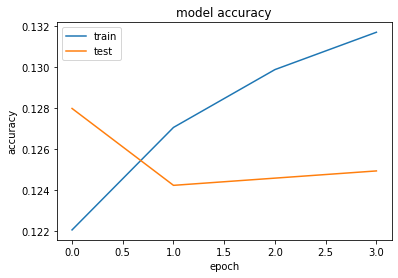

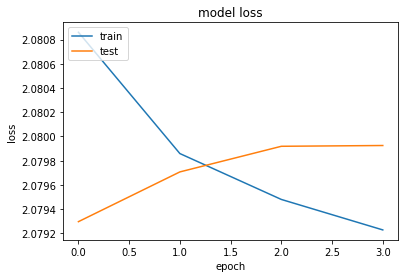

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
predictions = model.predict(test_x)

def get_card_from_encoding(encoding):
    gambels = encoding.argmax(axis=1)
    return np.vectorize(lambda x:possible_result[x])(gambels)

  1/266 [..............................] - ETA: 2:07

  2/266 [..............................] - ETA: 25s 

  3/266 [..............................] - ETA: 25s

  4/266 [..............................] - ETA: 25s

  5/266 [..............................] - ETA: 25s

  6/266 [..............................] - ETA: 25s

  7/266 [..............................] - ETA: 25s

  8/266 [..............................] - ETA: 25s

  9/266 [>.............................] - ETA: 25s

 10/266 [>.............................] - ETA: 25s

 11/266 [>.............................] - ETA: 25s

 12/266 [>.............................] - ETA: 25s

 13/266 [>.............................] - ETA: 25s

 14/266 [>.............................] - ETA: 24s

 15/266 [>.............................] - ETA: 24s

 16/266 [>.............................] - ETA: 24s

 17/266 [>.............................] - ETA: 24s

 18/266 [=>............................] - ETA: 24s

 19/266 [=>............................] - ETA: 24s

 20/266 [=>............................] - ETA: 24s

 21/266 [=>............................] - ETA: 24s

 22/266 [=>............................] - ETA: 24s

 23/266 [=>............................] - ETA: 24s

 24/266 [=>............................] - ETA: 24s

 25/266 [=>............................] - ETA: 23s

 26/266 [=>............................] - ETA: 23s

 27/266 [==>...........................] - ETA: 23s

 28/266 [==>...........................] - ETA: 23s

 29/266 [==>...........................] - ETA: 23s

 30/266 [==>...........................] - ETA: 23s

 31/266 [==>...........................] - ETA: 23s

 32/266 [==>...........................] - ETA: 23s

 33/266 [==>...........................] - ETA: 23s

 34/266 [==>...........................] - ETA: 23s

 35/266 [==>...........................] - ETA: 23s

 36/266 [===>..........................] - ETA: 23s

 37/266 [===>..........................] - ETA: 22s

 38/266 [===>..........................] - ETA: 22s

 39/266 [===>..........................] - ETA: 22s

 40/266 [===>..........................] - ETA: 22s

 41/266 [===>..........................] - ETA: 22s

 42/266 [===>..........................] - ETA: 22s

 43/266 [===>..........................] - ETA: 22s

 44/266 [===>..........................] - ETA: 22s

 45/266 [====>.........................] - ETA: 22s

 46/266 [====>.........................] - ETA: 22s

 47/266 [====>.........................] - ETA: 22s

 48/266 [====>.........................] - ETA: 22s

 49/266 [====>.........................] - ETA: 21s

 50/266 [====>.........................] - ETA: 21s

 51/266 [====>.........................] - ETA: 21s

 52/266 [====>.........................] - ETA: 21s

 53/266 [====>.........................] - ETA: 21s

 54/266 [=====>........................] - ETA: 21s

 55/266 [=====>........................] - ETA: 21s

 56/266 [=====>........................] - ETA: 21s

 57/266 [=====>........................] - ETA: 21s

 58/266 [=====>........................] - ETA: 21s

 59/266 [=====>........................] - ETA: 21s

 60/266 [=====>........................] - ETA: 21s

 61/266 [=====>........................] - ETA: 20s

 62/266 [=====>........................] - ETA: 20s

 63/266 [======>.......................] - ETA: 20s

 64/266 [======>.......................] - ETA: 20s

 65/266 [======>.......................] - ETA: 20s

 66/266 [======>.......................] - ETA: 20s

 67/266 [======>.......................] - ETA: 20s

 68/266 [======>.......................] - ETA: 20s

 69/266 [======>.......................] - ETA: 20s

 70/266 [======>.......................] - ETA: 20s

 71/266 [=======>......................] - ETA: 20s

 72/266 [=======>......................] - ETA: 19s

 73/266 [=======>......................] - ETA: 19s

 74/266 [=======>......................] - ETA: 19s

 75/266 [=======>......................] - ETA: 19s

 76/266 [=======>......................] - ETA: 19s

 77/266 [=======>......................] - ETA: 19s

 78/266 [=======>......................] - ETA: 19s

 79/266 [=======>......................] - ETA: 19s

 80/266 [========>.....................] - ETA: 19s

 81/266 [========>.....................] - ETA: 19s

 82/266 [========>.....................] - ETA: 19s

 83/266 [========>.....................] - ETA: 18s

 84/266 [========>.....................] - ETA: 18s

 85/266 [========>.....................] - ETA: 18s

 86/266 [========>.....................] - ETA: 18s

 87/266 [========>.....................] - ETA: 18s

 88/266 [========>.....................] - ETA: 18s

 89/266 [=========>....................] - ETA: 18s

 90/266 [=========>....................] - ETA: 18s

 91/266 [=========>....................] - ETA: 18s

 92/266 [=========>....................] - ETA: 18s

 93/266 [=========>....................] - ETA: 18s

 94/266 [=========>....................] - ETA: 17s

 95/266 [=========>....................] - ETA: 17s

 96/266 [=========>....................] - ETA: 17s

 97/266 [=========>....................] - ETA: 17s

 98/266 [==========>...................] - ETA: 17s

 99/266 [==========>...................] - ETA: 17s

100/266 [==========>...................] - ETA: 17s

101/266 [==========>...................] - ETA: 17s

102/266 [==========>...................] - ETA: 17s

103/266 [==========>...................] - ETA: 17s

104/266 [==========>...................] - ETA: 17s

105/266 [==========>...................] - ETA: 16s

106/266 [==========>...................] - ETA: 16s

107/266 [===========>..................] - ETA: 16s

108/266 [===========>..................] - ETA: 16s

109/266 [===========>..................] - ETA: 16s

110/266 [===========>..................] - ETA: 16s

111/266 [===========>..................] - ETA: 16s

112/266 [===========>..................] - ETA: 16s

113/266 [===========>..................] - ETA: 16s

114/266 [===========>..................] - ETA: 16s

115/266 [===========>..................] - ETA: 15s

116/266 [============>.................] - ETA: 15s

117/266 [============>.................] - ETA: 15s

118/266 [============>.................] - ETA: 15s

119/266 [============>.................] - ETA: 15s

120/266 [============>.................] - ETA: 15s

121/266 [============>.................] - ETA: 15s

122/266 [============>.................] - ETA: 15s

123/266 [============>.................] - ETA: 15s

124/266 [============>.................] - ETA: 15s

125/266 [=============>................] - ETA: 14s

126/266 [=============>................] - ETA: 14s

127/266 [=============>................] - ETA: 14s

128/266 [=============>................] - ETA: 14s

129/266 [=============>................] - ETA: 14s

130/266 [=============>................] - ETA: 14s

131/266 [=============>................] - ETA: 14s

132/266 [=============>................] - ETA: 14s

133/266 [==============>...............] - ETA: 14s

134/266 [==============>...............] - ETA: 14s

135/266 [==============>...............] - ETA: 13s

136/266 [==============>...............] - ETA: 13s

137/266 [==============>...............] - ETA: 13s

138/266 [==============>...............] - ETA: 13s

139/266 [==============>...............] - ETA: 13s

140/266 [==============>...............] - ETA: 13s

141/266 [==============>...............] - ETA: 13s

142/266 [===============>..............] - ETA: 13s

143/266 [===============>..............] - ETA: 13s

144/266 [===============>..............] - ETA: 13s

145/266 [===============>..............] - ETA: 12s

146/266 [===============>..............] - ETA: 12s

147/266 [===============>..............] - ETA: 12s

148/266 [===============>..............] - ETA: 12s

149/266 [===============>..............] - ETA: 12s

150/266 [===============>..............] - ETA: 12s

151/266 [================>.............] - ETA: 12s

152/266 [================>.............] - ETA: 12s

153/266 [================>.............] - ETA: 12s

154/266 [================>.............] - ETA: 12s

155/266 [================>.............] - ETA: 11s

156/266 [================>.............] - ETA: 11s

157/266 [================>.............] - ETA: 11s

158/266 [================>.............] - ETA: 11s

159/266 [================>.............] - ETA: 11s

160/266 [=================>............] - ETA: 11s

161/266 [=================>............] - ETA: 11s

162/266 [=================>............] - ETA: 11s

163/266 [=================>............] - ETA: 11s

164/266 [=================>............] - ETA: 10s

165/266 [=================>............] - ETA: 10s

166/266 [=================>............] - ETA: 10s

167/266 [=================>............] - ETA: 10s

168/266 [=================>............] - ETA: 10s

169/266 [==================>...........] - ETA: 10s

170/266 [==================>...........] - ETA: 10s

171/266 [==================>...........] - ETA: 10s

172/266 [==================>...........] - ETA: 10s

173/266 [==================>...........] - ETA: 9s 

174/266 [==================>...........] - ETA: 9s

175/266 [==================>...........] - ETA: 9s

176/266 [==================>...........] - ETA: 9s

177/266 [==================>...........] - ETA: 9s

178/266 [===================>..........] - ETA: 9s

179/266 [===================>..........] - ETA: 9s

180/266 [===================>..........] - ETA: 9s

181/266 [===================>..........] - ETA: 9s

182/266 [===================>..........] - ETA: 9s

183/266 [===================>..........] - ETA: 8s

184/266 [===================>..........] - ETA: 8s

185/266 [===================>..........] - ETA: 8s

186/266 [===================>..........] - ETA: 8s

187/266 [====================>.........] - ETA: 8s

188/266 [====================>.........] - ETA: 8s

189/266 [====================>.........] - ETA: 8s

190/266 [====================>.........] - ETA: 8s

191/266 [====================>.........] - ETA: 8s

192/266 [====================>.........] - ETA: 7s

193/266 [====================>.........] - ETA: 7s

194/266 [====================>.........] - ETA: 7s

195/266 [====================>.........] - ETA: 7s

196/266 [=====================>........] - ETA: 7s

197/266 [=====================>........] - ETA: 7s

198/266 [=====================>........] - ETA: 7s

199/266 [=====================>........] - ETA: 7s

200/266 [=====================>........] - ETA: 7s

201/266 [=====================>........] - ETA: 7s

202/266 [=====================>........] - ETA: 6s

203/266 [=====================>........] - ETA: 6s

204/266 [======================>.......] - ETA: 6s

205/266 [======================>.......] - ETA: 6s

206/266 [======================>.......] - ETA: 6s

207/266 [======================>.......] - ETA: 6s

208/266 [======================>.......] - ETA: 6s

209/266 [======================>.......] - ETA: 6s

210/266 [======================>.......] - ETA: 6s

211/266 [======================>.......] - ETA: 5s

212/266 [======================>.......] - ETA: 5s

213/266 [=======================>......] - ETA: 5s

214/266 [=======================>......] - ETA: 5s

215/266 [=======================>......] - ETA: 5s

216/266 [=======================>......] - ETA: 5s

217/266 [=======================>......] - ETA: 5s

218/266 [=======================>......] - ETA: 5s

219/266 [=======================>......] - ETA: 5s

220/266 [=======================>......] - ETA: 4s

221/266 [=======================>......] - ETA: 4s

222/266 [========================>.....] - ETA: 4s

223/266 [========================>.....] - ETA: 4s

224/266 [========================>.....] - ETA: 4s

225/266 [========================>.....] - ETA: 4s

226/266 [========================>.....] - ETA: 4s

227/266 [========================>.....] - ETA: 4s

228/266 [========================>.....] - ETA: 4s

229/266 [========================>.....] - ETA: 4s

230/266 [========================>.....] - ETA: 3s

231/266 [=========================>....] - ETA: 3s

232/266 [=========================>....] - ETA: 3s

233/266 [=========================>....] - ETA: 3s

234/266 [=========================>....] - ETA: 3s

235/266 [=========================>....] - ETA: 3s

236/266 [=========================>....] - ETA: 3s

237/266 [=========================>....] - ETA: 3s

238/266 [=========================>....] - ETA: 3s

239/266 [=========================>....] - ETA: 2s

240/266 [==========================>...] - ETA: 2s

241/266 [==========================>...] - ETA: 2s

242/266 [==========================>...] - ETA: 2s

243/266 [==========================>...] - ETA: 2s

244/266 [==========================>...] - ETA: 2s

245/266 [==========================>...] - ETA: 2s

246/266 [==========================>...] - ETA: 2s

247/266 [==========================>...] - ETA: 2s

248/266 [==========================>...] - ETA: 1s

249/266 [===========================>..] - ETA: 1s

250/266 [===========================>..] - ETA: 1s

251/266 [===========================>..] - ETA: 1s

252/266 [===========================>..] - ETA: 1s

253/266 [===========================>..] - ETA: 1s

254/266 [===========================>..] - ETA: 1s

255/266 [===========================>..] - ETA: 1s

256/266 [===========================>..] - ETA: 1s

257/266 [===========================>..] - ETA: 0s

258/266 [============================>.] - ETA: 0s

259/266 [============================>.] - ETA: 0s

260/266 [============================>.] - ETA: 0s

261/266 [============================>.] - ETA: 0s

262/266 [============================>.] - ETA: 0s

263/266 [============================>.] - ETA: 0s

264/266 [============================>.] - ETA: 0s

265/266 [============================>.] - ETA: 0s

266/266 [==============================] - ETA: 0s

266/266 [==============================] - 29s 109ms/step


In [23]:
predictions_cards = get_card_from_encoding(predictions)
true_cards = get_card_from_encoding(test_y)

compute_statistics(predictions_cards,true_cards)

{'name': UUID('b335794f-4635-4794-84bd-c90fa4c3de79'),
 'invested': '£850,900.00',
 'single_bet_amount': '£100.00',
 'total_invested': '£850,900.00',
 'total_won': 1063,
 'precentage_won': 12.49265483605594,
 'expected_won': 12.5,
 'eraned': '£531,500.00',
 'revenue': '-£319,400.00'}